In [3]:
!pip install catboost
!pip install lightgbm
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


0. Import des librairies et dataset

In [1]:
import pandas as pd

In [2]:
import sklearn
import imblearn
from pandas import read_csv # For dataframes
from pandas import DataFrame # For dataframes
from numpy import ravel # For matrices
import matplotlib.pyplot as plt # For plotting data
import seaborn as sns # For plotting data
from sklearn.model_selection import train_test_split # For train/test splits
#from sklearn.neighbors import KNeighborsClassifier # The k-nearest neighbor classifier
from sklearn.feature_selection import VarianceThreshold # Feature selector
from sklearn.pipeline import Pipeline # For setting up pipeline
# Various pre-processing steps
from sklearn.preprocessing import Normalizer, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.preprocessing import PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV # For optimization
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from imblearn.over_sampling import RandomOverSampler

In [3]:
warnings.filterwarnings('ignore')

In [4]:
df_diabetes = pd.read_csv('df_diabetes.csv', low_memory=False)

In [26]:
df_diabetes.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [25]:
df_diabetes.drop(columns="Unnamed: 0", inplace=True)

1. Hors pipeline

1.1 Sampling

In [27]:
# Définition des x et du y
X=df_diabetes.drop('Outcome',axis=1)
y=df_diabetes['Outcome']

<Axes: ylabel='count'>

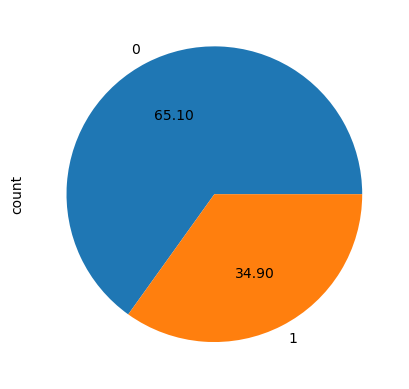

In [28]:
# Affichage actuel des classes (malades / sains)
y.value_counts().plot.pie(autopct='%.2f')

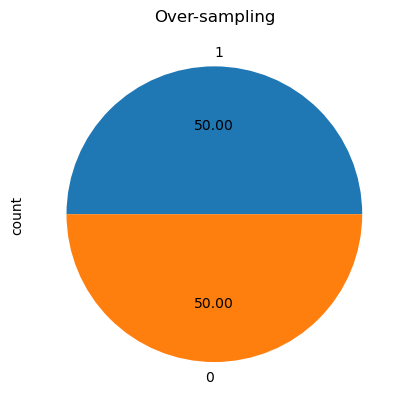

In [29]:
# Rééquilibrage et visualisation des classes après application du over-sampler
#ros = RandomOverSampler(sampling_strategy=1) # Float
ros = RandomOverSampler(sampling_strategy="not majority") # String
X_res, y_res = ros.fit_resample(X, y)
ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

1.2 Encoding

In [12]:
# uniquement nécessaire pour données non numériques dans le dataset => CKD

1.3 train test split

In [13]:
# train test split appliqué sur le data set oversamplé
# pas nécessaire avant le choix des modèles

2. Pipeline

In [30]:
scaler_list= [Normalizer(), StandardScaler(), MinMaxScaler(), MaxAbsScaler(), RobustScaler(),PowerTransformer()]

In [15]:
scaler_list1= [Normalizer(), StandardScaler(), MinMaxScaler()]

In [16]:
scaler_list2= [ MaxAbsScaler(), RobustScaler(),PowerTransformer()]

In [31]:
classifier_list= [ RandomForestClassifier(), LogisticRegression(), SVC(),
                  MLPClassifier(), XGBClassifier(), LGBMClassifier(),
                  CatBoostClassifier(), GaussianNB() ]

In [32]:
results = []
for scaler in scaler_list:
    for classifier in classifier_list:
        pipe = Pipeline([
        ('scaler', scaler),
        ('classifier', classifier)
        ])
        cross= cross_val_score(pipe, X_res, y_res, cv= 5, scoring= 'accuracy')
        y_pred = cross_val_predict(pipe, X_res, y_res, cv= 5)
        Accuracy= accuracy_score(y_res, y_pred),
        Precision= precision_score(y_res, y_pred),
        Recall= recall_score(y_res, y_pred),
        F1_Score= f1_score(y_res, y_pred),
        ROC_AUC= roc_auc_score(y_res, y_pred)
        results.append((classifier.__class__.__name__, scaler.__class__.__name__, 
                        Accuracy, Precision, Recall, F1_Score, ROC_AUC))

[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2004
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2008
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

73:	learn: 0.5896251	total: 86.5ms	remaining: 1.08s
74:	learn: 0.5883556	total: 87.8ms	remaining: 1.08s
75:	learn: 0.5875294	total: 88.9ms	remaining: 1.08s
76:	learn: 0.5866664	total: 90.1ms	remaining: 1.08s
77:	learn: 0.5855330	total: 91.2ms	remaining: 1.08s
78:	learn: 0.5846003	total: 92.3ms	remaining: 1.07s
79:	learn: 0.5836271	total: 93.4ms	remaining: 1.07s
80:	learn: 0.5823256	total: 94.5ms	remaining: 1.07s
81:	learn: 0.5816216	total: 95.6ms	remaining: 1.07s
82:	learn: 0.5809261	total: 96.9ms	remaining: 1.07s
83:	learn: 0.5799963	total: 97.9ms	remaining: 1.07s
84:	learn: 0.5787138	total: 99ms	remaining: 1.07s
85:	learn: 0.5781527	total: 100ms	remaining: 1.06s
86:	learn: 0.5771935	total: 101ms	remaining: 1.06s
87:	learn: 0.5761767	total: 102ms	remaining: 1.06s
88:	learn: 0.5752351	total: 103ms	remaining: 1.06s
89:	learn: 0.5742548	total: 105ms	remaining: 1.06s
90:	learn: 0.5734840	total: 106ms	remaining: 1.05s
91:	learn: 0.5725309	total: 107ms	remaining: 1.05s
92:	learn: 0.5714670	

256:	learn: 0.4630450	total: 283ms	remaining: 817ms
257:	learn: 0.4626389	total: 284ms	remaining: 816ms
258:	learn: 0.4622161	total: 285ms	remaining: 815ms
259:	learn: 0.4619250	total: 286ms	remaining: 814ms
260:	learn: 0.4615809	total: 287ms	remaining: 813ms
261:	learn: 0.4612475	total: 288ms	remaining: 812ms
262:	learn: 0.4606794	total: 289ms	remaining: 811ms
263:	learn: 0.4601922	total: 290ms	remaining: 809ms
264:	learn: 0.4596851	total: 292ms	remaining: 809ms
265:	learn: 0.4592472	total: 293ms	remaining: 808ms
266:	learn: 0.4588390	total: 294ms	remaining: 807ms
267:	learn: 0.4584292	total: 295ms	remaining: 806ms
268:	learn: 0.4580494	total: 296ms	remaining: 804ms
269:	learn: 0.4575630	total: 297ms	remaining: 804ms
270:	learn: 0.4570583	total: 298ms	remaining: 803ms
271:	learn: 0.4564934	total: 300ms	remaining: 802ms
272:	learn: 0.4558220	total: 301ms	remaining: 801ms
273:	learn: 0.4554113	total: 302ms	remaining: 800ms
274:	learn: 0.4547458	total: 303ms	remaining: 799ms
275:	learn: 

440:	learn: 0.3861014	total: 480ms	remaining: 608ms
441:	learn: 0.3857908	total: 481ms	remaining: 608ms
442:	learn: 0.3853861	total: 482ms	remaining: 607ms
443:	learn: 0.3851223	total: 484ms	remaining: 606ms
444:	learn: 0.3846362	total: 485ms	remaining: 604ms
445:	learn: 0.3839995	total: 486ms	remaining: 603ms
446:	learn: 0.3836679	total: 487ms	remaining: 602ms
447:	learn: 0.3834932	total: 488ms	remaining: 601ms
448:	learn: 0.3831662	total: 489ms	remaining: 600ms
449:	learn: 0.3828985	total: 490ms	remaining: 599ms
450:	learn: 0.3825578	total: 491ms	remaining: 598ms
451:	learn: 0.3822990	total: 493ms	remaining: 597ms
452:	learn: 0.3820510	total: 494ms	remaining: 596ms
453:	learn: 0.3817887	total: 495ms	remaining: 595ms
454:	learn: 0.3816398	total: 496ms	remaining: 594ms
455:	learn: 0.3812827	total: 497ms	remaining: 593ms
456:	learn: 0.3810220	total: 498ms	remaining: 592ms
457:	learn: 0.3807387	total: 499ms	remaining: 591ms
458:	learn: 0.3803639	total: 501ms	remaining: 590ms
459:	learn: 

624:	learn: 0.3296304	total: 676ms	remaining: 406ms
625:	learn: 0.3294061	total: 678ms	remaining: 405ms
626:	learn: 0.3288234	total: 679ms	remaining: 404ms
627:	learn: 0.3284435	total: 680ms	remaining: 403ms
628:	learn: 0.3282673	total: 681ms	remaining: 402ms
629:	learn: 0.3277464	total: 682ms	remaining: 401ms
630:	learn: 0.3273751	total: 683ms	remaining: 400ms
631:	learn: 0.3270551	total: 685ms	remaining: 399ms
632:	learn: 0.3268200	total: 686ms	remaining: 398ms
633:	learn: 0.3265895	total: 687ms	remaining: 396ms
634:	learn: 0.3263081	total: 688ms	remaining: 395ms
635:	learn: 0.3257880	total: 689ms	remaining: 394ms
636:	learn: 0.3254876	total: 690ms	remaining: 393ms
637:	learn: 0.3252855	total: 691ms	remaining: 392ms
638:	learn: 0.3251075	total: 692ms	remaining: 391ms
639:	learn: 0.3247815	total: 693ms	remaining: 390ms
640:	learn: 0.3245288	total: 694ms	remaining: 389ms
641:	learn: 0.3243784	total: 695ms	remaining: 388ms
642:	learn: 0.3241299	total: 696ms	remaining: 387ms
643:	learn: 

806:	learn: 0.2804809	total: 870ms	remaining: 208ms
807:	learn: 0.2801725	total: 871ms	remaining: 207ms
808:	learn: 0.2798694	total: 872ms	remaining: 206ms
809:	learn: 0.2797386	total: 874ms	remaining: 205ms
810:	learn: 0.2796437	total: 875ms	remaining: 204ms
811:	learn: 0.2793201	total: 876ms	remaining: 203ms
812:	learn: 0.2791092	total: 877ms	remaining: 202ms
813:	learn: 0.2788717	total: 878ms	remaining: 201ms
814:	learn: 0.2786318	total: 879ms	remaining: 200ms
815:	learn: 0.2783505	total: 880ms	remaining: 199ms
816:	learn: 0.2781158	total: 882ms	remaining: 197ms
817:	learn: 0.2777270	total: 883ms	remaining: 196ms
818:	learn: 0.2774521	total: 884ms	remaining: 195ms
819:	learn: 0.2772832	total: 885ms	remaining: 194ms
820:	learn: 0.2770933	total: 886ms	remaining: 193ms
821:	learn: 0.2769485	total: 887ms	remaining: 192ms
822:	learn: 0.2768023	total: 888ms	remaining: 191ms
823:	learn: 0.2765234	total: 889ms	remaining: 190ms
824:	learn: 0.2761941	total: 890ms	remaining: 189ms
825:	learn: 

990:	learn: 0.2398608	total: 1.07s	remaining: 9.69ms
991:	learn: 0.2396033	total: 1.07s	remaining: 8.61ms
992:	learn: 0.2391541	total: 1.07s	remaining: 7.54ms
993:	learn: 0.2389295	total: 1.07s	remaining: 6.46ms
994:	learn: 0.2386287	total: 1.07s	remaining: 5.38ms
995:	learn: 0.2384411	total: 1.07s	remaining: 4.31ms
996:	learn: 0.2382258	total: 1.07s	remaining: 3.23ms
997:	learn: 0.2377349	total: 1.07s	remaining: 2.15ms
998:	learn: 0.2376981	total: 1.07s	remaining: 1.08ms
999:	learn: 0.2376035	total: 1.08s	remaining: 0us
Learning rate set to 0.009366
0:	learn: 0.6909550	total: 1.42ms	remaining: 1.42s
1:	learn: 0.6894785	total: 2.46ms	remaining: 1.23s
2:	learn: 0.6878680	total: 3.54ms	remaining: 1.18s
3:	learn: 0.6854150	total: 4.59ms	remaining: 1.14s
4:	learn: 0.6832008	total: 5.61ms	remaining: 1.12s
5:	learn: 0.6811444	total: 6.63ms	remaining: 1.1s
6:	learn: 0.6794115	total: 7.64ms	remaining: 1.08s
7:	learn: 0.6773104	total: 8.67ms	remaining: 1.07s
8:	learn: 0.6757777	total: 9.69ms	re

330:	learn: 0.4205545	total: 351ms	remaining: 710ms
331:	learn: 0.4202259	total: 353ms	remaining: 709ms
332:	learn: 0.4196986	total: 354ms	remaining: 708ms
333:	learn: 0.4192112	total: 355ms	remaining: 708ms
334:	learn: 0.4188595	total: 356ms	remaining: 707ms
335:	learn: 0.4185507	total: 357ms	remaining: 706ms
336:	learn: 0.4180369	total: 358ms	remaining: 705ms
337:	learn: 0.4173484	total: 360ms	remaining: 704ms
338:	learn: 0.4167308	total: 361ms	remaining: 703ms
339:	learn: 0.4164841	total: 362ms	remaining: 702ms
340:	learn: 0.4161513	total: 363ms	remaining: 702ms
341:	learn: 0.4158658	total: 366ms	remaining: 705ms
342:	learn: 0.4155481	total: 368ms	remaining: 705ms
343:	learn: 0.4150034	total: 369ms	remaining: 704ms
344:	learn: 0.4147645	total: 370ms	remaining: 703ms
345:	learn: 0.4143100	total: 371ms	remaining: 702ms
346:	learn: 0.4135399	total: 373ms	remaining: 701ms
347:	learn: 0.4131168	total: 374ms	remaining: 700ms
348:	learn: 0.4123527	total: 375ms	remaining: 699ms
349:	learn: 

512:	learn: 0.3507470	total: 548ms	remaining: 520ms
513:	learn: 0.3503063	total: 549ms	remaining: 519ms
514:	learn: 0.3500294	total: 550ms	remaining: 518ms
515:	learn: 0.3497852	total: 551ms	remaining: 517ms
516:	learn: 0.3496294	total: 552ms	remaining: 516ms
517:	learn: 0.3493145	total: 554ms	remaining: 515ms
518:	learn: 0.3491014	total: 555ms	remaining: 514ms
519:	learn: 0.3488060	total: 556ms	remaining: 513ms
520:	learn: 0.3485384	total: 557ms	remaining: 512ms
521:	learn: 0.3482051	total: 558ms	remaining: 511ms
522:	learn: 0.3477330	total: 559ms	remaining: 510ms
523:	learn: 0.3473593	total: 560ms	remaining: 509ms
524:	learn: 0.3471026	total: 561ms	remaining: 508ms
525:	learn: 0.3468946	total: 562ms	remaining: 507ms
526:	learn: 0.3463409	total: 563ms	remaining: 506ms
527:	learn: 0.3460894	total: 565ms	remaining: 505ms
528:	learn: 0.3458301	total: 566ms	remaining: 504ms
529:	learn: 0.3454210	total: 567ms	remaining: 503ms
530:	learn: 0.3450991	total: 568ms	remaining: 501ms
531:	learn: 

695:	learn: 0.2957045	total: 744ms	remaining: 325ms
696:	learn: 0.2954380	total: 745ms	remaining: 324ms
697:	learn: 0.2953073	total: 746ms	remaining: 323ms
698:	learn: 0.2950424	total: 747ms	remaining: 322ms
699:	learn: 0.2947620	total: 748ms	remaining: 321ms
700:	learn: 0.2945321	total: 750ms	remaining: 320ms
701:	learn: 0.2942624	total: 751ms	remaining: 319ms
702:	learn: 0.2940667	total: 752ms	remaining: 318ms
703:	learn: 0.2938331	total: 753ms	remaining: 317ms
704:	learn: 0.2936350	total: 754ms	remaining: 316ms
705:	learn: 0.2933679	total: 755ms	remaining: 315ms
706:	learn: 0.2929597	total: 756ms	remaining: 313ms
707:	learn: 0.2927129	total: 757ms	remaining: 312ms
708:	learn: 0.2924445	total: 758ms	remaining: 311ms
709:	learn: 0.2922763	total: 760ms	remaining: 310ms
710:	learn: 0.2919326	total: 761ms	remaining: 309ms
711:	learn: 0.2915013	total: 762ms	remaining: 308ms
712:	learn: 0.2912001	total: 763ms	remaining: 307ms
713:	learn: 0.2909863	total: 764ms	remaining: 306ms
714:	learn: 

879:	learn: 0.2499886	total: 940ms	remaining: 128ms
880:	learn: 0.2497291	total: 941ms	remaining: 127ms
881:	learn: 0.2494843	total: 943ms	remaining: 126ms
882:	learn: 0.2491356	total: 944ms	remaining: 125ms
883:	learn: 0.2489299	total: 945ms	remaining: 124ms
884:	learn: 0.2488065	total: 946ms	remaining: 123ms
885:	learn: 0.2484543	total: 947ms	remaining: 122ms
886:	learn: 0.2483546	total: 949ms	remaining: 121ms
887:	learn: 0.2481522	total: 950ms	remaining: 120ms
888:	learn: 0.2478573	total: 951ms	remaining: 119ms
889:	learn: 0.2474413	total: 952ms	remaining: 118ms
890:	learn: 0.2473264	total: 953ms	remaining: 117ms
891:	learn: 0.2469198	total: 954ms	remaining: 116ms
892:	learn: 0.2466986	total: 955ms	remaining: 114ms
893:	learn: 0.2465431	total: 956ms	remaining: 113ms
894:	learn: 0.2462155	total: 957ms	remaining: 112ms
895:	learn: 0.2459722	total: 959ms	remaining: 111ms
896:	learn: 0.2457147	total: 960ms	remaining: 110ms
897:	learn: 0.2455066	total: 961ms	remaining: 109ms
898:	learn: 

219:	learn: 0.5013967	total: 234ms	remaining: 829ms
220:	learn: 0.5008901	total: 235ms	remaining: 828ms
221:	learn: 0.5004696	total: 236ms	remaining: 827ms
222:	learn: 0.4997729	total: 237ms	remaining: 826ms
223:	learn: 0.4993176	total: 238ms	remaining: 824ms
224:	learn: 0.4986818	total: 239ms	remaining: 823ms
225:	learn: 0.4982666	total: 240ms	remaining: 823ms
226:	learn: 0.4978568	total: 241ms	remaining: 822ms
227:	learn: 0.4974908	total: 243ms	remaining: 821ms
228:	learn: 0.4969447	total: 244ms	remaining: 821ms
229:	learn: 0.4964467	total: 245ms	remaining: 820ms
230:	learn: 0.4962049	total: 246ms	remaining: 819ms
231:	learn: 0.4954068	total: 247ms	remaining: 817ms
232:	learn: 0.4947341	total: 248ms	remaining: 816ms
233:	learn: 0.4940641	total: 249ms	remaining: 815ms
234:	learn: 0.4934413	total: 250ms	remaining: 814ms
235:	learn: 0.4930214	total: 251ms	remaining: 813ms
236:	learn: 0.4926367	total: 252ms	remaining: 812ms
237:	learn: 0.4921198	total: 253ms	remaining: 811ms
238:	learn: 

402:	learn: 0.4197624	total: 430ms	remaining: 637ms
403:	learn: 0.4194253	total: 431ms	remaining: 636ms
404:	learn: 0.4189010	total: 432ms	remaining: 635ms
405:	learn: 0.4184071	total: 434ms	remaining: 634ms
406:	learn: 0.4180805	total: 435ms	remaining: 633ms
407:	learn: 0.4178519	total: 436ms	remaining: 633ms
408:	learn: 0.4176919	total: 437ms	remaining: 632ms
409:	learn: 0.4173203	total: 438ms	remaining: 631ms
410:	learn: 0.4168275	total: 439ms	remaining: 630ms
411:	learn: 0.4162633	total: 441ms	remaining: 629ms
412:	learn: 0.4156023	total: 442ms	remaining: 628ms
413:	learn: 0.4153373	total: 443ms	remaining: 627ms
414:	learn: 0.4147219	total: 444ms	remaining: 626ms
415:	learn: 0.4142107	total: 445ms	remaining: 625ms
416:	learn: 0.4138543	total: 446ms	remaining: 624ms
417:	learn: 0.4135269	total: 447ms	remaining: 622ms
418:	learn: 0.4132018	total: 448ms	remaining: 621ms
419:	learn: 0.4128874	total: 449ms	remaining: 620ms
420:	learn: 0.4123529	total: 450ms	remaining: 619ms
421:	learn: 

585:	learn: 0.3601191	total: 626ms	remaining: 442ms
586:	learn: 0.3598829	total: 627ms	remaining: 441ms
587:	learn: 0.3596821	total: 628ms	remaining: 440ms
588:	learn: 0.3594910	total: 630ms	remaining: 439ms
589:	learn: 0.3590836	total: 631ms	remaining: 438ms
590:	learn: 0.3589095	total: 632ms	remaining: 437ms
591:	learn: 0.3585629	total: 633ms	remaining: 436ms
592:	learn: 0.3582029	total: 634ms	remaining: 435ms
593:	learn: 0.3579642	total: 635ms	remaining: 434ms
594:	learn: 0.3577422	total: 637ms	remaining: 433ms
595:	learn: 0.3574965	total: 638ms	remaining: 432ms
596:	learn: 0.3572994	total: 639ms	remaining: 431ms
597:	learn: 0.3569788	total: 640ms	remaining: 430ms
598:	learn: 0.3566284	total: 641ms	remaining: 429ms
599:	learn: 0.3564225	total: 642ms	remaining: 428ms
600:	learn: 0.3561416	total: 643ms	remaining: 427ms
601:	learn: 0.3559616	total: 644ms	remaining: 426ms
602:	learn: 0.3557543	total: 646ms	remaining: 425ms
603:	learn: 0.3554158	total: 647ms	remaining: 424ms
604:	learn: 

770:	learn: 0.3085852	total: 823ms	remaining: 244ms
771:	learn: 0.3082989	total: 824ms	remaining: 243ms
772:	learn: 0.3080412	total: 826ms	remaining: 242ms
773:	learn: 0.3076349	total: 827ms	remaining: 241ms
774:	learn: 0.3075176	total: 828ms	remaining: 240ms
775:	learn: 0.3071909	total: 829ms	remaining: 239ms
776:	learn: 0.3069862	total: 831ms	remaining: 238ms
777:	learn: 0.3067117	total: 832ms	remaining: 237ms
778:	learn: 0.3064281	total: 833ms	remaining: 236ms
779:	learn: 0.3061696	total: 834ms	remaining: 235ms
780:	learn: 0.3059151	total: 835ms	remaining: 234ms
781:	learn: 0.3057664	total: 836ms	remaining: 233ms
782:	learn: 0.3054313	total: 837ms	remaining: 232ms
783:	learn: 0.3050859	total: 838ms	remaining: 231ms
784:	learn: 0.3046190	total: 839ms	remaining: 230ms
785:	learn: 0.3044519	total: 840ms	remaining: 229ms
786:	learn: 0.3041114	total: 841ms	remaining: 228ms
787:	learn: 0.3037687	total: 842ms	remaining: 227ms
788:	learn: 0.3035985	total: 843ms	remaining: 226ms
789:	learn: 

954:	learn: 0.2612246	total: 1.02s	remaining: 48ms
955:	learn: 0.2609119	total: 1.02s	remaining: 47ms
956:	learn: 0.2605868	total: 1.02s	remaining: 45.9ms
957:	learn: 0.2603899	total: 1.02s	remaining: 44.8ms
958:	learn: 0.2601830	total: 1.02s	remaining: 43.8ms
959:	learn: 0.2599910	total: 1.02s	remaining: 42.7ms
960:	learn: 0.2596479	total: 1.03s	remaining: 41.7ms
961:	learn: 0.2595501	total: 1.03s	remaining: 40.6ms
962:	learn: 0.2593027	total: 1.03s	remaining: 39.5ms
963:	learn: 0.2590149	total: 1.03s	remaining: 38.5ms
964:	learn: 0.2587164	total: 1.03s	remaining: 37.4ms
965:	learn: 0.2584590	total: 1.03s	remaining: 36.3ms
966:	learn: 0.2582081	total: 1.03s	remaining: 35.3ms
967:	learn: 0.2580614	total: 1.03s	remaining: 34.2ms
968:	learn: 0.2577324	total: 1.03s	remaining: 33.1ms
969:	learn: 0.2574800	total: 1.04s	remaining: 32ms
970:	learn: 0.2572467	total: 1.04s	remaining: 31ms
971:	learn: 0.2569763	total: 1.04s	remaining: 29.9ms
972:	learn: 0.2566879	total: 1.04s	remaining: 28.8ms
9

294:	learn: 0.4698449	total: 312ms	remaining: 745ms
295:	learn: 0.4694252	total: 313ms	remaining: 744ms
296:	learn: 0.4689699	total: 314ms	remaining: 743ms
297:	learn: 0.4685962	total: 315ms	remaining: 742ms
298:	learn: 0.4682481	total: 316ms	remaining: 741ms
299:	learn: 0.4679312	total: 317ms	remaining: 740ms
300:	learn: 0.4675455	total: 318ms	remaining: 739ms
301:	learn: 0.4670523	total: 319ms	remaining: 738ms
302:	learn: 0.4664960	total: 320ms	remaining: 737ms
303:	learn: 0.4661101	total: 321ms	remaining: 736ms
304:	learn: 0.4655246	total: 323ms	remaining: 735ms
305:	learn: 0.4652374	total: 324ms	remaining: 734ms
306:	learn: 0.4648587	total: 325ms	remaining: 733ms
307:	learn: 0.4645396	total: 326ms	remaining: 732ms
308:	learn: 0.4642214	total: 327ms	remaining: 731ms
309:	learn: 0.4640186	total: 328ms	remaining: 730ms
310:	learn: 0.4637471	total: 329ms	remaining: 729ms
311:	learn: 0.4632424	total: 330ms	remaining: 728ms
312:	learn: 0.4626699	total: 332ms	remaining: 728ms
313:	learn: 

478:	learn: 0.4025040	total: 509ms	remaining: 554ms
479:	learn: 0.4020348	total: 511ms	remaining: 553ms
480:	learn: 0.4017862	total: 512ms	remaining: 552ms
481:	learn: 0.4015165	total: 513ms	remaining: 551ms
482:	learn: 0.4012250	total: 514ms	remaining: 551ms
483:	learn: 0.4009851	total: 516ms	remaining: 550ms
484:	learn: 0.4007811	total: 517ms	remaining: 549ms
485:	learn: 0.4005661	total: 518ms	remaining: 548ms
486:	learn: 0.4002140	total: 519ms	remaining: 547ms
487:	learn: 0.3998970	total: 520ms	remaining: 546ms
488:	learn: 0.3996442	total: 521ms	remaining: 545ms
489:	learn: 0.3993138	total: 522ms	remaining: 544ms
490:	learn: 0.3989590	total: 524ms	remaining: 543ms
491:	learn: 0.3986573	total: 525ms	remaining: 542ms
492:	learn: 0.3984193	total: 526ms	remaining: 541ms
493:	learn: 0.3981766	total: 527ms	remaining: 540ms
494:	learn: 0.3979277	total: 528ms	remaining: 539ms
495:	learn: 0.3976231	total: 529ms	remaining: 537ms
496:	learn: 0.3974014	total: 530ms	remaining: 536ms
497:	learn: 

662:	learn: 0.3505391	total: 706ms	remaining: 359ms
663:	learn: 0.3503959	total: 707ms	remaining: 358ms
664:	learn: 0.3501591	total: 708ms	remaining: 357ms
665:	learn: 0.3498366	total: 709ms	remaining: 356ms
666:	learn: 0.3496453	total: 710ms	remaining: 355ms
667:	learn: 0.3494110	total: 711ms	remaining: 354ms
668:	learn: 0.3492072	total: 713ms	remaining: 353ms
669:	learn: 0.3488586	total: 714ms	remaining: 352ms
670:	learn: 0.3485028	total: 715ms	remaining: 350ms
671:	learn: 0.3480882	total: 716ms	remaining: 349ms
672:	learn: 0.3478340	total: 717ms	remaining: 348ms
673:	learn: 0.3475475	total: 718ms	remaining: 347ms
674:	learn: 0.3470648	total: 719ms	remaining: 346ms
675:	learn: 0.3467892	total: 720ms	remaining: 345ms
676:	learn: 0.3464250	total: 721ms	remaining: 344ms
677:	learn: 0.3461132	total: 722ms	remaining: 343ms
678:	learn: 0.3458023	total: 724ms	remaining: 342ms
679:	learn: 0.3454549	total: 725ms	remaining: 341ms
680:	learn: 0.3452510	total: 726ms	remaining: 340ms
681:	learn: 

846:	learn: 0.3014285	total: 901ms	remaining: 163ms
847:	learn: 0.3010786	total: 903ms	remaining: 162ms
848:	learn: 0.3006888	total: 904ms	remaining: 161ms
849:	learn: 0.3003016	total: 905ms	remaining: 160ms
850:	learn: 0.2999744	total: 906ms	remaining: 159ms
851:	learn: 0.2996931	total: 907ms	remaining: 158ms
852:	learn: 0.2993810	total: 908ms	remaining: 157ms
853:	learn: 0.2991100	total: 910ms	remaining: 156ms
854:	learn: 0.2988557	total: 911ms	remaining: 154ms
855:	learn: 0.2986658	total: 912ms	remaining: 153ms
856:	learn: 0.2984302	total: 913ms	remaining: 152ms
857:	learn: 0.2980944	total: 914ms	remaining: 151ms
858:	learn: 0.2977263	total: 915ms	remaining: 150ms
859:	learn: 0.2973236	total: 916ms	remaining: 149ms
860:	learn: 0.2970918	total: 917ms	remaining: 148ms
861:	learn: 0.2968458	total: 918ms	remaining: 147ms
862:	learn: 0.2965642	total: 919ms	remaining: 146ms
863:	learn: 0.2964678	total: 920ms	remaining: 145ms
864:	learn: 0.2962046	total: 922ms	remaining: 144ms
865:	learn: 

184:	learn: 0.5232891	total: 195ms	remaining: 860ms
185:	learn: 0.5226913	total: 197ms	remaining: 860ms
186:	learn: 0.5222398	total: 198ms	remaining: 860ms
187:	learn: 0.5218173	total: 199ms	remaining: 860ms
188:	learn: 0.5209332	total: 200ms	remaining: 859ms
189:	learn: 0.5205065	total: 201ms	remaining: 859ms
190:	learn: 0.5198494	total: 203ms	remaining: 858ms
191:	learn: 0.5194405	total: 204ms	remaining: 858ms
192:	learn: 0.5188667	total: 205ms	remaining: 857ms
193:	learn: 0.5182085	total: 206ms	remaining: 857ms
194:	learn: 0.5175422	total: 207ms	remaining: 856ms
195:	learn: 0.5170173	total: 208ms	remaining: 855ms
196:	learn: 0.5162962	total: 210ms	remaining: 854ms
197:	learn: 0.5156609	total: 211ms	remaining: 854ms
198:	learn: 0.5151546	total: 212ms	remaining: 853ms
199:	learn: 0.5139709	total: 213ms	remaining: 853ms
200:	learn: 0.5132564	total: 214ms	remaining: 852ms
201:	learn: 0.5127437	total: 216ms	remaining: 851ms
202:	learn: 0.5122674	total: 217ms	remaining: 850ms
203:	learn: 

367:	learn: 0.4388615	total: 391ms	remaining: 672ms
368:	learn: 0.4385741	total: 393ms	remaining: 671ms
369:	learn: 0.4383594	total: 394ms	remaining: 670ms
370:	learn: 0.4379737	total: 395ms	remaining: 669ms
371:	learn: 0.4376565	total: 396ms	remaining: 668ms
372:	learn: 0.4374390	total: 397ms	remaining: 668ms
373:	learn: 0.4371096	total: 398ms	remaining: 667ms
374:	learn: 0.4368420	total: 399ms	remaining: 666ms
375:	learn: 0.4365425	total: 401ms	remaining: 665ms
376:	learn: 0.4363459	total: 402ms	remaining: 664ms
377:	learn: 0.4359649	total: 403ms	remaining: 663ms
378:	learn: 0.4356194	total: 404ms	remaining: 662ms
379:	learn: 0.4351846	total: 405ms	remaining: 661ms
380:	learn: 0.4347707	total: 406ms	remaining: 660ms
381:	learn: 0.4344517	total: 407ms	remaining: 659ms
382:	learn: 0.4340277	total: 408ms	remaining: 657ms
383:	learn: 0.4336696	total: 409ms	remaining: 656ms
384:	learn: 0.4333661	total: 410ms	remaining: 655ms
385:	learn: 0.4331162	total: 411ms	remaining: 654ms
386:	learn: 

554:	learn: 0.3772367	total: 589ms	remaining: 472ms
555:	learn: 0.3769919	total: 590ms	remaining: 471ms
556:	learn: 0.3765371	total: 591ms	remaining: 470ms
557:	learn: 0.3761570	total: 592ms	remaining: 469ms
558:	learn: 0.3759087	total: 593ms	remaining: 468ms
559:	learn: 0.3755798	total: 594ms	remaining: 467ms
560:	learn: 0.3752893	total: 595ms	remaining: 466ms
561:	learn: 0.3750260	total: 596ms	remaining: 465ms
562:	learn: 0.3748376	total: 597ms	remaining: 464ms
563:	learn: 0.3745278	total: 598ms	remaining: 463ms
564:	learn: 0.3742014	total: 599ms	remaining: 462ms
565:	learn: 0.3738318	total: 600ms	remaining: 460ms
566:	learn: 0.3736730	total: 602ms	remaining: 459ms
567:	learn: 0.3734336	total: 603ms	remaining: 458ms
568:	learn: 0.3731366	total: 604ms	remaining: 457ms
569:	learn: 0.3727104	total: 605ms	remaining: 456ms
570:	learn: 0.3724658	total: 606ms	remaining: 455ms
571:	learn: 0.3721964	total: 607ms	remaining: 454ms
572:	learn: 0.3718397	total: 608ms	remaining: 453ms
573:	learn: 

738:	learn: 0.3260456	total: 785ms	remaining: 277ms
739:	learn: 0.3258110	total: 786ms	remaining: 276ms
740:	learn: 0.3256539	total: 787ms	remaining: 275ms
741:	learn: 0.3252093	total: 788ms	remaining: 274ms
742:	learn: 0.3249005	total: 789ms	remaining: 273ms
743:	learn: 0.3245629	total: 790ms	remaining: 272ms
744:	learn: 0.3243419	total: 791ms	remaining: 271ms
745:	learn: 0.3240561	total: 792ms	remaining: 270ms
746:	learn: 0.3237815	total: 793ms	remaining: 269ms
747:	learn: 0.3235157	total: 795ms	remaining: 268ms
748:	learn: 0.3233188	total: 796ms	remaining: 267ms
749:	learn: 0.3231598	total: 797ms	remaining: 266ms
750:	learn: 0.3229366	total: 798ms	remaining: 265ms
751:	learn: 0.3226968	total: 799ms	remaining: 264ms
752:	learn: 0.3225077	total: 800ms	remaining: 262ms
753:	learn: 0.3222468	total: 801ms	remaining: 261ms
754:	learn: 0.3220132	total: 803ms	remaining: 260ms
755:	learn: 0.3217749	total: 804ms	remaining: 259ms
756:	learn: 0.3214864	total: 805ms	remaining: 258ms
757:	learn: 

922:	learn: 0.2831382	total: 979ms	remaining: 81.7ms
923:	learn: 0.2828734	total: 981ms	remaining: 80.7ms
924:	learn: 0.2826046	total: 982ms	remaining: 79.6ms
925:	learn: 0.2824079	total: 983ms	remaining: 78.6ms
926:	learn: 0.2821453	total: 984ms	remaining: 77.5ms
927:	learn: 0.2818340	total: 985ms	remaining: 76.5ms
928:	learn: 0.2817480	total: 987ms	remaining: 75.4ms
929:	learn: 0.2814676	total: 988ms	remaining: 74.3ms
930:	learn: 0.2812980	total: 989ms	remaining: 73.3ms
931:	learn: 0.2811482	total: 990ms	remaining: 72.2ms
932:	learn: 0.2809176	total: 991ms	remaining: 71.2ms
933:	learn: 0.2806797	total: 992ms	remaining: 70.1ms
934:	learn: 0.2803271	total: 993ms	remaining: 69.1ms
935:	learn: 0.2800838	total: 994ms	remaining: 68ms
936:	learn: 0.2799510	total: 995ms	remaining: 66.9ms
937:	learn: 0.2798631	total: 996ms	remaining: 65.9ms
938:	learn: 0.2796443	total: 998ms	remaining: 64.8ms
939:	learn: 0.2794660	total: 999ms	remaining: 63.7ms
940:	learn: 0.2792273	total: 1000ms	remaining: 6

260:	learn: 0.4615809	total: 277ms	remaining: 785ms
261:	learn: 0.4612475	total: 278ms	remaining: 784ms
262:	learn: 0.4606794	total: 280ms	remaining: 784ms
263:	learn: 0.4601922	total: 281ms	remaining: 783ms
264:	learn: 0.4596851	total: 282ms	remaining: 782ms
265:	learn: 0.4592472	total: 283ms	remaining: 781ms
266:	learn: 0.4588390	total: 284ms	remaining: 780ms
267:	learn: 0.4584292	total: 285ms	remaining: 780ms
268:	learn: 0.4580494	total: 287ms	remaining: 779ms
269:	learn: 0.4575630	total: 288ms	remaining: 778ms
270:	learn: 0.4570583	total: 289ms	remaining: 777ms
271:	learn: 0.4564934	total: 290ms	remaining: 777ms
272:	learn: 0.4558220	total: 291ms	remaining: 776ms
273:	learn: 0.4554113	total: 292ms	remaining: 775ms
274:	learn: 0.4547458	total: 293ms	remaining: 774ms
275:	learn: 0.4542237	total: 294ms	remaining: 772ms
276:	learn: 0.4538408	total: 296ms	remaining: 771ms
277:	learn: 0.4534346	total: 297ms	remaining: 770ms
278:	learn: 0.4530865	total: 298ms	remaining: 769ms
279:	learn: 

443:	learn: 0.3851223	total: 474ms	remaining: 593ms
444:	learn: 0.3846362	total: 475ms	remaining: 592ms
445:	learn: 0.3839995	total: 476ms	remaining: 591ms
446:	learn: 0.3836679	total: 477ms	remaining: 590ms
447:	learn: 0.3834932	total: 478ms	remaining: 589ms
448:	learn: 0.3831662	total: 480ms	remaining: 588ms
449:	learn: 0.3828985	total: 481ms	remaining: 588ms
450:	learn: 0.3825578	total: 482ms	remaining: 587ms
451:	learn: 0.3822990	total: 483ms	remaining: 586ms
452:	learn: 0.3820510	total: 484ms	remaining: 585ms
453:	learn: 0.3817887	total: 485ms	remaining: 584ms
454:	learn: 0.3816398	total: 486ms	remaining: 583ms
455:	learn: 0.3812827	total: 487ms	remaining: 581ms
456:	learn: 0.3810220	total: 488ms	remaining: 580ms
457:	learn: 0.3807387	total: 490ms	remaining: 579ms
458:	learn: 0.3803639	total: 491ms	remaining: 579ms
459:	learn: 0.3799774	total: 492ms	remaining: 577ms
460:	learn: 0.3797078	total: 493ms	remaining: 576ms
461:	learn: 0.3794256	total: 494ms	remaining: 575ms
462:	learn: 

627:	learn: 0.3284435	total: 671ms	remaining: 397ms
628:	learn: 0.3282673	total: 672ms	remaining: 396ms
629:	learn: 0.3277464	total: 673ms	remaining: 395ms
630:	learn: 0.3273751	total: 674ms	remaining: 394ms
631:	learn: 0.3270551	total: 675ms	remaining: 393ms
632:	learn: 0.3268200	total: 677ms	remaining: 392ms
633:	learn: 0.3265895	total: 678ms	remaining: 391ms
634:	learn: 0.3263081	total: 679ms	remaining: 390ms
635:	learn: 0.3257880	total: 680ms	remaining: 389ms
636:	learn: 0.3254876	total: 681ms	remaining: 388ms
637:	learn: 0.3252855	total: 682ms	remaining: 387ms
638:	learn: 0.3251075	total: 683ms	remaining: 386ms
639:	learn: 0.3247815	total: 685ms	remaining: 385ms
640:	learn: 0.3245288	total: 686ms	remaining: 384ms
641:	learn: 0.3243784	total: 687ms	remaining: 383ms
642:	learn: 0.3241299	total: 688ms	remaining: 382ms
643:	learn: 0.3239923	total: 690ms	remaining: 381ms
644:	learn: 0.3237785	total: 691ms	remaining: 380ms
645:	learn: 0.3235173	total: 692ms	remaining: 379ms
646:	learn: 

809:	learn: 0.2797386	total: 866ms	remaining: 203ms
810:	learn: 0.2796437	total: 867ms	remaining: 202ms
811:	learn: 0.2793201	total: 868ms	remaining: 201ms
812:	learn: 0.2791092	total: 869ms	remaining: 200ms
813:	learn: 0.2788717	total: 870ms	remaining: 199ms
814:	learn: 0.2786318	total: 872ms	remaining: 198ms
815:	learn: 0.2783505	total: 873ms	remaining: 197ms
816:	learn: 0.2781158	total: 874ms	remaining: 196ms
817:	learn: 0.2777270	total: 875ms	remaining: 195ms
818:	learn: 0.2774521	total: 877ms	remaining: 194ms
819:	learn: 0.2772832	total: 878ms	remaining: 193ms
820:	learn: 0.2770933	total: 879ms	remaining: 192ms
821:	learn: 0.2769485	total: 880ms	remaining: 191ms
822:	learn: 0.2768023	total: 881ms	remaining: 189ms
823:	learn: 0.2765234	total: 882ms	remaining: 188ms
824:	learn: 0.2761941	total: 883ms	remaining: 187ms
825:	learn: 0.2758503	total: 884ms	remaining: 186ms
826:	learn: 0.2756843	total: 885ms	remaining: 185ms
827:	learn: 0.2754038	total: 886ms	remaining: 184ms
828:	learn: 

991:	learn: 0.2396033	total: 1.06s	remaining: 8.56ms
992:	learn: 0.2391541	total: 1.06s	remaining: 7.49ms
993:	learn: 0.2389295	total: 1.06s	remaining: 6.42ms
994:	learn: 0.2386287	total: 1.06s	remaining: 5.35ms
995:	learn: 0.2384411	total: 1.06s	remaining: 4.28ms
996:	learn: 0.2382258	total: 1.07s	remaining: 3.21ms
997:	learn: 0.2377349	total: 1.07s	remaining: 2.14ms
998:	learn: 0.2376981	total: 1.07s	remaining: 1.07ms
999:	learn: 0.2376035	total: 1.07s	remaining: 0us
Learning rate set to 0.009366
0:	learn: 0.6909550	total: 1.34ms	remaining: 1.33s
1:	learn: 0.6894785	total: 2.44ms	remaining: 1.22s
2:	learn: 0.6878680	total: 3.53ms	remaining: 1.17s
3:	learn: 0.6854150	total: 4.61ms	remaining: 1.15s
4:	learn: 0.6832008	total: 5.67ms	remaining: 1.13s
5:	learn: 0.6811444	total: 6.85ms	remaining: 1.13s
6:	learn: 0.6794115	total: 7.91ms	remaining: 1.12s
7:	learn: 0.6773104	total: 8.98ms	remaining: 1.11s
8:	learn: 0.6757777	total: 10.1ms	remaining: 1.11s
9:	learn: 0.6741149	total: 11.1ms	rem

313:	learn: 0.4285774	total: 335ms	remaining: 733ms
314:	learn: 0.4281549	total: 337ms	remaining: 732ms
315:	learn: 0.4277814	total: 338ms	remaining: 731ms
316:	learn: 0.4271719	total: 339ms	remaining: 730ms
317:	learn: 0.4267048	total: 340ms	remaining: 729ms
318:	learn: 0.4262882	total: 341ms	remaining: 728ms
319:	learn: 0.4259681	total: 342ms	remaining: 727ms
320:	learn: 0.4255447	total: 343ms	remaining: 726ms
321:	learn: 0.4250988	total: 345ms	remaining: 725ms
322:	learn: 0.4247810	total: 346ms	remaining: 725ms
323:	learn: 0.4241426	total: 347ms	remaining: 724ms
324:	learn: 0.4237651	total: 348ms	remaining: 723ms
325:	learn: 0.4230258	total: 349ms	remaining: 722ms
326:	learn: 0.4225962	total: 350ms	remaining: 721ms
327:	learn: 0.4219536	total: 351ms	remaining: 720ms
328:	learn: 0.4215346	total: 353ms	remaining: 719ms
329:	learn: 0.4211343	total: 354ms	remaining: 718ms
330:	learn: 0.4205545	total: 355ms	remaining: 717ms
331:	learn: 0.4202259	total: 356ms	remaining: 716ms
332:	learn: 

496:	learn: 0.3567051	total: 533ms	remaining: 539ms
497:	learn: 0.3564378	total: 534ms	remaining: 538ms
498:	learn: 0.3562214	total: 535ms	remaining: 537ms
499:	learn: 0.3558878	total: 536ms	remaining: 536ms
500:	learn: 0.3557095	total: 538ms	remaining: 536ms
501:	learn: 0.3550245	total: 539ms	remaining: 535ms
502:	learn: 0.3544683	total: 540ms	remaining: 534ms
503:	learn: 0.3539633	total: 541ms	remaining: 533ms
504:	learn: 0.3536814	total: 543ms	remaining: 532ms
505:	learn: 0.3533825	total: 544ms	remaining: 531ms
506:	learn: 0.3530760	total: 545ms	remaining: 530ms
507:	learn: 0.3524159	total: 546ms	remaining: 529ms
508:	learn: 0.3520776	total: 547ms	remaining: 528ms
509:	learn: 0.3516002	total: 548ms	remaining: 526ms
510:	learn: 0.3514144	total: 549ms	remaining: 525ms
511:	learn: 0.3511353	total: 550ms	remaining: 524ms
512:	learn: 0.3507470	total: 551ms	remaining: 523ms
513:	learn: 0.3503063	total: 552ms	remaining: 522ms
514:	learn: 0.3500294	total: 553ms	remaining: 521ms
515:	learn: 

678:	learn: 0.3006537	total: 729ms	remaining: 344ms
679:	learn: 0.3003514	total: 730ms	remaining: 343ms
680:	learn: 0.3000916	total: 731ms	remaining: 342ms
681:	learn: 0.2998458	total: 732ms	remaining: 341ms
682:	learn: 0.2996123	total: 733ms	remaining: 340ms
683:	learn: 0.2993738	total: 735ms	remaining: 339ms
684:	learn: 0.2991214	total: 736ms	remaining: 338ms
685:	learn: 0.2988817	total: 737ms	remaining: 337ms
686:	learn: 0.2987085	total: 738ms	remaining: 336ms
687:	learn: 0.2982365	total: 739ms	remaining: 335ms
688:	learn: 0.2979912	total: 740ms	remaining: 334ms
689:	learn: 0.2974962	total: 741ms	remaining: 333ms
690:	learn: 0.2971963	total: 742ms	remaining: 332ms
691:	learn: 0.2969848	total: 743ms	remaining: 331ms
692:	learn: 0.2966990	total: 744ms	remaining: 330ms
693:	learn: 0.2965943	total: 746ms	remaining: 329ms
694:	learn: 0.2960562	total: 747ms	remaining: 328ms
695:	learn: 0.2957045	total: 748ms	remaining: 327ms
696:	learn: 0.2954380	total: 749ms	remaining: 325ms
697:	learn: 

864:	learn: 0.2534464	total: 926ms	remaining: 145ms
865:	learn: 0.2533461	total: 927ms	remaining: 143ms
866:	learn: 0.2531640	total: 928ms	remaining: 142ms
867:	learn: 0.2528019	total: 929ms	remaining: 141ms
868:	learn: 0.2525423	total: 931ms	remaining: 140ms
869:	learn: 0.2523920	total: 932ms	remaining: 139ms
870:	learn: 0.2521269	total: 933ms	remaining: 138ms
871:	learn: 0.2518679	total: 934ms	remaining: 137ms
872:	learn: 0.2516484	total: 935ms	remaining: 136ms
873:	learn: 0.2514009	total: 936ms	remaining: 135ms
874:	learn: 0.2511366	total: 937ms	remaining: 134ms
875:	learn: 0.2508830	total: 938ms	remaining: 133ms
876:	learn: 0.2507082	total: 939ms	remaining: 132ms
877:	learn: 0.2504148	total: 940ms	remaining: 131ms
878:	learn: 0.2502224	total: 941ms	remaining: 130ms
879:	learn: 0.2499886	total: 943ms	remaining: 129ms
880:	learn: 0.2497291	total: 944ms	remaining: 127ms
881:	learn: 0.2494843	total: 945ms	remaining: 126ms
882:	learn: 0.2491356	total: 946ms	remaining: 125ms
883:	learn: 

191:	learn: 0.5179062	total: 205ms	remaining: 865ms
192:	learn: 0.5172319	total: 207ms	remaining: 865ms
193:	learn: 0.5165680	total: 208ms	remaining: 864ms
194:	learn: 0.5159533	total: 209ms	remaining: 863ms
195:	learn: 0.5153741	total: 210ms	remaining: 863ms
196:	learn: 0.5147705	total: 212ms	remaining: 863ms
197:	learn: 0.5140953	total: 213ms	remaining: 862ms
198:	learn: 0.5135635	total: 214ms	remaining: 862ms
199:	learn: 0.5127669	total: 215ms	remaining: 861ms
200:	learn: 0.5122054	total: 216ms	remaining: 860ms
201:	learn: 0.5116710	total: 218ms	remaining: 860ms
202:	learn: 0.5110457	total: 219ms	remaining: 859ms
203:	learn: 0.5104392	total: 220ms	remaining: 858ms
204:	learn: 0.5100415	total: 221ms	remaining: 857ms
205:	learn: 0.5094984	total: 222ms	remaining: 856ms
206:	learn: 0.5086485	total: 223ms	remaining: 855ms
207:	learn: 0.5079124	total: 224ms	remaining: 854ms
208:	learn: 0.5073834	total: 225ms	remaining: 853ms
209:	learn: 0.5066782	total: 227ms	remaining: 852ms
210:	learn: 

374:	learn: 0.4297107	total: 402ms	remaining: 670ms
375:	learn: 0.4291776	total: 403ms	remaining: 669ms
376:	learn: 0.4288235	total: 404ms	remaining: 668ms
377:	learn: 0.4284641	total: 405ms	remaining: 667ms
378:	learn: 0.4282214	total: 406ms	remaining: 666ms
379:	learn: 0.4280325	total: 407ms	remaining: 665ms
380:	learn: 0.4275220	total: 409ms	remaining: 664ms
381:	learn: 0.4271213	total: 410ms	remaining: 663ms
382:	learn: 0.4267758	total: 411ms	remaining: 662ms
383:	learn: 0.4263806	total: 412ms	remaining: 661ms
384:	learn: 0.4261469	total: 413ms	remaining: 660ms
385:	learn: 0.4257945	total: 414ms	remaining: 659ms
386:	learn: 0.4255133	total: 415ms	remaining: 658ms
387:	learn: 0.4250367	total: 417ms	remaining: 657ms
388:	learn: 0.4243149	total: 418ms	remaining: 656ms
389:	learn: 0.4238513	total: 419ms	remaining: 655ms
390:	learn: 0.4234439	total: 420ms	remaining: 654ms
391:	learn: 0.4231231	total: 421ms	remaining: 653ms
392:	learn: 0.4227396	total: 422ms	remaining: 652ms
393:	learn: 

556:	learn: 0.3688519	total: 599ms	remaining: 476ms
557:	learn: 0.3686613	total: 600ms	remaining: 475ms
558:	learn: 0.3683989	total: 601ms	remaining: 474ms
559:	learn: 0.3681475	total: 602ms	remaining: 473ms
560:	learn: 0.3679308	total: 604ms	remaining: 472ms
561:	learn: 0.3673132	total: 605ms	remaining: 471ms
562:	learn: 0.3669540	total: 606ms	remaining: 470ms
563:	learn: 0.3666941	total: 607ms	remaining: 469ms
564:	learn: 0.3663416	total: 608ms	remaining: 468ms
565:	learn: 0.3660834	total: 610ms	remaining: 468ms
566:	learn: 0.3658026	total: 611ms	remaining: 467ms
567:	learn: 0.3653172	total: 612ms	remaining: 466ms
568:	learn: 0.3650102	total: 613ms	remaining: 465ms
569:	learn: 0.3645014	total: 614ms	remaining: 464ms
570:	learn: 0.3641776	total: 616ms	remaining: 463ms
571:	learn: 0.3639180	total: 617ms	remaining: 461ms
572:	learn: 0.3636221	total: 618ms	remaining: 460ms
573:	learn: 0.3634248	total: 619ms	remaining: 459ms
574:	learn: 0.3631931	total: 620ms	remaining: 458ms
575:	learn: 

725:	learn: 0.3210995	total: 797ms	remaining: 301ms
726:	learn: 0.3207417	total: 798ms	remaining: 300ms
727:	learn: 0.3203270	total: 799ms	remaining: 299ms
728:	learn: 0.3200884	total: 801ms	remaining: 298ms
729:	learn: 0.3198541	total: 802ms	remaining: 297ms
730:	learn: 0.3196889	total: 803ms	remaining: 296ms
731:	learn: 0.3193904	total: 804ms	remaining: 295ms
732:	learn: 0.3191009	total: 806ms	remaining: 294ms
733:	learn: 0.3188570	total: 807ms	remaining: 293ms
734:	learn: 0.3185796	total: 808ms	remaining: 291ms
735:	learn: 0.3181268	total: 810ms	remaining: 290ms
736:	learn: 0.3178488	total: 811ms	remaining: 289ms
737:	learn: 0.3175559	total: 812ms	remaining: 288ms
738:	learn: 0.3171672	total: 813ms	remaining: 287ms
739:	learn: 0.3169826	total: 814ms	remaining: 286ms
740:	learn: 0.3168085	total: 816ms	remaining: 285ms
741:	learn: 0.3166116	total: 817ms	remaining: 284ms
742:	learn: 0.3162355	total: 818ms	remaining: 283ms
743:	learn: 0.3160363	total: 819ms	remaining: 282ms
744:	learn: 

890:	learn: 0.2763257	total: 990ms	remaining: 121ms
891:	learn: 0.2759498	total: 992ms	remaining: 120ms
892:	learn: 0.2757269	total: 993ms	remaining: 119ms
893:	learn: 0.2754883	total: 994ms	remaining: 118ms
894:	learn: 0.2751406	total: 995ms	remaining: 117ms
895:	learn: 0.2750067	total: 997ms	remaining: 116ms
896:	learn: 0.2748079	total: 998ms	remaining: 115ms
897:	learn: 0.2746828	total: 999ms	remaining: 113ms
898:	learn: 0.2744677	total: 1s	remaining: 112ms
899:	learn: 0.2742950	total: 1s	remaining: 112ms
900:	learn: 0.2739912	total: 1s	remaining: 110ms
901:	learn: 0.2738468	total: 1.01s	remaining: 109ms
902:	learn: 0.2736659	total: 1.01s	remaining: 108ms
903:	learn: 0.2734982	total: 1.01s	remaining: 107ms
904:	learn: 0.2731240	total: 1.01s	remaining: 106ms
905:	learn: 0.2728989	total: 1.01s	remaining: 105ms
906:	learn: 0.2726892	total: 1.01s	remaining: 104ms
907:	learn: 0.2725118	total: 1.01s	remaining: 103ms
908:	learn: 0.2721498	total: 1.01s	remaining: 102ms
909:	learn: 0.2719864

197:	learn: 0.5154397	total: 233ms	remaining: 945ms
198:	learn: 0.5149795	total: 235ms	remaining: 944ms
199:	learn: 0.5145179	total: 236ms	remaining: 943ms
200:	learn: 0.5139923	total: 237ms	remaining: 942ms
201:	learn: 0.5135088	total: 238ms	remaining: 941ms
202:	learn: 0.5129082	total: 239ms	remaining: 940ms
203:	learn: 0.5122578	total: 241ms	remaining: 939ms
204:	learn: 0.5118476	total: 242ms	remaining: 938ms
205:	learn: 0.5111952	total: 243ms	remaining: 937ms
206:	learn: 0.5104582	total: 244ms	remaining: 936ms
207:	learn: 0.5099126	total: 246ms	remaining: 935ms
208:	learn: 0.5096061	total: 247ms	remaining: 934ms
209:	learn: 0.5088568	total: 248ms	remaining: 933ms
210:	learn: 0.5084335	total: 249ms	remaining: 932ms
211:	learn: 0.5079805	total: 250ms	remaining: 931ms
212:	learn: 0.5075223	total: 251ms	remaining: 929ms
213:	learn: 0.5069750	total: 253ms	remaining: 928ms
214:	learn: 0.5064347	total: 254ms	remaining: 926ms
215:	learn: 0.5057154	total: 255ms	remaining: 925ms
216:	learn: 

366:	learn: 0.4409930	total: 430ms	remaining: 742ms
367:	learn: 0.4407204	total: 432ms	remaining: 741ms
368:	learn: 0.4403611	total: 433ms	remaining: 740ms
369:	learn: 0.4400567	total: 434ms	remaining: 739ms
370:	learn: 0.4396562	total: 435ms	remaining: 738ms
371:	learn: 0.4392413	total: 437ms	remaining: 737ms
372:	learn: 0.4389172	total: 438ms	remaining: 736ms
373:	learn: 0.4387154	total: 439ms	remaining: 735ms
374:	learn: 0.4381769	total: 440ms	remaining: 734ms
375:	learn: 0.4378223	total: 442ms	remaining: 733ms
376:	learn: 0.4373841	total: 443ms	remaining: 731ms
377:	learn: 0.4370840	total: 444ms	remaining: 730ms
378:	learn: 0.4367941	total: 445ms	remaining: 729ms
379:	learn: 0.4364148	total: 446ms	remaining: 728ms
380:	learn: 0.4360363	total: 447ms	remaining: 727ms
381:	learn: 0.4357610	total: 449ms	remaining: 726ms
382:	learn: 0.4353503	total: 450ms	remaining: 725ms
383:	learn: 0.4349706	total: 451ms	remaining: 723ms
384:	learn: 0.4345809	total: 452ms	remaining: 723ms
385:	learn: 

534:	learn: 0.3856256	total: 628ms	remaining: 546ms
535:	learn: 0.3853436	total: 630ms	remaining: 545ms
536:	learn: 0.3850936	total: 631ms	remaining: 544ms
537:	learn: 0.3846901	total: 632ms	remaining: 543ms
538:	learn: 0.3843420	total: 633ms	remaining: 542ms
539:	learn: 0.3841385	total: 635ms	remaining: 541ms
540:	learn: 0.3837720	total: 636ms	remaining: 539ms
541:	learn: 0.3836079	total: 637ms	remaining: 538ms
542:	learn: 0.3832960	total: 638ms	remaining: 537ms
543:	learn: 0.3829942	total: 640ms	remaining: 536ms
544:	learn: 0.3826722	total: 641ms	remaining: 535ms
545:	learn: 0.3824523	total: 642ms	remaining: 534ms
546:	learn: 0.3821666	total: 643ms	remaining: 533ms
547:	learn: 0.3818394	total: 645ms	remaining: 532ms
548:	learn: 0.3816789	total: 646ms	remaining: 530ms
549:	learn: 0.3813355	total: 647ms	remaining: 529ms
550:	learn: 0.3810670	total: 648ms	remaining: 528ms
551:	learn: 0.3808179	total: 649ms	remaining: 527ms
552:	learn: 0.3806081	total: 650ms	remaining: 526ms
553:	learn: 

701:	learn: 0.3392659	total: 825ms	remaining: 350ms
702:	learn: 0.3389787	total: 826ms	remaining: 349ms
703:	learn: 0.3386839	total: 828ms	remaining: 348ms
704:	learn: 0.3384602	total: 829ms	remaining: 347ms
705:	learn: 0.3382726	total: 830ms	remaining: 346ms
706:	learn: 0.3379087	total: 831ms	remaining: 344ms
707:	learn: 0.3377523	total: 832ms	remaining: 343ms
708:	learn: 0.3373036	total: 834ms	remaining: 342ms
709:	learn: 0.3370054	total: 835ms	remaining: 341ms
710:	learn: 0.3366719	total: 836ms	remaining: 340ms
711:	learn: 0.3364681	total: 837ms	remaining: 339ms
712:	learn: 0.3361982	total: 838ms	remaining: 337ms
713:	learn: 0.3359879	total: 840ms	remaining: 336ms
714:	learn: 0.3358196	total: 841ms	remaining: 335ms
715:	learn: 0.3354927	total: 842ms	remaining: 334ms
716:	learn: 0.3349542	total: 843ms	remaining: 333ms
717:	learn: 0.3346510	total: 844ms	remaining: 332ms
718:	learn: 0.3343013	total: 845ms	remaining: 330ms
719:	learn: 0.3338930	total: 846ms	remaining: 329ms
720:	learn: 

879:	learn: 0.2923569	total: 1.02s	remaining: 139ms
880:	learn: 0.2921066	total: 1.02s	remaining: 138ms
881:	learn: 0.2918246	total: 1.02s	remaining: 137ms
882:	learn: 0.2915309	total: 1.02s	remaining: 136ms
883:	learn: 0.2912603	total: 1.02s	remaining: 134ms
884:	learn: 0.2911061	total: 1.02s	remaining: 133ms
885:	learn: 0.2907990	total: 1.03s	remaining: 132ms
886:	learn: 0.2905756	total: 1.03s	remaining: 131ms
887:	learn: 0.2903406	total: 1.03s	remaining: 130ms
888:	learn: 0.2901542	total: 1.03s	remaining: 129ms
889:	learn: 0.2900105	total: 1.03s	remaining: 127ms
890:	learn: 0.2897400	total: 1.03s	remaining: 126ms
891:	learn: 0.2894608	total: 1.03s	remaining: 125ms
892:	learn: 0.2891498	total: 1.03s	remaining: 124ms
893:	learn: 0.2889550	total: 1.03s	remaining: 123ms
894:	learn: 0.2887700	total: 1.04s	remaining: 122ms
895:	learn: 0.2885695	total: 1.04s	remaining: 120ms
896:	learn: 0.2883848	total: 1.04s	remaining: 119ms
897:	learn: 0.2881249	total: 1.04s	remaining: 118ms
898:	learn: 

220:	learn: 0.5023790	total: 234ms	remaining: 825ms
221:	learn: 0.5016082	total: 235ms	remaining: 825ms
222:	learn: 0.5011400	total: 237ms	remaining: 825ms
223:	learn: 0.5003663	total: 238ms	remaining: 825ms
224:	learn: 0.4995937	total: 239ms	remaining: 824ms
225:	learn: 0.4992801	total: 240ms	remaining: 823ms
226:	learn: 0.4985349	total: 242ms	remaining: 822ms
227:	learn: 0.4981493	total: 243ms	remaining: 822ms
228:	learn: 0.4974290	total: 244ms	remaining: 821ms
229:	learn: 0.4969257	total: 245ms	remaining: 820ms
230:	learn: 0.4964594	total: 246ms	remaining: 820ms
231:	learn: 0.4958273	total: 247ms	remaining: 819ms
232:	learn: 0.4954470	total: 248ms	remaining: 818ms
233:	learn: 0.4950088	total: 249ms	remaining: 817ms
234:	learn: 0.4943916	total: 251ms	remaining: 816ms
235:	learn: 0.4936406	total: 252ms	remaining: 815ms
236:	learn: 0.4931126	total: 253ms	remaining: 814ms
237:	learn: 0.4926720	total: 254ms	remaining: 813ms
238:	learn: 0.4920110	total: 255ms	remaining: 812ms
239:	learn: 

403:	learn: 0.4263745	total: 431ms	remaining: 635ms
404:	learn: 0.4258333	total: 432ms	remaining: 634ms
405:	learn: 0.4252700	total: 433ms	remaining: 633ms
406:	learn: 0.4248687	total: 434ms	remaining: 632ms
407:	learn: 0.4244426	total: 435ms	remaining: 631ms
408:	learn: 0.4241256	total: 436ms	remaining: 630ms
409:	learn: 0.4238985	total: 437ms	remaining: 629ms
410:	learn: 0.4235086	total: 439ms	remaining: 629ms
411:	learn: 0.4231522	total: 440ms	remaining: 628ms
412:	learn: 0.4228685	total: 441ms	remaining: 627ms
413:	learn: 0.4225602	total: 442ms	remaining: 625ms
414:	learn: 0.4220482	total: 443ms	remaining: 624ms
415:	learn: 0.4216444	total: 444ms	remaining: 623ms
416:	learn: 0.4212843	total: 445ms	remaining: 622ms
417:	learn: 0.4207576	total: 446ms	remaining: 621ms
418:	learn: 0.4204179	total: 447ms	remaining: 620ms
419:	learn: 0.4199841	total: 448ms	remaining: 619ms
420:	learn: 0.4195741	total: 449ms	remaining: 618ms
421:	learn: 0.4193178	total: 450ms	remaining: 617ms
422:	learn: 

583:	learn: 0.3690767	total: 623ms	remaining: 444ms
584:	learn: 0.3687213	total: 624ms	remaining: 443ms
585:	learn: 0.3683952	total: 625ms	remaining: 442ms
586:	learn: 0.3681101	total: 626ms	remaining: 441ms
587:	learn: 0.3678081	total: 628ms	remaining: 440ms
588:	learn: 0.3674018	total: 629ms	remaining: 439ms
589:	learn: 0.3672288	total: 630ms	remaining: 438ms
590:	learn: 0.3670995	total: 631ms	remaining: 437ms
591:	learn: 0.3667243	total: 632ms	remaining: 436ms
592:	learn: 0.3662881	total: 634ms	remaining: 435ms
593:	learn: 0.3660222	total: 635ms	remaining: 434ms
594:	learn: 0.3655762	total: 636ms	remaining: 433ms
595:	learn: 0.3652501	total: 637ms	remaining: 432ms
596:	learn: 0.3650108	total: 638ms	remaining: 431ms
597:	learn: 0.3647046	total: 639ms	remaining: 430ms
598:	learn: 0.3644719	total: 640ms	remaining: 428ms
599:	learn: 0.3642484	total: 641ms	remaining: 427ms
600:	learn: 0.3640114	total: 642ms	remaining: 426ms
601:	learn: 0.3636507	total: 643ms	remaining: 425ms
602:	learn: 

764:	learn: 0.3198642	total: 819ms	remaining: 251ms
765:	learn: 0.3195443	total: 820ms	remaining: 250ms
766:	learn: 0.3195148	total: 820ms	remaining: 249ms
767:	learn: 0.3192105	total: 821ms	remaining: 248ms
768:	learn: 0.3190086	total: 823ms	remaining: 247ms
769:	learn: 0.3187344	total: 824ms	remaining: 246ms
770:	learn: 0.3184361	total: 825ms	remaining: 245ms
771:	learn: 0.3183109	total: 826ms	remaining: 244ms
772:	learn: 0.3180443	total: 827ms	remaining: 243ms
773:	learn: 0.3177069	total: 828ms	remaining: 242ms
774:	learn: 0.3174150	total: 829ms	remaining: 241ms
775:	learn: 0.3172043	total: 830ms	remaining: 240ms
776:	learn: 0.3168322	total: 831ms	remaining: 239ms
777:	learn: 0.3164699	total: 832ms	remaining: 237ms
778:	learn: 0.3161041	total: 833ms	remaining: 236ms
779:	learn: 0.3159027	total: 834ms	remaining: 235ms
780:	learn: 0.3156841	total: 835ms	remaining: 234ms
781:	learn: 0.3154116	total: 836ms	remaining: 233ms
782:	learn: 0.3153185	total: 838ms	remaining: 232ms
783:	learn: 

951:	learn: 0.2768900	total: 1.01s	remaining: 51.2ms
952:	learn: 0.2765170	total: 1.02s	remaining: 50.2ms
953:	learn: 0.2762712	total: 1.02s	remaining: 49.1ms
954:	learn: 0.2759293	total: 1.02s	remaining: 48ms
955:	learn: 0.2757864	total: 1.02s	remaining: 47ms
956:	learn: 0.2757575	total: 1.02s	remaining: 45.9ms
957:	learn: 0.2755974	total: 1.02s	remaining: 44.8ms
958:	learn: 0.2754730	total: 1.02s	remaining: 43.8ms
959:	learn: 0.2752275	total: 1.02s	remaining: 42.7ms
960:	learn: 0.2750374	total: 1.02s	remaining: 41.6ms
961:	learn: 0.2747139	total: 1.03s	remaining: 40.6ms
962:	learn: 0.2744119	total: 1.03s	remaining: 39.5ms
963:	learn: 0.2743422	total: 1.03s	remaining: 38.4ms
964:	learn: 0.2739959	total: 1.03s	remaining: 37.4ms
965:	learn: 0.2736703	total: 1.03s	remaining: 36.3ms
966:	learn: 0.2734079	total: 1.03s	remaining: 35.2ms
967:	learn: 0.2732030	total: 1.03s	remaining: 34.2ms
968:	learn: 0.2731453	total: 1.03s	remaining: 33.1ms
969:	learn: 0.2728941	total: 1.03s	remaining: 32ms

[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 795
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 400, n

123:	learn: 0.4324688	total: 135ms	remaining: 953ms
124:	learn: 0.4315752	total: 136ms	remaining: 953ms
125:	learn: 0.4304836	total: 137ms	remaining: 952ms
126:	learn: 0.4295070	total: 138ms	remaining: 951ms
127:	learn: 0.4286086	total: 139ms	remaining: 950ms
128:	learn: 0.4277612	total: 141ms	remaining: 949ms
129:	learn: 0.4268600	total: 142ms	remaining: 948ms
130:	learn: 0.4260828	total: 143ms	remaining: 947ms
131:	learn: 0.4249545	total: 144ms	remaining: 946ms
132:	learn: 0.4244094	total: 145ms	remaining: 945ms
133:	learn: 0.4231061	total: 146ms	remaining: 944ms
134:	learn: 0.4221365	total: 147ms	remaining: 943ms
135:	learn: 0.4212555	total: 148ms	remaining: 941ms
136:	learn: 0.4204317	total: 149ms	remaining: 940ms
137:	learn: 0.4196574	total: 150ms	remaining: 939ms
138:	learn: 0.4190363	total: 151ms	remaining: 938ms
139:	learn: 0.4181852	total: 153ms	remaining: 937ms
140:	learn: 0.4173917	total: 154ms	remaining: 936ms
141:	learn: 0.4165565	total: 155ms	remaining: 934ms
142:	learn: 

314:	learn: 0.3242715	total: 332ms	remaining: 721ms
315:	learn: 0.3239855	total: 333ms	remaining: 720ms
316:	learn: 0.3233744	total: 334ms	remaining: 719ms
317:	learn: 0.3230265	total: 335ms	remaining: 718ms
318:	learn: 0.3224353	total: 336ms	remaining: 717ms
319:	learn: 0.3222687	total: 337ms	remaining: 716ms
320:	learn: 0.3221297	total: 338ms	remaining: 715ms
321:	learn: 0.3217132	total: 339ms	remaining: 714ms
322:	learn: 0.3214072	total: 340ms	remaining: 713ms
323:	learn: 0.3208561	total: 341ms	remaining: 712ms
324:	learn: 0.3206049	total: 342ms	remaining: 711ms
325:	learn: 0.3202775	total: 343ms	remaining: 710ms
326:	learn: 0.3199088	total: 344ms	remaining: 709ms
327:	learn: 0.3195446	total: 345ms	remaining: 708ms
328:	learn: 0.3192262	total: 346ms	remaining: 707ms
329:	learn: 0.3189217	total: 348ms	remaining: 706ms
330:	learn: 0.3183035	total: 349ms	remaining: 705ms
331:	learn: 0.3180085	total: 350ms	remaining: 704ms
332:	learn: 0.3177139	total: 351ms	remaining: 703ms
333:	learn: 

507:	learn: 0.2671903	total: 527ms	remaining: 511ms
508:	learn: 0.2668170	total: 528ms	remaining: 510ms
509:	learn: 0.2666099	total: 529ms	remaining: 509ms
510:	learn: 0.2664763	total: 531ms	remaining: 508ms
511:	learn: 0.2660408	total: 532ms	remaining: 507ms
512:	learn: 0.2656340	total: 533ms	remaining: 506ms
513:	learn: 0.2652864	total: 534ms	remaining: 505ms
514:	learn: 0.2651617	total: 535ms	remaining: 504ms
515:	learn: 0.2650043	total: 536ms	remaining: 503ms
516:	learn: 0.2647087	total: 538ms	remaining: 502ms
517:	learn: 0.2645490	total: 539ms	remaining: 501ms
518:	learn: 0.2643169	total: 540ms	remaining: 500ms
519:	learn: 0.2639733	total: 541ms	remaining: 499ms
520:	learn: 0.2636820	total: 542ms	remaining: 498ms
521:	learn: 0.2634583	total: 543ms	remaining: 497ms
522:	learn: 0.2632311	total: 544ms	remaining: 496ms
523:	learn: 0.2626592	total: 545ms	remaining: 495ms
524:	learn: 0.2624830	total: 546ms	remaining: 494ms
525:	learn: 0.2623332	total: 547ms	remaining: 493ms
526:	learn: 

700:	learn: 0.2206950	total: 724ms	remaining: 309ms
701:	learn: 0.2203444	total: 725ms	remaining: 308ms
702:	learn: 0.2202753	total: 726ms	remaining: 307ms
703:	learn: 0.2202342	total: 727ms	remaining: 306ms
704:	learn: 0.2199884	total: 728ms	remaining: 305ms
705:	learn: 0.2197359	total: 729ms	remaining: 304ms
706:	learn: 0.2191359	total: 730ms	remaining: 303ms
707:	learn: 0.2189667	total: 732ms	remaining: 302ms
708:	learn: 0.2187835	total: 733ms	remaining: 301ms
709:	learn: 0.2185775	total: 734ms	remaining: 300ms
710:	learn: 0.2184487	total: 735ms	remaining: 299ms
711:	learn: 0.2180170	total: 736ms	remaining: 298ms
712:	learn: 0.2179051	total: 737ms	remaining: 297ms
713:	learn: 0.2178036	total: 738ms	remaining: 296ms
714:	learn: 0.2173952	total: 739ms	remaining: 294ms
715:	learn: 0.2172013	total: 740ms	remaining: 294ms
716:	learn: 0.2171402	total: 741ms	remaining: 293ms
717:	learn: 0.2169552	total: 742ms	remaining: 291ms
718:	learn: 0.2168399	total: 743ms	remaining: 290ms
719:	learn: 

891:	learn: 0.1844817	total: 920ms	remaining: 111ms
892:	learn: 0.1843701	total: 921ms	remaining: 110ms
893:	learn: 0.1842229	total: 922ms	remaining: 109ms
894:	learn: 0.1841833	total: 923ms	remaining: 108ms
895:	learn: 0.1840845	total: 924ms	remaining: 107ms
896:	learn: 0.1839051	total: 925ms	remaining: 106ms
897:	learn: 0.1838218	total: 926ms	remaining: 105ms
898:	learn: 0.1836752	total: 927ms	remaining: 104ms
899:	learn: 0.1835550	total: 928ms	remaining: 103ms
900:	learn: 0.1833931	total: 929ms	remaining: 102ms
901:	learn: 0.1832658	total: 930ms	remaining: 101ms
902:	learn: 0.1831211	total: 931ms	remaining: 100ms
903:	learn: 0.1830911	total: 932ms	remaining: 99ms
904:	learn: 0.1830343	total: 933ms	remaining: 98ms
905:	learn: 0.1828698	total: 934ms	remaining: 96.9ms
906:	learn: 0.1826750	total: 935ms	remaining: 95.9ms
907:	learn: 0.1824985	total: 936ms	remaining: 94.9ms
908:	learn: 0.1823784	total: 937ms	remaining: 93.8ms
909:	learn: 0.1820430	total: 938ms	remaining: 92.8ms
910:	lear

48:	learn: 0.5294273	total: 50.9ms	remaining: 988ms
49:	learn: 0.5270774	total: 52ms	remaining: 988ms
50:	learn: 0.5246859	total: 53.1ms	remaining: 989ms
51:	learn: 0.5224437	total: 54.2ms	remaining: 989ms
52:	learn: 0.5204334	total: 55.4ms	remaining: 990ms
53:	learn: 0.5188900	total: 56.5ms	remaining: 990ms
54:	learn: 0.5163063	total: 57.6ms	remaining: 989ms
55:	learn: 0.5139220	total: 58.7ms	remaining: 989ms
56:	learn: 0.5117922	total: 59.8ms	remaining: 990ms
57:	learn: 0.5100113	total: 60.9ms	remaining: 990ms
58:	learn: 0.5076470	total: 62ms	remaining: 989ms
59:	learn: 0.5058105	total: 63ms	remaining: 988ms
60:	learn: 0.5039680	total: 64.1ms	remaining: 986ms
61:	learn: 0.5022850	total: 65.1ms	remaining: 984ms
62:	learn: 0.5007530	total: 66.1ms	remaining: 983ms
63:	learn: 0.4986467	total: 67.1ms	remaining: 982ms
64:	learn: 0.4967751	total: 68.3ms	remaining: 982ms
65:	learn: 0.4952570	total: 69.5ms	remaining: 983ms
66:	learn: 0.4935757	total: 70.6ms	remaining: 983ms
67:	learn: 0.49208

242:	learn: 0.3434198	total: 249ms	remaining: 774ms
243:	learn: 0.3430808	total: 250ms	remaining: 774ms
244:	learn: 0.3427006	total: 251ms	remaining: 773ms
245:	learn: 0.3423662	total: 252ms	remaining: 772ms
246:	learn: 0.3415627	total: 253ms	remaining: 772ms
247:	learn: 0.3410495	total: 254ms	remaining: 771ms
248:	learn: 0.3405775	total: 255ms	remaining: 770ms
249:	learn: 0.3401310	total: 257ms	remaining: 770ms
250:	learn: 0.3397025	total: 258ms	remaining: 769ms
251:	learn: 0.3393060	total: 259ms	remaining: 768ms
252:	learn: 0.3391100	total: 260ms	remaining: 767ms
253:	learn: 0.3386897	total: 261ms	remaining: 766ms
254:	learn: 0.3383745	total: 262ms	remaining: 765ms
255:	learn: 0.3379730	total: 263ms	remaining: 764ms
256:	learn: 0.3375975	total: 264ms	remaining: 763ms
257:	learn: 0.3373183	total: 265ms	remaining: 762ms
258:	learn: 0.3369283	total: 266ms	remaining: 761ms
259:	learn: 0.3365688	total: 267ms	remaining: 759ms
260:	learn: 0.3362021	total: 268ms	remaining: 758ms
261:	learn: 

435:	learn: 0.2776341	total: 445ms	remaining: 576ms
436:	learn: 0.2773473	total: 447ms	remaining: 575ms
437:	learn: 0.2769224	total: 448ms	remaining: 575ms
438:	learn: 0.2765441	total: 449ms	remaining: 574ms
439:	learn: 0.2763398	total: 450ms	remaining: 573ms
440:	learn: 0.2761512	total: 451ms	remaining: 572ms
441:	learn: 0.2757596	total: 452ms	remaining: 571ms
442:	learn: 0.2754449	total: 453ms	remaining: 570ms
443:	learn: 0.2750850	total: 455ms	remaining: 569ms
444:	learn: 0.2749628	total: 456ms	remaining: 568ms
445:	learn: 0.2747224	total: 457ms	remaining: 567ms
446:	learn: 0.2745503	total: 458ms	remaining: 566ms
447:	learn: 0.2740821	total: 459ms	remaining: 565ms
448:	learn: 0.2739752	total: 460ms	remaining: 564ms
449:	learn: 0.2737009	total: 461ms	remaining: 563ms
450:	learn: 0.2735720	total: 462ms	remaining: 562ms
451:	learn: 0.2733858	total: 463ms	remaining: 561ms
452:	learn: 0.2731143	total: 464ms	remaining: 560ms
453:	learn: 0.2727854	total: 465ms	remaining: 559ms
454:	learn: 

625:	learn: 0.2289419	total: 642ms	remaining: 383ms
626:	learn: 0.2287708	total: 643ms	remaining: 382ms
627:	learn: 0.2284773	total: 644ms	remaining: 381ms
628:	learn: 0.2283102	total: 645ms	remaining: 380ms
629:	learn: 0.2281300	total: 646ms	remaining: 379ms
630:	learn: 0.2278876	total: 647ms	remaining: 378ms
631:	learn: 0.2277224	total: 648ms	remaining: 377ms
632:	learn: 0.2274922	total: 649ms	remaining: 377ms
633:	learn: 0.2272895	total: 650ms	remaining: 375ms
634:	learn: 0.2271370	total: 652ms	remaining: 374ms
635:	learn: 0.2269006	total: 653ms	remaining: 373ms
636:	learn: 0.2267582	total: 654ms	remaining: 372ms
637:	learn: 0.2266417	total: 655ms	remaining: 371ms
638:	learn: 0.2265571	total: 656ms	remaining: 370ms
639:	learn: 0.2265094	total: 657ms	remaining: 369ms
640:	learn: 0.2263403	total: 658ms	remaining: 368ms
641:	learn: 0.2261519	total: 659ms	remaining: 367ms
642:	learn: 0.2259961	total: 660ms	remaining: 366ms
643:	learn: 0.2257395	total: 661ms	remaining: 365ms
644:	learn: 

817:	learn: 0.1909033	total: 838ms	remaining: 186ms
818:	learn: 0.1907032	total: 839ms	remaining: 185ms
819:	learn: 0.1905824	total: 840ms	remaining: 184ms
820:	learn: 0.1904492	total: 841ms	remaining: 183ms
821:	learn: 0.1900888	total: 842ms	remaining: 182ms
822:	learn: 0.1900027	total: 843ms	remaining: 181ms
823:	learn: 0.1898986	total: 844ms	remaining: 180ms
824:	learn: 0.1897393	total: 845ms	remaining: 179ms
825:	learn: 0.1895711	total: 846ms	remaining: 178ms
826:	learn: 0.1894042	total: 848ms	remaining: 177ms
827:	learn: 0.1892612	total: 851ms	remaining: 177ms
828:	learn: 0.1890571	total: 852ms	remaining: 176ms
829:	learn: 0.1888366	total: 853ms	remaining: 175ms
830:	learn: 0.1885193	total: 855ms	remaining: 174ms
831:	learn: 0.1884359	total: 856ms	remaining: 173ms
832:	learn: 0.1882986	total: 857ms	remaining: 172ms
833:	learn: 0.1880989	total: 858ms	remaining: 171ms
834:	learn: 0.1879212	total: 859ms	remaining: 170ms
835:	learn: 0.1875594	total: 860ms	remaining: 169ms
836:	learn: 

Learning rate set to 0.009366
0:	learn: 0.6886691	total: 1.17ms	remaining: 1.17s
1:	learn: 0.6853683	total: 2.27ms	remaining: 1.13s
2:	learn: 0.6815054	total: 3.29ms	remaining: 1.09s
3:	learn: 0.6775858	total: 4.3ms	remaining: 1.07s
4:	learn: 0.6731535	total: 5.42ms	remaining: 1.08s
5:	learn: 0.6691385	total: 6.44ms	remaining: 1.07s
6:	learn: 0.6654611	total: 7.46ms	remaining: 1.06s
7:	learn: 0.6619057	total: 8.45ms	remaining: 1.05s
8:	learn: 0.6584157	total: 9.44ms	remaining: 1.04s
9:	learn: 0.6547317	total: 10.4ms	remaining: 1.03s
10:	learn: 0.6514746	total: 11.4ms	remaining: 1.03s
11:	learn: 0.6481274	total: 12.5ms	remaining: 1.03s
12:	learn: 0.6450433	total: 13.5ms	remaining: 1.02s
13:	learn: 0.6420580	total: 14.5ms	remaining: 1.02s
14:	learn: 0.6384239	total: 15.4ms	remaining: 1.01s
15:	learn: 0.6352020	total: 16.4ms	remaining: 1.01s
16:	learn: 0.6317810	total: 17.4ms	remaining: 1.01s
17:	learn: 0.6294359	total: 18.4ms	remaining: 1s
18:	learn: 0.6266326	total: 19.4ms	remaining: 1s

190:	learn: 0.4033894	total: 192ms	remaining: 814ms
191:	learn: 0.4028124	total: 193ms	remaining: 813ms
192:	learn: 0.4022743	total: 194ms	remaining: 813ms
193:	learn: 0.4016783	total: 196ms	remaining: 812ms
194:	learn: 0.4011697	total: 197ms	remaining: 812ms
195:	learn: 0.4009396	total: 198ms	remaining: 811ms
196:	learn: 0.4007160	total: 199ms	remaining: 811ms
197:	learn: 0.4002170	total: 200ms	remaining: 810ms
198:	learn: 0.3996727	total: 201ms	remaining: 809ms
199:	learn: 0.3990733	total: 202ms	remaining: 808ms
200:	learn: 0.3987337	total: 203ms	remaining: 807ms
201:	learn: 0.3981487	total: 204ms	remaining: 807ms
202:	learn: 0.3977667	total: 205ms	remaining: 805ms
203:	learn: 0.3973807	total: 206ms	remaining: 804ms
204:	learn: 0.3970227	total: 207ms	remaining: 804ms
205:	learn: 0.3965109	total: 208ms	remaining: 803ms
206:	learn: 0.3960327	total: 209ms	remaining: 802ms
207:	learn: 0.3957256	total: 211ms	remaining: 802ms
208:	learn: 0.3951818	total: 212ms	remaining: 801ms
209:	learn: 

384:	learn: 0.3276456	total: 388ms	remaining: 620ms
385:	learn: 0.3273154	total: 390ms	remaining: 620ms
386:	learn: 0.3269560	total: 391ms	remaining: 619ms
387:	learn: 0.3267252	total: 392ms	remaining: 618ms
388:	learn: 0.3262900	total: 393ms	remaining: 617ms
389:	learn: 0.3257489	total: 394ms	remaining: 617ms
390:	learn: 0.3253524	total: 395ms	remaining: 616ms
391:	learn: 0.3251364	total: 396ms	remaining: 615ms
392:	learn: 0.3249176	total: 398ms	remaining: 614ms
393:	learn: 0.3247418	total: 399ms	remaining: 613ms
394:	learn: 0.3246202	total: 400ms	remaining: 612ms
395:	learn: 0.3241741	total: 401ms	remaining: 611ms
396:	learn: 0.3241490	total: 401ms	remaining: 609ms
397:	learn: 0.3235869	total: 402ms	remaining: 608ms
398:	learn: 0.3234086	total: 403ms	remaining: 608ms
399:	learn: 0.3232072	total: 404ms	remaining: 607ms
400:	learn: 0.3229071	total: 405ms	remaining: 605ms
401:	learn: 0.3227402	total: 406ms	remaining: 604ms
402:	learn: 0.3225241	total: 407ms	remaining: 603ms
403:	learn: 

562:	learn: 0.2817815	total: 569ms	remaining: 442ms
563:	learn: 0.2816142	total: 570ms	remaining: 441ms
564:	learn: 0.2813815	total: 571ms	remaining: 440ms
565:	learn: 0.2811872	total: 573ms	remaining: 439ms
566:	learn: 0.2810222	total: 574ms	remaining: 438ms
567:	learn: 0.2808529	total: 575ms	remaining: 437ms
568:	learn: 0.2806690	total: 576ms	remaining: 437ms
569:	learn: 0.2805923	total: 578ms	remaining: 436ms
570:	learn: 0.2802289	total: 579ms	remaining: 435ms
571:	learn: 0.2799828	total: 580ms	remaining: 434ms
572:	learn: 0.2796752	total: 581ms	remaining: 433ms
573:	learn: 0.2795237	total: 582ms	remaining: 432ms
574:	learn: 0.2791583	total: 583ms	remaining: 431ms
575:	learn: 0.2788295	total: 584ms	remaining: 430ms
576:	learn: 0.2786534	total: 585ms	remaining: 429ms
577:	learn: 0.2784098	total: 586ms	remaining: 428ms
578:	learn: 0.2782719	total: 587ms	remaining: 427ms
579:	learn: 0.2780879	total: 588ms	remaining: 426ms
580:	learn: 0.2777578	total: 589ms	remaining: 425ms
581:	learn: 

751:	learn: 0.2381722	total: 765ms	remaining: 252ms
752:	learn: 0.2379813	total: 766ms	remaining: 251ms
753:	learn: 0.2378216	total: 767ms	remaining: 250ms
754:	learn: 0.2375362	total: 768ms	remaining: 249ms
755:	learn: 0.2372781	total: 769ms	remaining: 248ms
756:	learn: 0.2370821	total: 771ms	remaining: 247ms
757:	learn: 0.2369333	total: 772ms	remaining: 246ms
758:	learn: 0.2367183	total: 773ms	remaining: 245ms
759:	learn: 0.2364692	total: 774ms	remaining: 244ms
760:	learn: 0.2363407	total: 775ms	remaining: 243ms
761:	learn: 0.2362375	total: 776ms	remaining: 242ms
762:	learn: 0.2359746	total: 777ms	remaining: 241ms
763:	learn: 0.2359257	total: 778ms	remaining: 240ms
764:	learn: 0.2358063	total: 779ms	remaining: 239ms
765:	learn: 0.2356193	total: 780ms	remaining: 238ms
766:	learn: 0.2354142	total: 781ms	remaining: 237ms
767:	learn: 0.2351847	total: 782ms	remaining: 236ms
768:	learn: 0.2348569	total: 783ms	remaining: 235ms
769:	learn: 0.2345944	total: 784ms	remaining: 234ms
770:	learn: 

944:	learn: 0.1969231	total: 960ms	remaining: 55.9ms
945:	learn: 0.1967889	total: 961ms	remaining: 54.9ms
946:	learn: 0.1966758	total: 962ms	remaining: 53.9ms
947:	learn: 0.1965413	total: 963ms	remaining: 52.8ms
948:	learn: 0.1963665	total: 964ms	remaining: 51.8ms
949:	learn: 0.1961660	total: 965ms	remaining: 50.8ms
950:	learn: 0.1959501	total: 966ms	remaining: 49.8ms
951:	learn: 0.1957801	total: 968ms	remaining: 48.8ms
952:	learn: 0.1955433	total: 969ms	remaining: 47.8ms
953:	learn: 0.1953489	total: 970ms	remaining: 46.8ms
954:	learn: 0.1951641	total: 971ms	remaining: 45.7ms
955:	learn: 0.1949931	total: 972ms	remaining: 44.7ms
956:	learn: 0.1948660	total: 973ms	remaining: 43.7ms
957:	learn: 0.1947727	total: 974ms	remaining: 42.7ms
958:	learn: 0.1946033	total: 975ms	remaining: 41.7ms
959:	learn: 0.1944811	total: 976ms	remaining: 40.7ms
960:	learn: 0.1942333	total: 977ms	remaining: 39.7ms
961:	learn: 0.1939978	total: 978ms	remaining: 38.6ms
962:	learn: 0.1938059	total: 979ms	remaining: 

294:	learn: 0.3618700	total: 299ms	remaining: 714ms
295:	learn: 0.3616759	total: 300ms	remaining: 714ms
296:	learn: 0.3611684	total: 301ms	remaining: 713ms
297:	learn: 0.3608606	total: 303ms	remaining: 713ms
298:	learn: 0.3606857	total: 304ms	remaining: 712ms
299:	learn: 0.3603278	total: 305ms	remaining: 711ms
300:	learn: 0.3599306	total: 306ms	remaining: 711ms
301:	learn: 0.3593173	total: 307ms	remaining: 710ms
302:	learn: 0.3588823	total: 308ms	remaining: 709ms
303:	learn: 0.3585858	total: 309ms	remaining: 708ms
304:	learn: 0.3582750	total: 310ms	remaining: 707ms
305:	learn: 0.3577819	total: 312ms	remaining: 707ms
306:	learn: 0.3572678	total: 313ms	remaining: 706ms
307:	learn: 0.3570263	total: 314ms	remaining: 705ms
308:	learn: 0.3568238	total: 315ms	remaining: 704ms
309:	learn: 0.3565250	total: 316ms	remaining: 703ms
310:	learn: 0.3562316	total: 317ms	remaining: 702ms
311:	learn: 0.3558259	total: 318ms	remaining: 701ms
312:	learn: 0.3555379	total: 319ms	remaining: 699ms
313:	learn: 

486:	learn: 0.3091745	total: 495ms	remaining: 522ms
487:	learn: 0.3089893	total: 496ms	remaining: 521ms
488:	learn: 0.3084400	total: 497ms	remaining: 520ms
489:	learn: 0.3082138	total: 499ms	remaining: 519ms
490:	learn: 0.3077584	total: 500ms	remaining: 518ms
491:	learn: 0.3075255	total: 501ms	remaining: 517ms
492:	learn: 0.3073322	total: 502ms	remaining: 516ms
493:	learn: 0.3072079	total: 503ms	remaining: 515ms
494:	learn: 0.3069375	total: 504ms	remaining: 514ms
495:	learn: 0.3066822	total: 505ms	remaining: 513ms
496:	learn: 0.3064548	total: 506ms	remaining: 512ms
497:	learn: 0.3060246	total: 507ms	remaining: 511ms
498:	learn: 0.3057813	total: 508ms	remaining: 510ms
499:	learn: 0.3053870	total: 509ms	remaining: 509ms
500:	learn: 0.3052607	total: 510ms	remaining: 508ms
501:	learn: 0.3051197	total: 511ms	remaining: 507ms
502:	learn: 0.3048955	total: 512ms	remaining: 506ms
503:	learn: 0.3046216	total: 513ms	remaining: 505ms
504:	learn: 0.3044968	total: 514ms	remaining: 504ms
505:	learn: 

677:	learn: 0.2679184	total: 690ms	remaining: 328ms
678:	learn: 0.2676840	total: 691ms	remaining: 327ms
679:	learn: 0.2674737	total: 692ms	remaining: 326ms
680:	learn: 0.2673015	total: 693ms	remaining: 325ms
681:	learn: 0.2671022	total: 694ms	remaining: 324ms
682:	learn: 0.2669845	total: 695ms	remaining: 323ms
683:	learn: 0.2666326	total: 696ms	remaining: 322ms
684:	learn: 0.2665295	total: 698ms	remaining: 321ms
685:	learn: 0.2662764	total: 699ms	remaining: 320ms
686:	learn: 0.2662376	total: 700ms	remaining: 319ms
687:	learn: 0.2661372	total: 701ms	remaining: 318ms
688:	learn: 0.2660188	total: 702ms	remaining: 317ms
689:	learn: 0.2658176	total: 703ms	remaining: 316ms
690:	learn: 0.2656198	total: 704ms	remaining: 315ms
691:	learn: 0.2653802	total: 705ms	remaining: 314ms
692:	learn: 0.2652232	total: 706ms	remaining: 313ms
693:	learn: 0.2650478	total: 707ms	remaining: 312ms
694:	learn: 0.2649582	total: 708ms	remaining: 311ms
695:	learn: 0.2645249	total: 709ms	remaining: 310ms
696:	learn: 

869:	learn: 0.2309683	total: 886ms	remaining: 132ms
870:	learn: 0.2308090	total: 887ms	remaining: 131ms
871:	learn: 0.2306174	total: 889ms	remaining: 130ms
872:	learn: 0.2304050	total: 890ms	remaining: 129ms
873:	learn: 0.2302120	total: 891ms	remaining: 128ms
874:	learn: 0.2301124	total: 892ms	remaining: 127ms
875:	learn: 0.2298839	total: 893ms	remaining: 126ms
876:	learn: 0.2295717	total: 894ms	remaining: 125ms
877:	learn: 0.2293389	total: 895ms	remaining: 124ms
878:	learn: 0.2292182	total: 896ms	remaining: 123ms
879:	learn: 0.2289933	total: 898ms	remaining: 122ms
880:	learn: 0.2287811	total: 899ms	remaining: 121ms
881:	learn: 0.2286165	total: 900ms	remaining: 120ms
882:	learn: 0.2282417	total: 901ms	remaining: 119ms
883:	learn: 0.2280655	total: 902ms	remaining: 118ms
884:	learn: 0.2275782	total: 903ms	remaining: 117ms
885:	learn: 0.2275008	total: 904ms	remaining: 116ms
886:	learn: 0.2273927	total: 905ms	remaining: 115ms
887:	learn: 0.2272687	total: 906ms	remaining: 114ms
888:	learn: 

29:	learn: 0.5898615	total: 30.8ms	remaining: 995ms
30:	learn: 0.5868901	total: 31.9ms	remaining: 997ms
31:	learn: 0.5836235	total: 33ms	remaining: 999ms
32:	learn: 0.5812822	total: 34.1ms	remaining: 1s
33:	learn: 0.5786575	total: 35.3ms	remaining: 1s
34:	learn: 0.5764908	total: 36.4ms	remaining: 1s
35:	learn: 0.5740906	total: 37.5ms	remaining: 1s
36:	learn: 0.5716318	total: 38.6ms	remaining: 1s
37:	learn: 0.5688400	total: 39.7ms	remaining: 1s
38:	learn: 0.5662636	total: 40.8ms	remaining: 1.01s
39:	learn: 0.5638141	total: 41.9ms	remaining: 1s
40:	learn: 0.5618065	total: 42.9ms	remaining: 1s
41:	learn: 0.5595752	total: 43.9ms	remaining: 1s
42:	learn: 0.5571163	total: 44.9ms	remaining: 1s
43:	learn: 0.5546154	total: 45.9ms	remaining: 998ms
44:	learn: 0.5524249	total: 47.1ms	remaining: 999ms
45:	learn: 0.5504157	total: 48.1ms	remaining: 997ms
46:	learn: 0.5491748	total: 49.1ms	remaining: 995ms
47:	learn: 0.5477604	total: 50.1ms	remaining: 993ms
48:	learn: 0.5459313	total: 51.1ms	remaining

222:	learn: 0.3847762	total: 227ms	remaining: 791ms
223:	learn: 0.3843925	total: 228ms	remaining: 790ms
224:	learn: 0.3837856	total: 229ms	remaining: 790ms
225:	learn: 0.3834609	total: 230ms	remaining: 789ms
226:	learn: 0.3829097	total: 232ms	remaining: 788ms
227:	learn: 0.3826188	total: 233ms	remaining: 788ms
228:	learn: 0.3823183	total: 234ms	remaining: 787ms
229:	learn: 0.3820739	total: 235ms	remaining: 786ms
230:	learn: 0.3816732	total: 236ms	remaining: 786ms
231:	learn: 0.3811771	total: 237ms	remaining: 785ms
232:	learn: 0.3804974	total: 238ms	remaining: 784ms
233:	learn: 0.3800780	total: 239ms	remaining: 783ms
234:	learn: 0.3797162	total: 240ms	remaining: 782ms
235:	learn: 0.3793036	total: 241ms	remaining: 781ms
236:	learn: 0.3788315	total: 242ms	remaining: 780ms
237:	learn: 0.3785527	total: 243ms	remaining: 779ms
238:	learn: 0.3781025	total: 244ms	remaining: 778ms
239:	learn: 0.3776456	total: 245ms	remaining: 777ms
240:	learn: 0.3771543	total: 246ms	remaining: 776ms
241:	learn: 

411:	learn: 0.3251406	total: 421ms	remaining: 601ms
412:	learn: 0.3250300	total: 423ms	remaining: 601ms
413:	learn: 0.3245188	total: 424ms	remaining: 600ms
414:	learn: 0.3244072	total: 425ms	remaining: 599ms
415:	learn: 0.3240002	total: 426ms	remaining: 598ms
416:	learn: 0.3237221	total: 427ms	remaining: 597ms
417:	learn: 0.3234678	total: 428ms	remaining: 596ms
418:	learn: 0.3231823	total: 429ms	remaining: 595ms
419:	learn: 0.3229913	total: 430ms	remaining: 594ms
420:	learn: 0.3226437	total: 431ms	remaining: 593ms
421:	learn: 0.3225039	total: 432ms	remaining: 592ms
422:	learn: 0.3223701	total: 433ms	remaining: 591ms
423:	learn: 0.3221788	total: 434ms	remaining: 590ms
424:	learn: 0.3218787	total: 435ms	remaining: 589ms
425:	learn: 0.3217937	total: 437ms	remaining: 588ms
426:	learn: 0.3216006	total: 438ms	remaining: 587ms
427:	learn: 0.3214604	total: 438ms	remaining: 586ms
428:	learn: 0.3213473	total: 439ms	remaining: 585ms
429:	learn: 0.3212274	total: 440ms	remaining: 584ms
430:	learn: 

601:	learn: 0.2792809	total: 618ms	remaining: 409ms
602:	learn: 0.2791298	total: 619ms	remaining: 408ms
603:	learn: 0.2790310	total: 620ms	remaining: 407ms
604:	learn: 0.2787783	total: 621ms	remaining: 406ms
605:	learn: 0.2786128	total: 623ms	remaining: 405ms
606:	learn: 0.2784930	total: 624ms	remaining: 404ms
607:	learn: 0.2780903	total: 625ms	remaining: 403ms
608:	learn: 0.2778994	total: 626ms	remaining: 402ms
609:	learn: 0.2772865	total: 627ms	remaining: 401ms
610:	learn: 0.2771468	total: 628ms	remaining: 400ms
611:	learn: 0.2769662	total: 629ms	remaining: 399ms
612:	learn: 0.2767943	total: 630ms	remaining: 398ms
613:	learn: 0.2765476	total: 631ms	remaining: 397ms
614:	learn: 0.2763526	total: 632ms	remaining: 396ms
615:	learn: 0.2760434	total: 634ms	remaining: 395ms
616:	learn: 0.2757740	total: 635ms	remaining: 394ms
617:	learn: 0.2755907	total: 636ms	remaining: 393ms
618:	learn: 0.2754058	total: 637ms	remaining: 392ms
619:	learn: 0.2753017	total: 638ms	remaining: 391ms
620:	learn: 

792:	learn: 0.2413674	total: 814ms	remaining: 212ms
793:	learn: 0.2412145	total: 815ms	remaining: 211ms
794:	learn: 0.2409674	total: 816ms	remaining: 210ms
795:	learn: 0.2408519	total: 817ms	remaining: 209ms
796:	learn: 0.2407027	total: 818ms	remaining: 208ms
797:	learn: 0.2405624	total: 820ms	remaining: 207ms
798:	learn: 0.2403915	total: 821ms	remaining: 206ms
799:	learn: 0.2402347	total: 822ms	remaining: 205ms
800:	learn: 0.2401534	total: 823ms	remaining: 204ms
801:	learn: 0.2398996	total: 824ms	remaining: 203ms
802:	learn: 0.2396870	total: 825ms	remaining: 202ms
803:	learn: 0.2393348	total: 826ms	remaining: 201ms
804:	learn: 0.2391341	total: 827ms	remaining: 200ms
805:	learn: 0.2389440	total: 828ms	remaining: 199ms
806:	learn: 0.2385283	total: 829ms	remaining: 198ms
807:	learn: 0.2384299	total: 830ms	remaining: 197ms
808:	learn: 0.2383125	total: 831ms	remaining: 196ms
809:	learn: 0.2379472	total: 832ms	remaining: 195ms
810:	learn: 0.2376702	total: 833ms	remaining: 194ms
811:	learn: 

983:	learn: 0.2092356	total: 1.01s	remaining: 16.4ms
984:	learn: 0.2092179	total: 1.01s	remaining: 15.4ms
985:	learn: 0.2091065	total: 1.01s	remaining: 14.3ms
986:	learn: 0.2090024	total: 1.01s	remaining: 13.3ms
987:	learn: 0.2086731	total: 1.01s	remaining: 12.3ms
988:	learn: 0.2084510	total: 1.01s	remaining: 11.3ms
989:	learn: 0.2082156	total: 1.01s	remaining: 10.3ms
990:	learn: 0.2080676	total: 1.01s	remaining: 9.23ms
991:	learn: 0.2078945	total: 1.02s	remaining: 8.2ms
992:	learn: 0.2078867	total: 1.02s	remaining: 7.18ms
993:	learn: 0.2077298	total: 1.02s	remaining: 6.15ms
994:	learn: 0.2074707	total: 1.02s	remaining: 5.13ms
995:	learn: 0.2073615	total: 1.02s	remaining: 4.1ms
996:	learn: 0.2072502	total: 1.02s	remaining: 3.08ms
997:	learn: 0.2071369	total: 1.02s	remaining: 2.05ms
998:	learn: 0.2070993	total: 1.02s	remaining: 1.02ms
999:	learn: 0.2069330	total: 1.02s	remaining: 0us
Learning rate set to 0.009366
0:	learn: 0.6880234	total: 1.37ms	remaining: 1.37s
1:	learn: 0.6840631	tot

142:	learn: 0.4161363	total: 146ms	remaining: 877ms
143:	learn: 0.4154203	total: 148ms	remaining: 877ms
144:	learn: 0.4147687	total: 149ms	remaining: 877ms
145:	learn: 0.4138573	total: 150ms	remaining: 876ms
146:	learn: 0.4132457	total: 151ms	remaining: 875ms
147:	learn: 0.4125707	total: 152ms	remaining: 874ms
148:	learn: 0.4120017	total: 153ms	remaining: 874ms
149:	learn: 0.4111512	total: 154ms	remaining: 873ms
150:	learn: 0.4101702	total: 155ms	remaining: 873ms
151:	learn: 0.4095844	total: 156ms	remaining: 873ms
152:	learn: 0.4083341	total: 158ms	remaining: 872ms
153:	learn: 0.4076946	total: 159ms	remaining: 871ms
154:	learn: 0.4069638	total: 160ms	remaining: 870ms
155:	learn: 0.4062983	total: 161ms	remaining: 869ms
156:	learn: 0.4052747	total: 162ms	remaining: 868ms
157:	learn: 0.4048513	total: 163ms	remaining: 867ms
158:	learn: 0.4039075	total: 164ms	remaining: 866ms
159:	learn: 0.4031378	total: 165ms	remaining: 865ms
160:	learn: 0.4023751	total: 166ms	remaining: 864ms
161:	learn: 

333:	learn: 0.3174629	total: 343ms	remaining: 684ms
334:	learn: 0.3165652	total: 344ms	remaining: 683ms
335:	learn: 0.3161787	total: 345ms	remaining: 683ms
336:	learn: 0.3157257	total: 347ms	remaining: 682ms
337:	learn: 0.3154649	total: 348ms	remaining: 681ms
338:	learn: 0.3150124	total: 349ms	remaining: 680ms
339:	learn: 0.3147593	total: 350ms	remaining: 679ms
340:	learn: 0.3142174	total: 351ms	remaining: 678ms
341:	learn: 0.3139180	total: 352ms	remaining: 677ms
342:	learn: 0.3135628	total: 353ms	remaining: 676ms
343:	learn: 0.3133572	total: 354ms	remaining: 675ms
344:	learn: 0.3132045	total: 355ms	remaining: 674ms
345:	learn: 0.3127558	total: 356ms	remaining: 673ms
346:	learn: 0.3123775	total: 357ms	remaining: 672ms
347:	learn: 0.3119406	total: 358ms	remaining: 671ms
348:	learn: 0.3116798	total: 359ms	remaining: 670ms
349:	learn: 0.3111036	total: 360ms	remaining: 669ms
350:	learn: 0.3106208	total: 362ms	remaining: 669ms
351:	learn: 0.3102987	total: 363ms	remaining: 668ms
352:	learn: 

524:	learn: 0.2624830	total: 540ms	remaining: 488ms
525:	learn: 0.2623332	total: 541ms	remaining: 488ms
526:	learn: 0.2620622	total: 542ms	remaining: 487ms
527:	learn: 0.2619109	total: 543ms	remaining: 486ms
528:	learn: 0.2617691	total: 544ms	remaining: 485ms
529:	learn: 0.2615610	total: 546ms	remaining: 484ms
530:	learn: 0.2614248	total: 547ms	remaining: 483ms
531:	learn: 0.2611664	total: 548ms	remaining: 482ms
532:	learn: 0.2610307	total: 549ms	remaining: 481ms
533:	learn: 0.2609007	total: 550ms	remaining: 480ms
534:	learn: 0.2607324	total: 551ms	remaining: 479ms
535:	learn: 0.2604016	total: 552ms	remaining: 478ms
536:	learn: 0.2599942	total: 553ms	remaining: 477ms
537:	learn: 0.2596965	total: 555ms	remaining: 476ms
538:	learn: 0.2595401	total: 556ms	remaining: 475ms
539:	learn: 0.2591963	total: 557ms	remaining: 474ms
540:	learn: 0.2589460	total: 558ms	remaining: 473ms
541:	learn: 0.2587843	total: 559ms	remaining: 472ms
542:	learn: 0.2585664	total: 560ms	remaining: 471ms
543:	learn: 

713:	learn: 0.2178036	total: 735ms	remaining: 294ms
714:	learn: 0.2173952	total: 736ms	remaining: 294ms
715:	learn: 0.2172013	total: 737ms	remaining: 293ms
716:	learn: 0.2171402	total: 739ms	remaining: 292ms
717:	learn: 0.2169552	total: 740ms	remaining: 291ms
718:	learn: 0.2168399	total: 741ms	remaining: 290ms
719:	learn: 0.2166483	total: 742ms	remaining: 289ms
720:	learn: 0.2164331	total: 743ms	remaining: 288ms
721:	learn: 0.2160981	total: 744ms	remaining: 287ms
722:	learn: 0.2158381	total: 745ms	remaining: 286ms
723:	learn: 0.2153849	total: 746ms	remaining: 285ms
724:	learn: 0.2152044	total: 747ms	remaining: 283ms
725:	learn: 0.2148312	total: 748ms	remaining: 282ms
726:	learn: 0.2145610	total: 749ms	remaining: 281ms
727:	learn: 0.2143329	total: 751ms	remaining: 280ms
728:	learn: 0.2141206	total: 752ms	remaining: 279ms
729:	learn: 0.2139668	total: 753ms	remaining: 278ms
730:	learn: 0.2138106	total: 754ms	remaining: 277ms
731:	learn: 0.2136139	total: 755ms	remaining: 276ms
732:	learn: 

903:	learn: 0.1830911	total: 930ms	remaining: 98.7ms
904:	learn: 0.1830343	total: 931ms	remaining: 97.7ms
905:	learn: 0.1828698	total: 932ms	remaining: 96.7ms
906:	learn: 0.1826750	total: 933ms	remaining: 95.7ms
907:	learn: 0.1824985	total: 935ms	remaining: 94.7ms
908:	learn: 0.1823784	total: 936ms	remaining: 93.7ms
909:	learn: 0.1820430	total: 937ms	remaining: 92.7ms
910:	learn: 0.1819206	total: 938ms	remaining: 91.6ms
911:	learn: 0.1816548	total: 939ms	remaining: 90.6ms
912:	learn: 0.1815076	total: 940ms	remaining: 89.6ms
913:	learn: 0.1813686	total: 941ms	remaining: 88.6ms
914:	learn: 0.1812940	total: 942ms	remaining: 87.5ms
915:	learn: 0.1811656	total: 943ms	remaining: 86.5ms
916:	learn: 0.1810569	total: 944ms	remaining: 85.5ms
917:	learn: 0.1808250	total: 945ms	remaining: 84.4ms
918:	learn: 0.1806930	total: 946ms	remaining: 83.4ms
919:	learn: 0.1803165	total: 947ms	remaining: 82.4ms
920:	learn: 0.1801313	total: 948ms	remaining: 81.3ms
921:	learn: 0.1800270	total: 949ms	remaining: 

235:	learn: 0.3471622	total: 248ms	remaining: 802ms
236:	learn: 0.3466581	total: 249ms	remaining: 801ms
237:	learn: 0.3462197	total: 250ms	remaining: 800ms
238:	learn: 0.3457553	total: 251ms	remaining: 800ms
239:	learn: 0.3451576	total: 252ms	remaining: 799ms
240:	learn: 0.3446884	total: 253ms	remaining: 798ms
241:	learn: 0.3440831	total: 255ms	remaining: 797ms
242:	learn: 0.3434198	total: 256ms	remaining: 796ms
243:	learn: 0.3430808	total: 257ms	remaining: 795ms
244:	learn: 0.3427006	total: 258ms	remaining: 794ms
245:	learn: 0.3423662	total: 259ms	remaining: 793ms
246:	learn: 0.3415627	total: 260ms	remaining: 792ms
247:	learn: 0.3410495	total: 261ms	remaining: 792ms
248:	learn: 0.3405775	total: 262ms	remaining: 791ms
249:	learn: 0.3401310	total: 263ms	remaining: 790ms
250:	learn: 0.3397025	total: 265ms	remaining: 789ms
251:	learn: 0.3393060	total: 266ms	remaining: 788ms
252:	learn: 0.3391100	total: 267ms	remaining: 787ms
253:	learn: 0.3386897	total: 268ms	remaining: 787ms
254:	learn: 

404:	learn: 0.2869017	total: 430ms	remaining: 631ms
405:	learn: 0.2866709	total: 431ms	remaining: 631ms
406:	learn: 0.2862774	total: 432ms	remaining: 630ms
407:	learn: 0.2857522	total: 433ms	remaining: 629ms
408:	learn: 0.2855681	total: 435ms	remaining: 628ms
409:	learn: 0.2853773	total: 436ms	remaining: 627ms
410:	learn: 0.2850694	total: 437ms	remaining: 626ms
411:	learn: 0.2847540	total: 438ms	remaining: 625ms
412:	learn: 0.2843189	total: 439ms	remaining: 624ms
413:	learn: 0.2839366	total: 440ms	remaining: 623ms
414:	learn: 0.2835868	total: 441ms	remaining: 622ms
415:	learn: 0.2833396	total: 442ms	remaining: 621ms
416:	learn: 0.2830197	total: 443ms	remaining: 620ms
417:	learn: 0.2826923	total: 445ms	remaining: 619ms
418:	learn: 0.2824072	total: 446ms	remaining: 618ms
419:	learn: 0.2821172	total: 447ms	remaining: 617ms
420:	learn: 0.2819436	total: 448ms	remaining: 616ms
421:	learn: 0.2816616	total: 449ms	remaining: 615ms
422:	learn: 0.2813567	total: 450ms	remaining: 614ms
423:	learn: 

593:	learn: 0.2366480	total: 626ms	remaining: 428ms
594:	learn: 0.2364273	total: 628ms	remaining: 427ms
595:	learn: 0.2361286	total: 629ms	remaining: 426ms
596:	learn: 0.2357941	total: 630ms	remaining: 425ms
597:	learn: 0.2354674	total: 631ms	remaining: 424ms
598:	learn: 0.2353161	total: 633ms	remaining: 423ms
599:	learn: 0.2348929	total: 634ms	remaining: 422ms
600:	learn: 0.2348087	total: 635ms	remaining: 421ms
601:	learn: 0.2346871	total: 636ms	remaining: 420ms
602:	learn: 0.2342818	total: 637ms	remaining: 419ms
603:	learn: 0.2340244	total: 638ms	remaining: 418ms
604:	learn: 0.2339410	total: 639ms	remaining: 417ms
605:	learn: 0.2338471	total: 640ms	remaining: 416ms
606:	learn: 0.2333936	total: 641ms	remaining: 415ms
607:	learn: 0.2332106	total: 642ms	remaining: 414ms
608:	learn: 0.2329660	total: 643ms	remaining: 413ms
609:	learn: 0.2326997	total: 644ms	remaining: 412ms
610:	learn: 0.2323817	total: 645ms	remaining: 411ms
611:	learn: 0.2322538	total: 646ms	remaining: 410ms
612:	learn: 

775:	learn: 0.1984085	total: 822ms	remaining: 237ms
776:	learn: 0.1982501	total: 824ms	remaining: 236ms
777:	learn: 0.1981647	total: 825ms	remaining: 235ms
778:	learn: 0.1979921	total: 826ms	remaining: 234ms
779:	learn: 0.1977714	total: 827ms	remaining: 233ms
780:	learn: 0.1976114	total: 828ms	remaining: 232ms
781:	learn: 0.1974865	total: 829ms	remaining: 231ms
782:	learn: 0.1973749	total: 831ms	remaining: 230ms
783:	learn: 0.1970274	total: 832ms	remaining: 229ms
784:	learn: 0.1966767	total: 833ms	remaining: 228ms
785:	learn: 0.1964230	total: 834ms	remaining: 227ms
786:	learn: 0.1963207	total: 835ms	remaining: 226ms
787:	learn: 0.1961723	total: 836ms	remaining: 225ms
788:	learn: 0.1959124	total: 837ms	remaining: 224ms
789:	learn: 0.1958093	total: 839ms	remaining: 223ms
790:	learn: 0.1957216	total: 840ms	remaining: 222ms
791:	learn: 0.1955137	total: 841ms	remaining: 221ms
792:	learn: 0.1954168	total: 842ms	remaining: 220ms
793:	learn: 0.1952793	total: 843ms	remaining: 219ms
794:	learn: 

950:	learn: 0.1685547	total: 1.02s	remaining: 52.5ms
951:	learn: 0.1683798	total: 1.02s	remaining: 51.4ms
952:	learn: 0.1682372	total: 1.02s	remaining: 50.3ms
953:	learn: 0.1680177	total: 1.02s	remaining: 49.3ms
954:	learn: 0.1678691	total: 1.02s	remaining: 48.2ms
955:	learn: 0.1678006	total: 1.02s	remaining: 47.1ms
956:	learn: 0.1676452	total: 1.02s	remaining: 46.1ms
957:	learn: 0.1675364	total: 1.03s	remaining: 45ms
958:	learn: 0.1674899	total: 1.03s	remaining: 43.9ms
959:	learn: 0.1674143	total: 1.03s	remaining: 42.9ms
960:	learn: 0.1672995	total: 1.03s	remaining: 41.8ms
961:	learn: 0.1671949	total: 1.03s	remaining: 40.7ms
962:	learn: 0.1670937	total: 1.03s	remaining: 39.7ms
963:	learn: 0.1669371	total: 1.03s	remaining: 38.6ms
964:	learn: 0.1668298	total: 1.03s	remaining: 37.5ms
965:	learn: 0.1667189	total: 1.03s	remaining: 36.5ms
966:	learn: 0.1665353	total: 1.04s	remaining: 35.4ms
967:	learn: 0.1663120	total: 1.04s	remaining: 34.3ms
968:	learn: 0.1662264	total: 1.04s	remaining: 33

273:	learn: 0.3665477	total: 307ms	remaining: 814ms
274:	learn: 0.3661712	total: 308ms	remaining: 813ms
275:	learn: 0.3658683	total: 310ms	remaining: 812ms
276:	learn: 0.3655931	total: 311ms	remaining: 811ms
277:	learn: 0.3652285	total: 312ms	remaining: 811ms
278:	learn: 0.3646910	total: 313ms	remaining: 810ms
279:	learn: 0.3645663	total: 314ms	remaining: 808ms
280:	learn: 0.3642840	total: 315ms	remaining: 807ms
281:	learn: 0.3639595	total: 317ms	remaining: 806ms
282:	learn: 0.3630572	total: 318ms	remaining: 805ms
283:	learn: 0.3624683	total: 319ms	remaining: 804ms
284:	learn: 0.3617415	total: 320ms	remaining: 803ms
285:	learn: 0.3615156	total: 321ms	remaining: 802ms
286:	learn: 0.3608630	total: 323ms	remaining: 802ms
287:	learn: 0.3605688	total: 324ms	remaining: 801ms
288:	learn: 0.3600930	total: 325ms	remaining: 799ms
289:	learn: 0.3597692	total: 326ms	remaining: 798ms
290:	learn: 0.3592975	total: 327ms	remaining: 797ms
291:	learn: 0.3588807	total: 328ms	remaining: 795ms
292:	learn: 

451:	learn: 0.3094426	total: 504ms	remaining: 611ms
452:	learn: 0.3090502	total: 505ms	remaining: 610ms
453:	learn: 0.3085951	total: 507ms	remaining: 609ms
454:	learn: 0.3084657	total: 508ms	remaining: 609ms
455:	learn: 0.3081902	total: 509ms	remaining: 607ms
456:	learn: 0.3079705	total: 510ms	remaining: 606ms
457:	learn: 0.3076132	total: 512ms	remaining: 605ms
458:	learn: 0.3072007	total: 513ms	remaining: 604ms
459:	learn: 0.3066249	total: 514ms	remaining: 603ms
460:	learn: 0.3062734	total: 515ms	remaining: 602ms
461:	learn: 0.3059701	total: 516ms	remaining: 601ms
462:	learn: 0.3056545	total: 517ms	remaining: 600ms
463:	learn: 0.3053661	total: 519ms	remaining: 599ms
464:	learn: 0.3052175	total: 520ms	remaining: 598ms
465:	learn: 0.3049653	total: 521ms	remaining: 597ms
466:	learn: 0.3048085	total: 522ms	remaining: 596ms
467:	learn: 0.3046718	total: 523ms	remaining: 594ms
468:	learn: 0.3045627	total: 524ms	remaining: 593ms
469:	learn: 0.3042301	total: 525ms	remaining: 592ms
470:	learn: 

628:	learn: 0.2657922	total: 701ms	remaining: 413ms
629:	learn: 0.2655941	total: 702ms	remaining: 412ms
630:	learn: 0.2653961	total: 703ms	remaining: 411ms
631:	learn: 0.2652575	total: 704ms	remaining: 410ms
632:	learn: 0.2651568	total: 706ms	remaining: 409ms
633:	learn: 0.2648608	total: 707ms	remaining: 408ms
634:	learn: 0.2647340	total: 708ms	remaining: 407ms
635:	learn: 0.2645584	total: 709ms	remaining: 406ms
636:	learn: 0.2644015	total: 710ms	remaining: 405ms
637:	learn: 0.2641470	total: 711ms	remaining: 404ms
638:	learn: 0.2638107	total: 712ms	remaining: 402ms
639:	learn: 0.2635745	total: 714ms	remaining: 401ms
640:	learn: 0.2634207	total: 715ms	remaining: 400ms
641:	learn: 0.2632857	total: 716ms	remaining: 399ms
642:	learn: 0.2631079	total: 717ms	remaining: 398ms
643:	learn: 0.2629141	total: 718ms	remaining: 397ms
644:	learn: 0.2627233	total: 719ms	remaining: 396ms
645:	learn: 0.2626392	total: 720ms	remaining: 395ms
646:	learn: 0.2623722	total: 721ms	remaining: 394ms
647:	learn: 

805:	learn: 0.2261904	total: 898ms	remaining: 216ms
806:	learn: 0.2259667	total: 899ms	remaining: 215ms
807:	learn: 0.2257666	total: 901ms	remaining: 214ms
808:	learn: 0.2255013	total: 902ms	remaining: 213ms
809:	learn: 0.2253907	total: 903ms	remaining: 212ms
810:	learn: 0.2251963	total: 904ms	remaining: 211ms
811:	learn: 0.2249665	total: 905ms	remaining: 210ms
812:	learn: 0.2248189	total: 907ms	remaining: 209ms
813:	learn: 0.2245403	total: 908ms	remaining: 207ms
814:	learn: 0.2241792	total: 909ms	remaining: 206ms
815:	learn: 0.2240182	total: 910ms	remaining: 205ms
816:	learn: 0.2238652	total: 911ms	remaining: 204ms
817:	learn: 0.2236296	total: 912ms	remaining: 203ms
818:	learn: 0.2234469	total: 914ms	remaining: 202ms
819:	learn: 0.2233378	total: 915ms	remaining: 201ms
820:	learn: 0.2230955	total: 916ms	remaining: 200ms
821:	learn: 0.2227600	total: 917ms	remaining: 199ms
822:	learn: 0.2225965	total: 918ms	remaining: 197ms
823:	learn: 0.2224409	total: 919ms	remaining: 196ms
824:	learn: 

988:	learn: 0.1889129	total: 1.1s	remaining: 12.2ms
989:	learn: 0.1888150	total: 1.1s	remaining: 11.1ms
990:	learn: 0.1887050	total: 1.1s	remaining: 9.98ms
991:	learn: 0.1884571	total: 1.1s	remaining: 8.87ms
992:	learn: 0.1882878	total: 1.1s	remaining: 7.76ms
993:	learn: 0.1881326	total: 1.1s	remaining: 6.65ms
994:	learn: 0.1879644	total: 1.1s	remaining: 5.54ms
995:	learn: 0.1878931	total: 1.1s	remaining: 4.43ms
996:	learn: 0.1877947	total: 1.1s	remaining: 3.33ms
997:	learn: 0.1876406	total: 1.11s	remaining: 2.22ms
998:	learn: 0.1874088	total: 1.11s	remaining: 1.11ms
999:	learn: 0.1873356	total: 1.11s	remaining: 0us
Learning rate set to 0.009366
0:	learn: 0.6877495	total: 1.38ms	remaining: 1.38s
1:	learn: 0.6836231	total: 2.53ms	remaining: 1.26s
2:	learn: 0.6792506	total: 3.59ms	remaining: 1.19s
3:	learn: 0.6748572	total: 4.61ms	remaining: 1.15s
4:	learn: 0.6714300	total: 5.63ms	remaining: 1.12s
5:	learn: 0.6671145	total: 6.62ms	remaining: 1.1s
6:	learn: 0.6633693	total: 7.63ms	remaini

146:	learn: 0.4317710	total: 151ms	remaining: 875ms
147:	learn: 0.4310838	total: 152ms	remaining: 875ms
148:	learn: 0.4305281	total: 153ms	remaining: 875ms
149:	learn: 0.4299426	total: 154ms	remaining: 874ms
150:	learn: 0.4291236	total: 155ms	remaining: 873ms
151:	learn: 0.4284137	total: 156ms	remaining: 873ms
152:	learn: 0.4268855	total: 158ms	remaining: 872ms
153:	learn: 0.4263106	total: 159ms	remaining: 872ms
154:	learn: 0.4257964	total: 160ms	remaining: 871ms
155:	learn: 0.4251967	total: 161ms	remaining: 870ms
156:	learn: 0.4246770	total: 162ms	remaining: 869ms
157:	learn: 0.4244635	total: 163ms	remaining: 868ms
158:	learn: 0.4238354	total: 164ms	remaining: 867ms
159:	learn: 0.4232924	total: 165ms	remaining: 866ms
160:	learn: 0.4228908	total: 166ms	remaining: 865ms
161:	learn: 0.4222735	total: 167ms	remaining: 864ms
162:	learn: 0.4218340	total: 168ms	remaining: 863ms
163:	learn: 0.4211481	total: 169ms	remaining: 862ms
164:	learn: 0.4204287	total: 170ms	remaining: 861ms
165:	learn: 

338:	learn: 0.3480754	total: 347ms	remaining: 676ms
339:	learn: 0.3477752	total: 348ms	remaining: 676ms
340:	learn: 0.3472988	total: 349ms	remaining: 675ms
341:	learn: 0.3470554	total: 350ms	remaining: 674ms
342:	learn: 0.3465409	total: 351ms	remaining: 673ms
343:	learn: 0.3463857	total: 352ms	remaining: 672ms
344:	learn: 0.3459185	total: 353ms	remaining: 671ms
345:	learn: 0.3455827	total: 354ms	remaining: 670ms
346:	learn: 0.3451553	total: 355ms	remaining: 669ms
347:	learn: 0.3448788	total: 356ms	remaining: 668ms
348:	learn: 0.3445629	total: 358ms	remaining: 667ms
349:	learn: 0.3442877	total: 359ms	remaining: 666ms
350:	learn: 0.3437899	total: 360ms	remaining: 665ms
351:	learn: 0.3435242	total: 361ms	remaining: 664ms
352:	learn: 0.3431939	total: 362ms	remaining: 663ms
353:	learn: 0.3429398	total: 363ms	remaining: 662ms
354:	learn: 0.3425343	total: 364ms	remaining: 661ms
355:	learn: 0.3423648	total: 365ms	remaining: 660ms
356:	learn: 0.3422559	total: 366ms	remaining: 659ms
357:	learn: 

531:	learn: 0.2984601	total: 543ms	remaining: 478ms
532:	learn: 0.2983348	total: 544ms	remaining: 477ms
533:	learn: 0.2982192	total: 545ms	remaining: 476ms
534:	learn: 0.2981183	total: 546ms	remaining: 475ms
535:	learn: 0.2980799	total: 548ms	remaining: 474ms
536:	learn: 0.2978838	total: 549ms	remaining: 473ms
537:	learn: 0.2973283	total: 550ms	remaining: 472ms
538:	learn: 0.2969094	total: 551ms	remaining: 471ms
539:	learn: 0.2968177	total: 552ms	remaining: 470ms
540:	learn: 0.2966445	total: 553ms	remaining: 469ms
541:	learn: 0.2964903	total: 555ms	remaining: 469ms
542:	learn: 0.2964189	total: 557ms	remaining: 469ms
543:	learn: 0.2962674	total: 558ms	remaining: 468ms
544:	learn: 0.2960731	total: 559ms	remaining: 467ms
545:	learn: 0.2958278	total: 560ms	remaining: 466ms
546:	learn: 0.2955122	total: 561ms	remaining: 465ms
547:	learn: 0.2952540	total: 562ms	remaining: 464ms
548:	learn: 0.2951135	total: 564ms	remaining: 463ms
549:	learn: 0.2949599	total: 565ms	remaining: 462ms
550:	learn: 

721:	learn: 0.2579973	total: 739ms	remaining: 285ms
722:	learn: 0.2577733	total: 740ms	remaining: 284ms
723:	learn: 0.2576787	total: 741ms	remaining: 283ms
724:	learn: 0.2574669	total: 743ms	remaining: 282ms
725:	learn: 0.2572491	total: 744ms	remaining: 281ms
726:	learn: 0.2571809	total: 745ms	remaining: 280ms
727:	learn: 0.2569161	total: 746ms	remaining: 279ms
728:	learn: 0.2567730	total: 747ms	remaining: 278ms
729:	learn: 0.2565841	total: 748ms	remaining: 277ms
730:	learn: 0.2564582	total: 749ms	remaining: 276ms
731:	learn: 0.2560752	total: 751ms	remaining: 275ms
732:	learn: 0.2559868	total: 752ms	remaining: 274ms
733:	learn: 0.2558274	total: 753ms	remaining: 273ms
734:	learn: 0.2557074	total: 754ms	remaining: 272ms
735:	learn: 0.2556060	total: 755ms	remaining: 271ms
736:	learn: 0.2555188	total: 756ms	remaining: 270ms
737:	learn: 0.2552072	total: 757ms	remaining: 269ms
738:	learn: 0.2550866	total: 758ms	remaining: 268ms
739:	learn: 0.2545882	total: 759ms	remaining: 267ms
740:	learn: 

914:	learn: 0.2227050	total: 936ms	remaining: 86.9ms
915:	learn: 0.2222738	total: 937ms	remaining: 85.9ms
916:	learn: 0.2220234	total: 938ms	remaining: 84.9ms
917:	learn: 0.2219076	total: 939ms	remaining: 83.9ms
918:	learn: 0.2218088	total: 941ms	remaining: 82.9ms
919:	learn: 0.2216037	total: 942ms	remaining: 81.9ms
920:	learn: 0.2214939	total: 943ms	remaining: 80.9ms
921:	learn: 0.2214327	total: 944ms	remaining: 79.8ms
922:	learn: 0.2213514	total: 945ms	remaining: 78.8ms
923:	learn: 0.2211832	total: 946ms	remaining: 77.8ms
924:	learn: 0.2210558	total: 947ms	remaining: 76.8ms
925:	learn: 0.2210135	total: 948ms	remaining: 75.8ms
926:	learn: 0.2208357	total: 949ms	remaining: 74.7ms
927:	learn: 0.2205757	total: 950ms	remaining: 73.7ms
928:	learn: 0.2204982	total: 951ms	remaining: 72.7ms
929:	learn: 0.2203439	total: 952ms	remaining: 71.7ms
930:	learn: 0.2202587	total: 953ms	remaining: 70.6ms
931:	learn: 0.2200510	total: 954ms	remaining: 69.6ms
932:	learn: 0.2197768	total: 955ms	remaining: 

260:	learn: 0.3696343	total: 269ms	remaining: 761ms
261:	learn: 0.3692636	total: 270ms	remaining: 761ms
262:	learn: 0.3689580	total: 271ms	remaining: 760ms
263:	learn: 0.3686919	total: 272ms	remaining: 760ms
264:	learn: 0.3682077	total: 273ms	remaining: 759ms
265:	learn: 0.3678765	total: 275ms	remaining: 758ms
266:	learn: 0.3675133	total: 276ms	remaining: 757ms
267:	learn: 0.3670589	total: 277ms	remaining: 756ms
268:	learn: 0.3668151	total: 278ms	remaining: 755ms
269:	learn: 0.3665617	total: 279ms	remaining: 754ms
270:	learn: 0.3662708	total: 280ms	remaining: 753ms
271:	learn: 0.3657335	total: 281ms	remaining: 752ms
272:	learn: 0.3652513	total: 282ms	remaining: 752ms
273:	learn: 0.3650254	total: 283ms	remaining: 751ms
274:	learn: 0.3647931	total: 284ms	remaining: 750ms
275:	learn: 0.3644836	total: 285ms	remaining: 749ms
276:	learn: 0.3640764	total: 287ms	remaining: 748ms
277:	learn: 0.3637176	total: 288ms	remaining: 747ms
278:	learn: 0.3635209	total: 289ms	remaining: 746ms
279:	learn: 

452:	learn: 0.3153693	total: 467ms	remaining: 563ms
453:	learn: 0.3150235	total: 468ms	remaining: 563ms
454:	learn: 0.3147718	total: 469ms	remaining: 562ms
455:	learn: 0.3145293	total: 470ms	remaining: 561ms
456:	learn: 0.3142337	total: 471ms	remaining: 560ms
457:	learn: 0.3137899	total: 473ms	remaining: 559ms
458:	learn: 0.3136126	total: 474ms	remaining: 558ms
459:	learn: 0.3134283	total: 475ms	remaining: 557ms
460:	learn: 0.3131373	total: 476ms	remaining: 556ms
461:	learn: 0.3128487	total: 477ms	remaining: 556ms
462:	learn: 0.3125854	total: 478ms	remaining: 555ms
463:	learn: 0.3124043	total: 479ms	remaining: 553ms
464:	learn: 0.3120913	total: 480ms	remaining: 552ms
465:	learn: 0.3118863	total: 481ms	remaining: 552ms
466:	learn: 0.3116932	total: 482ms	remaining: 551ms
467:	learn: 0.3114446	total: 483ms	remaining: 550ms
468:	learn: 0.3112264	total: 484ms	remaining: 548ms
469:	learn: 0.3110722	total: 485ms	remaining: 547ms
470:	learn: 0.3108609	total: 486ms	remaining: 546ms
471:	learn: 

643:	learn: 0.2708539	total: 663ms	remaining: 366ms
644:	learn: 0.2705565	total: 664ms	remaining: 366ms
645:	learn: 0.2704462	total: 665ms	remaining: 365ms
646:	learn: 0.2703438	total: 666ms	remaining: 364ms
647:	learn: 0.2700807	total: 667ms	remaining: 363ms
648:	learn: 0.2699203	total: 669ms	remaining: 362ms
649:	learn: 0.2697674	total: 670ms	remaining: 361ms
650:	learn: 0.2696343	total: 671ms	remaining: 360ms
651:	learn: 0.2694781	total: 672ms	remaining: 359ms
652:	learn: 0.2693778	total: 673ms	remaining: 358ms
653:	learn: 0.2690004	total: 674ms	remaining: 357ms
654:	learn: 0.2685142	total: 675ms	remaining: 356ms
655:	learn: 0.2684024	total: 676ms	remaining: 355ms
656:	learn: 0.2680950	total: 677ms	remaining: 354ms
657:	learn: 0.2679513	total: 678ms	remaining: 353ms
658:	learn: 0.2676930	total: 679ms	remaining: 352ms
659:	learn: 0.2672615	total: 680ms	remaining: 351ms
660:	learn: 0.2670860	total: 681ms	remaining: 349ms
661:	learn: 0.2668864	total: 682ms	remaining: 348ms
662:	learn: 

832:	learn: 0.2338082	total: 857ms	remaining: 172ms
833:	learn: 0.2335921	total: 859ms	remaining: 171ms
834:	learn: 0.2332818	total: 860ms	remaining: 170ms
835:	learn: 0.2331679	total: 861ms	remaining: 169ms
836:	learn: 0.2329660	total: 862ms	remaining: 168ms
837:	learn: 0.2327492	total: 863ms	remaining: 167ms
838:	learn: 0.2326447	total: 864ms	remaining: 166ms
839:	learn: 0.2325131	total: 865ms	remaining: 165ms
840:	learn: 0.2322316	total: 867ms	remaining: 164ms
841:	learn: 0.2319750	total: 868ms	remaining: 163ms
842:	learn: 0.2316535	total: 869ms	remaining: 162ms
843:	learn: 0.2315418	total: 870ms	remaining: 161ms
844:	learn: 0.2312304	total: 871ms	remaining: 160ms
845:	learn: 0.2310957	total: 872ms	remaining: 159ms
846:	learn: 0.2308727	total: 873ms	remaining: 158ms
847:	learn: 0.2306329	total: 874ms	remaining: 157ms
848:	learn: 0.2305505	total: 875ms	remaining: 156ms
849:	learn: 0.2304417	total: 876ms	remaining: 155ms
850:	learn: 0.2300938	total: 877ms	remaining: 154ms
851:	learn: 

[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 775
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 791
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

121:	learn: 0.4342044	total: 132ms	remaining: 949ms
122:	learn: 0.4332787	total: 133ms	remaining: 949ms
123:	learn: 0.4324688	total: 134ms	remaining: 949ms
124:	learn: 0.4315752	total: 136ms	remaining: 949ms
125:	learn: 0.4304836	total: 137ms	remaining: 948ms
126:	learn: 0.4295070	total: 138ms	remaining: 947ms
127:	learn: 0.4286086	total: 139ms	remaining: 946ms
128:	learn: 0.4277612	total: 140ms	remaining: 945ms
129:	learn: 0.4268600	total: 141ms	remaining: 944ms
130:	learn: 0.4260828	total: 142ms	remaining: 944ms
131:	learn: 0.4249545	total: 143ms	remaining: 942ms
132:	learn: 0.4244094	total: 144ms	remaining: 941ms
133:	learn: 0.4231061	total: 145ms	remaining: 939ms
134:	learn: 0.4221365	total: 146ms	remaining: 938ms
135:	learn: 0.4212555	total: 147ms	remaining: 936ms
136:	learn: 0.4204317	total: 149ms	remaining: 936ms
137:	learn: 0.4196574	total: 149ms	remaining: 934ms
138:	learn: 0.4190363	total: 151ms	remaining: 932ms
139:	learn: 0.4181852	total: 151ms	remaining: 931ms
140:	learn: 

313:	learn: 0.3245243	total: 328ms	remaining: 717ms
314:	learn: 0.3242715	total: 329ms	remaining: 716ms
315:	learn: 0.3239855	total: 331ms	remaining: 716ms
316:	learn: 0.3233744	total: 332ms	remaining: 715ms
317:	learn: 0.3230265	total: 333ms	remaining: 714ms
318:	learn: 0.3224353	total: 334ms	remaining: 713ms
319:	learn: 0.3222687	total: 335ms	remaining: 712ms
320:	learn: 0.3221297	total: 336ms	remaining: 712ms
321:	learn: 0.3217132	total: 338ms	remaining: 711ms
322:	learn: 0.3214072	total: 339ms	remaining: 710ms
323:	learn: 0.3208561	total: 340ms	remaining: 709ms
324:	learn: 0.3206049	total: 341ms	remaining: 709ms
325:	learn: 0.3202775	total: 342ms	remaining: 708ms
326:	learn: 0.3199088	total: 343ms	remaining: 707ms
327:	learn: 0.3195446	total: 345ms	remaining: 706ms
328:	learn: 0.3192262	total: 346ms	remaining: 705ms
329:	learn: 0.3189217	total: 347ms	remaining: 704ms
330:	learn: 0.3183035	total: 348ms	remaining: 703ms
331:	learn: 0.3180085	total: 349ms	remaining: 702ms
332:	learn: 

502:	learn: 0.2681677	total: 522ms	remaining: 516ms
503:	learn: 0.2679549	total: 523ms	remaining: 515ms
504:	learn: 0.2678490	total: 525ms	remaining: 514ms
505:	learn: 0.2677502	total: 526ms	remaining: 513ms
506:	learn: 0.2676384	total: 527ms	remaining: 512ms
507:	learn: 0.2671903	total: 528ms	remaining: 511ms
508:	learn: 0.2668170	total: 529ms	remaining: 510ms
509:	learn: 0.2666099	total: 530ms	remaining: 509ms
510:	learn: 0.2664763	total: 531ms	remaining: 508ms
511:	learn: 0.2660408	total: 532ms	remaining: 508ms
512:	learn: 0.2656340	total: 534ms	remaining: 507ms
513:	learn: 0.2652864	total: 535ms	remaining: 506ms
514:	learn: 0.2651617	total: 536ms	remaining: 504ms
515:	learn: 0.2650043	total: 537ms	remaining: 503ms
516:	learn: 0.2647087	total: 538ms	remaining: 502ms
517:	learn: 0.2645490	total: 539ms	remaining: 501ms
518:	learn: 0.2643169	total: 540ms	remaining: 500ms
519:	learn: 0.2639733	total: 541ms	remaining: 499ms
520:	learn: 0.2636820	total: 542ms	remaining: 498ms
521:	learn: 

677:	learn: 0.2251176	total: 717ms	remaining: 340ms
678:	learn: 0.2250068	total: 718ms	remaining: 339ms
679:	learn: 0.2246784	total: 719ms	remaining: 338ms
680:	learn: 0.2244788	total: 720ms	remaining: 337ms
681:	learn: 0.2243539	total: 721ms	remaining: 336ms
682:	learn: 0.2242404	total: 722ms	remaining: 335ms
683:	learn: 0.2238005	total: 723ms	remaining: 334ms
684:	learn: 0.2236838	total: 724ms	remaining: 333ms
685:	learn: 0.2236182	total: 726ms	remaining: 332ms
686:	learn: 0.2233711	total: 727ms	remaining: 331ms
687:	learn: 0.2228669	total: 728ms	remaining: 330ms
688:	learn: 0.2226653	total: 729ms	remaining: 329ms
689:	learn: 0.2225489	total: 730ms	remaining: 328ms
690:	learn: 0.2223614	total: 731ms	remaining: 327ms
691:	learn: 0.2220446	total: 732ms	remaining: 326ms
692:	learn: 0.2219104	total: 733ms	remaining: 325ms
693:	learn: 0.2217441	total: 734ms	remaining: 324ms
694:	learn: 0.2216454	total: 735ms	remaining: 323ms
695:	learn: 0.2215375	total: 736ms	remaining: 321ms
696:	learn: 

871:	learn: 0.1876284	total: 914ms	remaining: 134ms
872:	learn: 0.1874668	total: 915ms	remaining: 133ms
873:	learn: 0.1872773	total: 916ms	remaining: 132ms
874:	learn: 0.1871705	total: 917ms	remaining: 131ms
875:	learn: 0.1869845	total: 918ms	remaining: 130ms
876:	learn: 0.1868678	total: 919ms	remaining: 129ms
877:	learn: 0.1867740	total: 921ms	remaining: 128ms
878:	learn: 0.1866043	total: 922ms	remaining: 127ms
879:	learn: 0.1865066	total: 923ms	remaining: 126ms
880:	learn: 0.1864468	total: 924ms	remaining: 125ms
881:	learn: 0.1862366	total: 925ms	remaining: 124ms
882:	learn: 0.1861469	total: 926ms	remaining: 123ms
883:	learn: 0.1859432	total: 927ms	remaining: 122ms
884:	learn: 0.1856338	total: 928ms	remaining: 121ms
885:	learn: 0.1855959	total: 929ms	remaining: 120ms
886:	learn: 0.1854241	total: 930ms	remaining: 119ms
887:	learn: 0.1852886	total: 931ms	remaining: 117ms
888:	learn: 0.1850493	total: 932ms	remaining: 116ms
889:	learn: 0.1847618	total: 933ms	remaining: 115ms
890:	learn: 

29:	learn: 0.5783544	total: 30.8ms	remaining: 997ms
30:	learn: 0.5753043	total: 32.1ms	remaining: 1s
31:	learn: 0.5719987	total: 33.3ms	remaining: 1s
32:	learn: 0.5691458	total: 34.4ms	remaining: 1.01s
33:	learn: 0.5667643	total: 35.5ms	remaining: 1.01s
34:	learn: 0.5643923	total: 36.6ms	remaining: 1.01s
35:	learn: 0.5614858	total: 37.8ms	remaining: 1.01s
36:	learn: 0.5592120	total: 38.9ms	remaining: 1.01s
37:	learn: 0.5566334	total: 40ms	remaining: 1.01s
38:	learn: 0.5543976	total: 41.1ms	remaining: 1.01s
39:	learn: 0.5514000	total: 42.2ms	remaining: 1.01s
40:	learn: 0.5486096	total: 43.1ms	remaining: 1.01s
41:	learn: 0.5454234	total: 44.2ms	remaining: 1.01s
42:	learn: 0.5430226	total: 45.2ms	remaining: 1.01s
43:	learn: 0.5403328	total: 46.3ms	remaining: 1.01s
44:	learn: 0.5380109	total: 47.5ms	remaining: 1.01s
45:	learn: 0.5358979	total: 48.7ms	remaining: 1.01s
46:	learn: 0.5340335	total: 49.8ms	remaining: 1.01s
47:	learn: 0.5320441	total: 50.9ms	remaining: 1.01s
48:	learn: 0.5294273

222:	learn: 0.3544710	total: 228ms	remaining: 793ms
223:	learn: 0.3540131	total: 229ms	remaining: 793ms
224:	learn: 0.3534083	total: 230ms	remaining: 793ms
225:	learn: 0.3530047	total: 231ms	remaining: 792ms
226:	learn: 0.3524348	total: 232ms	remaining: 791ms
227:	learn: 0.3521228	total: 233ms	remaining: 791ms
228:	learn: 0.3515239	total: 235ms	remaining: 790ms
229:	learn: 0.3512124	total: 236ms	remaining: 790ms
230:	learn: 0.3505291	total: 237ms	remaining: 789ms
231:	learn: 0.3499716	total: 238ms	remaining: 788ms
232:	learn: 0.3491178	total: 239ms	remaining: 787ms
233:	learn: 0.3483705	total: 240ms	remaining: 787ms
234:	learn: 0.3478155	total: 241ms	remaining: 785ms
235:	learn: 0.3471622	total: 242ms	remaining: 785ms
236:	learn: 0.3466581	total: 243ms	remaining: 784ms
237:	learn: 0.3462197	total: 244ms	remaining: 783ms
238:	learn: 0.3457553	total: 245ms	remaining: 782ms
239:	learn: 0.3451576	total: 246ms	remaining: 780ms
240:	learn: 0.3446884	total: 247ms	remaining: 779ms
241:	learn: 

414:	learn: 0.2835868	total: 423ms	remaining: 596ms
415:	learn: 0.2833396	total: 424ms	remaining: 596ms
416:	learn: 0.2830197	total: 425ms	remaining: 595ms
417:	learn: 0.2826923	total: 426ms	remaining: 594ms
418:	learn: 0.2824072	total: 428ms	remaining: 593ms
419:	learn: 0.2821172	total: 429ms	remaining: 592ms
420:	learn: 0.2819436	total: 430ms	remaining: 591ms
421:	learn: 0.2816616	total: 431ms	remaining: 590ms
422:	learn: 0.2813567	total: 432ms	remaining: 589ms
423:	learn: 0.2810061	total: 433ms	remaining: 588ms
424:	learn: 0.2808814	total: 434ms	remaining: 587ms
425:	learn: 0.2807103	total: 435ms	remaining: 586ms
426:	learn: 0.2804781	total: 436ms	remaining: 585ms
427:	learn: 0.2801884	total: 437ms	remaining: 584ms
428:	learn: 0.2798399	total: 438ms	remaining: 583ms
429:	learn: 0.2796260	total: 439ms	remaining: 582ms
430:	learn: 0.2793505	total: 440ms	remaining: 581ms
431:	learn: 0.2790316	total: 441ms	remaining: 580ms
432:	learn: 0.2787054	total: 442ms	remaining: 579ms
433:	learn: 

603:	learn: 0.2340244	total: 617ms	remaining: 405ms
604:	learn: 0.2339410	total: 618ms	remaining: 404ms
605:	learn: 0.2338471	total: 620ms	remaining: 403ms
606:	learn: 0.2333936	total: 621ms	remaining: 402ms
607:	learn: 0.2332106	total: 622ms	remaining: 401ms
608:	learn: 0.2329660	total: 623ms	remaining: 400ms
609:	learn: 0.2326997	total: 624ms	remaining: 399ms
610:	learn: 0.2323817	total: 625ms	remaining: 398ms
611:	learn: 0.2322538	total: 626ms	remaining: 397ms
612:	learn: 0.2320502	total: 627ms	remaining: 396ms
613:	learn: 0.2318404	total: 629ms	remaining: 395ms
614:	learn: 0.2314145	total: 630ms	remaining: 394ms
615:	learn: 0.2312720	total: 631ms	remaining: 393ms
616:	learn: 0.2308470	total: 632ms	remaining: 392ms
617:	learn: 0.2307049	total: 633ms	remaining: 391ms
618:	learn: 0.2305639	total: 634ms	remaining: 390ms
619:	learn: 0.2303640	total: 635ms	remaining: 389ms
620:	learn: 0.2302592	total: 636ms	remaining: 388ms
621:	learn: 0.2300351	total: 637ms	remaining: 387ms
622:	learn: 

790:	learn: 0.1957216	total: 810ms	remaining: 214ms
791:	learn: 0.1955137	total: 811ms	remaining: 213ms
792:	learn: 0.1954168	total: 812ms	remaining: 212ms
793:	learn: 0.1952793	total: 813ms	remaining: 211ms
794:	learn: 0.1951002	total: 814ms	remaining: 210ms
795:	learn: 0.1949639	total: 815ms	remaining: 209ms
796:	learn: 0.1947892	total: 817ms	remaining: 208ms
797:	learn: 0.1945055	total: 818ms	remaining: 207ms
798:	learn: 0.1943295	total: 819ms	remaining: 206ms
799:	learn: 0.1941621	total: 820ms	remaining: 205ms
800:	learn: 0.1940396	total: 821ms	remaining: 204ms
801:	learn: 0.1937998	total: 822ms	remaining: 203ms
802:	learn: 0.1936505	total: 823ms	remaining: 202ms
803:	learn: 0.1935126	total: 824ms	remaining: 201ms
804:	learn: 0.1933758	total: 825ms	remaining: 200ms
805:	learn: 0.1932217	total: 826ms	remaining: 199ms
806:	learn: 0.1930660	total: 827ms	remaining: 198ms
807:	learn: 0.1929158	total: 828ms	remaining: 197ms
808:	learn: 0.1926033	total: 829ms	remaining: 196ms
809:	learn: 

981:	learn: 0.1645731	total: 1.01s	remaining: 18.4ms
982:	learn: 0.1645005	total: 1.01s	remaining: 17.4ms
983:	learn: 0.1643921	total: 1.01s	remaining: 16.4ms
984:	learn: 0.1642908	total: 1.01s	remaining: 15.4ms
985:	learn: 0.1641448	total: 1.01s	remaining: 14.3ms
986:	learn: 0.1639952	total: 1.01s	remaining: 13.3ms
987:	learn: 0.1638739	total: 1.01s	remaining: 12.3ms
988:	learn: 0.1636567	total: 1.01s	remaining: 11.3ms
989:	learn: 0.1635746	total: 1.01s	remaining: 10.3ms
990:	learn: 0.1634000	total: 1.02s	remaining: 9.23ms
991:	learn: 0.1633283	total: 1.02s	remaining: 8.2ms
992:	learn: 0.1632091	total: 1.02s	remaining: 7.18ms
993:	learn: 0.1631188	total: 1.02s	remaining: 6.15ms
994:	learn: 0.1627914	total: 1.02s	remaining: 5.13ms
995:	learn: 0.1626993	total: 1.02s	remaining: 4.1ms
996:	learn: 0.1624192	total: 1.02s	remaining: 3.08ms
997:	learn: 0.1622611	total: 1.02s	remaining: 2.05ms
998:	learn: 0.1621397	total: 1.02s	remaining: 1.02ms
999:	learn: 0.1620390	total: 1.02s	remaining: 0u

331:	learn: 0.3453859	total: 336ms	remaining: 675ms
332:	learn: 0.3450920	total: 337ms	remaining: 675ms
333:	learn: 0.3448152	total: 338ms	remaining: 674ms
334:	learn: 0.3443423	total: 339ms	remaining: 673ms
335:	learn: 0.3440398	total: 340ms	remaining: 672ms
336:	learn: 0.3437237	total: 341ms	remaining: 671ms
337:	learn: 0.3433018	total: 342ms	remaining: 670ms
338:	learn: 0.3430555	total: 343ms	remaining: 670ms
339:	learn: 0.3426847	total: 345ms	remaining: 669ms
340:	learn: 0.3422757	total: 346ms	remaining: 668ms
341:	learn: 0.3419172	total: 347ms	remaining: 667ms
342:	learn: 0.3416314	total: 348ms	remaining: 666ms
343:	learn: 0.3414502	total: 349ms	remaining: 665ms
344:	learn: 0.3410354	total: 350ms	remaining: 665ms
345:	learn: 0.3408605	total: 351ms	remaining: 664ms
346:	learn: 0.3406684	total: 352ms	remaining: 663ms
347:	learn: 0.3403554	total: 353ms	remaining: 662ms
348:	learn: 0.3400502	total: 354ms	remaining: 661ms
349:	learn: 0.3392193	total: 355ms	remaining: 659ms
350:	learn: 

526:	learn: 0.2901476	total: 533ms	remaining: 478ms
527:	learn: 0.2898238	total: 534ms	remaining: 477ms
528:	learn: 0.2897419	total: 535ms	remaining: 476ms
529:	learn: 0.2895515	total: 536ms	remaining: 475ms
530:	learn: 0.2893007	total: 537ms	remaining: 474ms
531:	learn: 0.2890806	total: 538ms	remaining: 474ms
532:	learn: 0.2888860	total: 539ms	remaining: 473ms
533:	learn: 0.2887335	total: 540ms	remaining: 472ms
534:	learn: 0.2884376	total: 542ms	remaining: 471ms
535:	learn: 0.2883011	total: 543ms	remaining: 470ms
536:	learn: 0.2881686	total: 544ms	remaining: 469ms
537:	learn: 0.2879599	total: 545ms	remaining: 468ms
538:	learn: 0.2877007	total: 546ms	remaining: 467ms
539:	learn: 0.2875344	total: 547ms	remaining: 466ms
540:	learn: 0.2873707	total: 548ms	remaining: 465ms
541:	learn: 0.2868791	total: 549ms	remaining: 464ms
542:	learn: 0.2867721	total: 550ms	remaining: 463ms
543:	learn: 0.2863828	total: 551ms	remaining: 462ms
544:	learn: 0.2860618	total: 552ms	remaining: 461ms
545:	learn: 

718:	learn: 0.2455027	total: 729ms	remaining: 285ms
719:	learn: 0.2453095	total: 730ms	remaining: 284ms
720:	learn: 0.2451506	total: 731ms	remaining: 283ms
721:	learn: 0.2448971	total: 732ms	remaining: 282ms
722:	learn: 0.2446790	total: 734ms	remaining: 281ms
723:	learn: 0.2442659	total: 735ms	remaining: 280ms
724:	learn: 0.2441425	total: 736ms	remaining: 279ms
725:	learn: 0.2438307	total: 737ms	remaining: 278ms
726:	learn: 0.2437634	total: 738ms	remaining: 277ms
727:	learn: 0.2435928	total: 739ms	remaining: 276ms
728:	learn: 0.2433294	total: 740ms	remaining: 275ms
729:	learn: 0.2430110	total: 742ms	remaining: 274ms
730:	learn: 0.2427682	total: 743ms	remaining: 273ms
731:	learn: 0.2424527	total: 744ms	remaining: 272ms
732:	learn: 0.2422685	total: 745ms	remaining: 271ms
733:	learn: 0.2420206	total: 746ms	remaining: 270ms
734:	learn: 0.2417961	total: 747ms	remaining: 269ms
735:	learn: 0.2416859	total: 748ms	remaining: 268ms
736:	learn: 0.2415855	total: 749ms	remaining: 267ms
737:	learn: 

911:	learn: 0.2037260	total: 925ms	remaining: 89.2ms
912:	learn: 0.2035073	total: 926ms	remaining: 88.2ms
913:	learn: 0.2033378	total: 927ms	remaining: 87.2ms
914:	learn: 0.2032598	total: 928ms	remaining: 86.2ms
915:	learn: 0.2031597	total: 929ms	remaining: 85.2ms
916:	learn: 0.2029580	total: 930ms	remaining: 84.2ms
917:	learn: 0.2027929	total: 931ms	remaining: 83.2ms
918:	learn: 0.2024201	total: 932ms	remaining: 82.2ms
919:	learn: 0.2020716	total: 934ms	remaining: 81.2ms
920:	learn: 0.2019733	total: 935ms	remaining: 80.2ms
921:	learn: 0.2018470	total: 936ms	remaining: 79.2ms
922:	learn: 0.2015831	total: 937ms	remaining: 78.2ms
923:	learn: 0.2013426	total: 938ms	remaining: 77.1ms
924:	learn: 0.2010245	total: 939ms	remaining: 76.1ms
925:	learn: 0.2008645	total: 940ms	remaining: 75.1ms
926:	learn: 0.2007405	total: 941ms	remaining: 74.1ms
927:	learn: 0.2004672	total: 942ms	remaining: 73.1ms
928:	learn: 0.2002340	total: 943ms	remaining: 72.1ms
929:	learn: 0.2000480	total: 944ms	remaining: 

68:	learn: 0.5113775	total: 70.3ms	remaining: 949ms
69:	learn: 0.5095163	total: 71.6ms	remaining: 951ms
70:	learn: 0.5082105	total: 72.7ms	remaining: 951ms
71:	learn: 0.5067947	total: 73.7ms	remaining: 950ms
72:	learn: 0.5053710	total: 74.9ms	remaining: 951ms
73:	learn: 0.5040840	total: 76.1ms	remaining: 952ms
74:	learn: 0.5023570	total: 77.1ms	remaining: 951ms
75:	learn: 0.5010187	total: 78.3ms	remaining: 952ms
76:	learn: 0.4994823	total: 79.4ms	remaining: 952ms
77:	learn: 0.4981561	total: 80.5ms	remaining: 952ms
78:	learn: 0.4966847	total: 81.7ms	remaining: 953ms
79:	learn: 0.4953477	total: 82.8ms	remaining: 952ms
80:	learn: 0.4937712	total: 83.8ms	remaining: 950ms
81:	learn: 0.4924424	total: 84.8ms	remaining: 950ms
82:	learn: 0.4912966	total: 85.8ms	remaining: 948ms
83:	learn: 0.4896756	total: 86.9ms	remaining: 947ms
84:	learn: 0.4885198	total: 87.9ms	remaining: 946ms
85:	learn: 0.4871104	total: 88.9ms	remaining: 945ms
86:	learn: 0.4858498	total: 89.9ms	remaining: 943ms
87:	learn: 0

259:	learn: 0.3742759	total: 266ms	remaining: 757ms
260:	learn: 0.3739259	total: 267ms	remaining: 757ms
261:	learn: 0.3736504	total: 268ms	remaining: 756ms
262:	learn: 0.3732942	total: 269ms	remaining: 755ms
263:	learn: 0.3728622	total: 270ms	remaining: 754ms
264:	learn: 0.3726382	total: 272ms	remaining: 753ms
265:	learn: 0.3723000	total: 273ms	remaining: 752ms
266:	learn: 0.3720996	total: 274ms	remaining: 751ms
267:	learn: 0.3713540	total: 275ms	remaining: 751ms
268:	learn: 0.3711729	total: 276ms	remaining: 750ms
269:	learn: 0.3709776	total: 277ms	remaining: 749ms
270:	learn: 0.3704449	total: 278ms	remaining: 748ms
271:	learn: 0.3696752	total: 279ms	remaining: 747ms
272:	learn: 0.3695350	total: 280ms	remaining: 746ms
273:	learn: 0.3692258	total: 281ms	remaining: 745ms
274:	learn: 0.3688762	total: 282ms	remaining: 744ms
275:	learn: 0.3685455	total: 283ms	remaining: 743ms
276:	learn: 0.3681529	total: 284ms	remaining: 742ms
277:	learn: 0.3678324	total: 285ms	remaining: 741ms
278:	learn: 

450:	learn: 0.3186092	total: 462ms	remaining: 562ms
451:	learn: 0.3182330	total: 463ms	remaining: 561ms
452:	learn: 0.3179626	total: 464ms	remaining: 560ms
453:	learn: 0.3177012	total: 465ms	remaining: 559ms
454:	learn: 0.3174598	total: 466ms	remaining: 558ms
455:	learn: 0.3173160	total: 467ms	remaining: 557ms
456:	learn: 0.3171690	total: 468ms	remaining: 556ms
457:	learn: 0.3169264	total: 469ms	remaining: 556ms
458:	learn: 0.3167672	total: 471ms	remaining: 555ms
459:	learn: 0.3163470	total: 472ms	remaining: 554ms
460:	learn: 0.3158779	total: 473ms	remaining: 553ms
461:	learn: 0.3157426	total: 474ms	remaining: 552ms
462:	learn: 0.3155937	total: 475ms	remaining: 551ms
463:	learn: 0.3154441	total: 476ms	remaining: 550ms
464:	learn: 0.3152184	total: 477ms	remaining: 549ms
465:	learn: 0.3151397	total: 478ms	remaining: 548ms
466:	learn: 0.3148686	total: 479ms	remaining: 547ms
467:	learn: 0.3145107	total: 481ms	remaining: 546ms
468:	learn: 0.3142355	total: 482ms	remaining: 545ms
469:	learn: 

640:	learn: 0.2757673	total: 656ms	remaining: 367ms
641:	learn: 0.2755790	total: 657ms	remaining: 367ms
642:	learn: 0.2755054	total: 659ms	remaining: 366ms
643:	learn: 0.2753537	total: 660ms	remaining: 365ms
644:	learn: 0.2752085	total: 661ms	remaining: 364ms
645:	learn: 0.2751122	total: 662ms	remaining: 363ms
646:	learn: 0.2748609	total: 663ms	remaining: 362ms
647:	learn: 0.2746963	total: 664ms	remaining: 361ms
648:	learn: 0.2745355	total: 665ms	remaining: 360ms
649:	learn: 0.2743301	total: 667ms	remaining: 359ms
650:	learn: 0.2741460	total: 668ms	remaining: 358ms
651:	learn: 0.2737197	total: 669ms	remaining: 357ms
652:	learn: 0.2735737	total: 670ms	remaining: 356ms
653:	learn: 0.2734360	total: 671ms	remaining: 355ms
654:	learn: 0.2732651	total: 672ms	remaining: 354ms
655:	learn: 0.2730541	total: 673ms	remaining: 353ms
656:	learn: 0.2728248	total: 674ms	remaining: 352ms
657:	learn: 0.2725391	total: 675ms	remaining: 351ms
658:	learn: 0.2721926	total: 676ms	remaining: 350ms
659:	learn: 

833:	learn: 0.2357952	total: 853ms	remaining: 170ms
834:	learn: 0.2357079	total: 854ms	remaining: 169ms
835:	learn: 0.2356746	total: 856ms	remaining: 168ms
836:	learn: 0.2355784	total: 857ms	remaining: 167ms
837:	learn: 0.2354409	total: 858ms	remaining: 166ms
838:	learn: 0.2353533	total: 859ms	remaining: 165ms
839:	learn: 0.2352110	total: 860ms	remaining: 164ms
840:	learn: 0.2350804	total: 861ms	remaining: 163ms
841:	learn: 0.2349678	total: 862ms	remaining: 162ms
842:	learn: 0.2348416	total: 863ms	remaining: 161ms
843:	learn: 0.2346490	total: 864ms	remaining: 160ms
844:	learn: 0.2345267	total: 865ms	remaining: 159ms
845:	learn: 0.2344331	total: 866ms	remaining: 158ms
846:	learn: 0.2343133	total: 867ms	remaining: 157ms
847:	learn: 0.2342675	total: 868ms	remaining: 156ms
848:	learn: 0.2341999	total: 869ms	remaining: 155ms
849:	learn: 0.2339176	total: 870ms	remaining: 154ms
850:	learn: 0.2336381	total: 871ms	remaining: 153ms
851:	learn: 0.2335277	total: 873ms	remaining: 152ms
852:	learn: 

Learning rate set to 0.009366
0:	learn: 0.6881808	total: 1.52ms	remaining: 1.52s
1:	learn: 0.6844097	total: 2.57ms	remaining: 1.28s
2:	learn: 0.6806812	total: 3.81ms	remaining: 1.26s
3:	learn: 0.6762247	total: 4.85ms	remaining: 1.21s
4:	learn: 0.6731028	total: 6ms	remaining: 1.19s
5:	learn: 0.6682146	total: 7.05ms	remaining: 1.17s
6:	learn: 0.6644137	total: 8.06ms	remaining: 1.14s
7:	learn: 0.6611385	total: 9.12ms	remaining: 1.13s
8:	learn: 0.6574485	total: 10.2ms	remaining: 1.12s
9:	learn: 0.6548502	total: 11.2ms	remaining: 1.11s
10:	learn: 0.6512965	total: 12.2ms	remaining: 1.1s
11:	learn: 0.6480067	total: 13.3ms	remaining: 1.09s
12:	learn: 0.6442203	total: 14.3ms	remaining: 1.08s
13:	learn: 0.6406130	total: 15.3ms	remaining: 1.08s
14:	learn: 0.6374933	total: 16.3ms	remaining: 1.07s
15:	learn: 0.6337679	total: 17.3ms	remaining: 1.06s
16:	learn: 0.6299928	total: 18.3ms	remaining: 1.06s
17:	learn: 0.6264225	total: 19.3ms	remaining: 1.05s
18:	learn: 0.6229474	total: 20.3ms	remaining: 1.

181:	learn: 0.4055524	total: 188ms	remaining: 843ms
182:	learn: 0.4049088	total: 189ms	remaining: 843ms
183:	learn: 0.4044004	total: 190ms	remaining: 842ms
184:	learn: 0.4039562	total: 191ms	remaining: 841ms
185:	learn: 0.4032596	total: 192ms	remaining: 840ms
186:	learn: 0.4025907	total: 193ms	remaining: 839ms
187:	learn: 0.4022360	total: 194ms	remaining: 839ms
188:	learn: 0.4017023	total: 195ms	remaining: 838ms
189:	learn: 0.4012561	total: 197ms	remaining: 838ms
190:	learn: 0.4008631	total: 198ms	remaining: 837ms
191:	learn: 0.4002329	total: 199ms	remaining: 836ms
192:	learn: 0.3996783	total: 200ms	remaining: 836ms
193:	learn: 0.3991165	total: 201ms	remaining: 834ms
194:	learn: 0.3986566	total: 202ms	remaining: 833ms
195:	learn: 0.3984347	total: 203ms	remaining: 833ms
196:	learn: 0.3980025	total: 204ms	remaining: 832ms
197:	learn: 0.3974572	total: 205ms	remaining: 831ms
198:	learn: 0.3967916	total: 206ms	remaining: 830ms
199:	learn: 0.3963369	total: 207ms	remaining: 829ms
200:	learn: 

372:	learn: 0.3337394	total: 383ms	remaining: 644ms
373:	learn: 0.3335462	total: 385ms	remaining: 644ms
374:	learn: 0.3332968	total: 386ms	remaining: 643ms
375:	learn: 0.3330270	total: 387ms	remaining: 642ms
376:	learn: 0.3327128	total: 388ms	remaining: 641ms
377:	learn: 0.3324918	total: 389ms	remaining: 640ms
378:	learn: 0.3322514	total: 390ms	remaining: 639ms
379:	learn: 0.3320562	total: 391ms	remaining: 638ms
380:	learn: 0.3318367	total: 392ms	remaining: 638ms
381:	learn: 0.3316610	total: 394ms	remaining: 637ms
382:	learn: 0.3314397	total: 395ms	remaining: 636ms
383:	learn: 0.3312223	total: 396ms	remaining: 635ms
384:	learn: 0.3309383	total: 397ms	remaining: 634ms
385:	learn: 0.3307849	total: 398ms	remaining: 633ms
386:	learn: 0.3305681	total: 399ms	remaining: 632ms
387:	learn: 0.3302351	total: 400ms	remaining: 631ms
388:	learn: 0.3299636	total: 401ms	remaining: 630ms
389:	learn: 0.3297264	total: 402ms	remaining: 629ms
390:	learn: 0.3295689	total: 403ms	remaining: 627ms
391:	learn: 

562:	learn: 0.2888037	total: 578ms	remaining: 448ms
563:	learn: 0.2886619	total: 579ms	remaining: 448ms
564:	learn: 0.2884552	total: 580ms	remaining: 447ms
565:	learn: 0.2882306	total: 581ms	remaining: 446ms
566:	learn: 0.2881008	total: 582ms	remaining: 445ms
567:	learn: 0.2879241	total: 583ms	remaining: 444ms
568:	learn: 0.2876396	total: 584ms	remaining: 443ms
569:	learn: 0.2873862	total: 585ms	remaining: 442ms
570:	learn: 0.2872235	total: 587ms	remaining: 441ms
571:	learn: 0.2869277	total: 588ms	remaining: 440ms
572:	learn: 0.2865155	total: 589ms	remaining: 439ms
573:	learn: 0.2863451	total: 590ms	remaining: 438ms
574:	learn: 0.2861478	total: 591ms	remaining: 437ms
575:	learn: 0.2856675	total: 592ms	remaining: 436ms
576:	learn: 0.2854052	total: 593ms	remaining: 435ms
577:	learn: 0.2851410	total: 594ms	remaining: 434ms
578:	learn: 0.2848420	total: 595ms	remaining: 433ms
579:	learn: 0.2846841	total: 596ms	remaining: 432ms
580:	learn: 0.2845774	total: 597ms	remaining: 431ms
581:	learn: 

752:	learn: 0.2495801	total: 772ms	remaining: 253ms
753:	learn: 0.2493266	total: 773ms	remaining: 252ms
754:	learn: 0.2492124	total: 775ms	remaining: 251ms
755:	learn: 0.2488799	total: 776ms	remaining: 250ms
756:	learn: 0.2486532	total: 777ms	remaining: 249ms
757:	learn: 0.2483196	total: 778ms	remaining: 248ms
758:	learn: 0.2481585	total: 779ms	remaining: 247ms
759:	learn: 0.2478614	total: 780ms	remaining: 246ms
760:	learn: 0.2476094	total: 781ms	remaining: 245ms
761:	learn: 0.2473662	total: 782ms	remaining: 244ms
762:	learn: 0.2471436	total: 784ms	remaining: 243ms
763:	learn: 0.2468661	total: 785ms	remaining: 242ms
764:	learn: 0.2468037	total: 786ms	remaining: 241ms
765:	learn: 0.2464940	total: 787ms	remaining: 240ms
766:	learn: 0.2463097	total: 788ms	remaining: 239ms
767:	learn: 0.2463083	total: 788ms	remaining: 238ms
768:	learn: 0.2459309	total: 789ms	remaining: 237ms
769:	learn: 0.2456797	total: 790ms	remaining: 236ms
770:	learn: 0.2452751	total: 791ms	remaining: 235ms
771:	learn: 

944:	learn: 0.2151161	total: 970ms	remaining: 56.4ms
945:	learn: 0.2149723	total: 971ms	remaining: 55.4ms
946:	learn: 0.2148248	total: 972ms	remaining: 54.4ms
947:	learn: 0.2147156	total: 973ms	remaining: 53.4ms
948:	learn: 0.2145468	total: 974ms	remaining: 52.3ms
949:	learn: 0.2144034	total: 975ms	remaining: 51.3ms
950:	learn: 0.2142175	total: 976ms	remaining: 50.3ms
951:	learn: 0.2139592	total: 977ms	remaining: 49.3ms
952:	learn: 0.2137168	total: 978ms	remaining: 48.2ms
953:	learn: 0.2136019	total: 979ms	remaining: 47.2ms
954:	learn: 0.2132799	total: 981ms	remaining: 46.2ms
955:	learn: 0.2131093	total: 982ms	remaining: 45.2ms
956:	learn: 0.2129646	total: 983ms	remaining: 44.1ms
957:	learn: 0.2128802	total: 984ms	remaining: 43.1ms
958:	learn: 0.2127694	total: 985ms	remaining: 42.1ms
959:	learn: 0.2126296	total: 986ms	remaining: 41.1ms
960:	learn: 0.2124746	total: 987ms	remaining: 40ms
961:	learn: 0.2123663	total: 988ms	remaining: 39ms
962:	learn: 0.2122838	total: 989ms	remaining: 38ms

102:	learn: 0.4547680	total: 105ms	remaining: 917ms
103:	learn: 0.4537891	total: 107ms	remaining: 919ms
104:	learn: 0.4523067	total: 108ms	remaining: 919ms
105:	learn: 0.4512032	total: 109ms	remaining: 919ms
106:	learn: 0.4497471	total: 110ms	remaining: 918ms
107:	learn: 0.4489417	total: 111ms	remaining: 919ms
108:	learn: 0.4477716	total: 113ms	remaining: 920ms
109:	learn: 0.4470145	total: 114ms	remaining: 920ms
110:	learn: 0.4461631	total: 115ms	remaining: 920ms
111:	learn: 0.4453709	total: 116ms	remaining: 919ms
112:	learn: 0.4440743	total: 117ms	remaining: 919ms
113:	learn: 0.4424059	total: 118ms	remaining: 917ms
114:	learn: 0.4413475	total: 119ms	remaining: 916ms
115:	learn: 0.4403678	total: 120ms	remaining: 915ms
116:	learn: 0.4393867	total: 121ms	remaining: 914ms
117:	learn: 0.4381543	total: 122ms	remaining: 913ms
118:	learn: 0.4372404	total: 123ms	remaining: 912ms
119:	learn: 0.4362451	total: 124ms	remaining: 910ms
120:	learn: 0.4353091	total: 125ms	remaining: 909ms
121:	learn: 

293:	learn: 0.3319110	total: 302ms	remaining: 726ms
294:	learn: 0.3317126	total: 304ms	remaining: 725ms
295:	learn: 0.3312881	total: 305ms	remaining: 725ms
296:	learn: 0.3310378	total: 306ms	remaining: 724ms
297:	learn: 0.3306872	total: 307ms	remaining: 723ms
298:	learn: 0.3304605	total: 308ms	remaining: 722ms
299:	learn: 0.3300449	total: 309ms	remaining: 721ms
300:	learn: 0.3297559	total: 310ms	remaining: 720ms
301:	learn: 0.3290983	total: 311ms	remaining: 719ms
302:	learn: 0.3288766	total: 312ms	remaining: 718ms
303:	learn: 0.3285641	total: 313ms	remaining: 718ms
304:	learn: 0.3279241	total: 316ms	remaining: 719ms
305:	learn: 0.3274718	total: 317ms	remaining: 719ms
306:	learn: 0.3270856	total: 318ms	remaining: 718ms
307:	learn: 0.3267420	total: 319ms	remaining: 717ms
308:	learn: 0.3263533	total: 321ms	remaining: 717ms
309:	learn: 0.3260873	total: 322ms	remaining: 716ms
310:	learn: 0.3258077	total: 323ms	remaining: 715ms
311:	learn: 0.3254610	total: 324ms	remaining: 714ms
312:	learn: 

483:	learn: 0.2721936	total: 499ms	remaining: 532ms
484:	learn: 0.2718589	total: 500ms	remaining: 531ms
485:	learn: 0.2716296	total: 501ms	remaining: 530ms
486:	learn: 0.2715145	total: 502ms	remaining: 529ms
487:	learn: 0.2713633	total: 503ms	remaining: 528ms
488:	learn: 0.2710240	total: 505ms	remaining: 527ms
489:	learn: 0.2708797	total: 506ms	remaining: 526ms
490:	learn: 0.2706667	total: 507ms	remaining: 525ms
491:	learn: 0.2705324	total: 508ms	remaining: 524ms
492:	learn: 0.2701677	total: 509ms	remaining: 523ms
493:	learn: 0.2699584	total: 510ms	remaining: 522ms
494:	learn: 0.2696643	total: 511ms	remaining: 521ms
495:	learn: 0.2695965	total: 512ms	remaining: 520ms
496:	learn: 0.2694628	total: 513ms	remaining: 519ms
497:	learn: 0.2690670	total: 514ms	remaining: 518ms
498:	learn: 0.2689522	total: 515ms	remaining: 517ms
499:	learn: 0.2686583	total: 516ms	remaining: 516ms
500:	learn: 0.2684996	total: 517ms	remaining: 515ms
501:	learn: 0.2683772	total: 518ms	remaining: 514ms
502:	learn: 

672:	learn: 0.2266278	total: 692ms	remaining: 336ms
673:	learn: 0.2261577	total: 694ms	remaining: 336ms
674:	learn: 0.2260104	total: 695ms	remaining: 335ms
675:	learn: 0.2258926	total: 696ms	remaining: 334ms
676:	learn: 0.2255577	total: 697ms	remaining: 333ms
677:	learn: 0.2251176	total: 698ms	remaining: 332ms
678:	learn: 0.2250068	total: 699ms	remaining: 331ms
679:	learn: 0.2246784	total: 700ms	remaining: 330ms
680:	learn: 0.2244788	total: 701ms	remaining: 329ms
681:	learn: 0.2243539	total: 702ms	remaining: 328ms
682:	learn: 0.2242404	total: 704ms	remaining: 327ms
683:	learn: 0.2238005	total: 705ms	remaining: 326ms
684:	learn: 0.2236838	total: 706ms	remaining: 325ms
685:	learn: 0.2236182	total: 707ms	remaining: 323ms
686:	learn: 0.2233711	total: 708ms	remaining: 322ms
687:	learn: 0.2228669	total: 709ms	remaining: 321ms
688:	learn: 0.2226653	total: 710ms	remaining: 320ms
689:	learn: 0.2225489	total: 711ms	remaining: 319ms
690:	learn: 0.2223614	total: 712ms	remaining: 318ms
691:	learn: 

862:	learn: 0.1890466	total: 887ms	remaining: 141ms
863:	learn: 0.1889303	total: 888ms	remaining: 140ms
864:	learn: 0.1887719	total: 889ms	remaining: 139ms
865:	learn: 0.1884974	total: 890ms	remaining: 138ms
866:	learn: 0.1882546	total: 891ms	remaining: 137ms
867:	learn: 0.1881205	total: 892ms	remaining: 136ms
868:	learn: 0.1880208	total: 893ms	remaining: 135ms
869:	learn: 0.1878376	total: 895ms	remaining: 134ms
870:	learn: 0.1877786	total: 896ms	remaining: 133ms
871:	learn: 0.1876284	total: 897ms	remaining: 132ms
872:	learn: 0.1874668	total: 898ms	remaining: 131ms
873:	learn: 0.1872773	total: 899ms	remaining: 130ms
874:	learn: 0.1871705	total: 900ms	remaining: 129ms
875:	learn: 0.1869845	total: 901ms	remaining: 128ms
876:	learn: 0.1868678	total: 902ms	remaining: 127ms
877:	learn: 0.1867740	total: 903ms	remaining: 126ms
878:	learn: 0.1866043	total: 904ms	remaining: 124ms
879:	learn: 0.1865066	total: 905ms	remaining: 123ms
880:	learn: 0.1864468	total: 906ms	remaining: 122ms
881:	learn: 

199:	learn: 0.3669755	total: 209ms	remaining: 835ms
200:	learn: 0.3663044	total: 210ms	remaining: 835ms
201:	learn: 0.3656181	total: 211ms	remaining: 834ms
202:	learn: 0.3650611	total: 212ms	remaining: 833ms
203:	learn: 0.3646994	total: 213ms	remaining: 833ms
204:	learn: 0.3639650	total: 215ms	remaining: 832ms
205:	learn: 0.3634121	total: 216ms	remaining: 832ms
206:	learn: 0.3629202	total: 217ms	remaining: 831ms
207:	learn: 0.3621735	total: 218ms	remaining: 830ms
208:	learn: 0.3616956	total: 219ms	remaining: 829ms
209:	learn: 0.3612516	total: 220ms	remaining: 829ms
210:	learn: 0.3608741	total: 221ms	remaining: 828ms
211:	learn: 0.3603930	total: 223ms	remaining: 827ms
212:	learn: 0.3600288	total: 224ms	remaining: 827ms
213:	learn: 0.3594866	total: 225ms	remaining: 826ms
214:	learn: 0.3589803	total: 226ms	remaining: 824ms
215:	learn: 0.3581730	total: 227ms	remaining: 823ms
216:	learn: 0.3573802	total: 228ms	remaining: 822ms
217:	learn: 0.3568156	total: 229ms	remaining: 821ms
218:	learn: 

375:	learn: 0.2969143	total: 406ms	remaining: 674ms
376:	learn: 0.2963556	total: 408ms	remaining: 674ms
377:	learn: 0.2960563	total: 409ms	remaining: 673ms
378:	learn: 0.2956227	total: 410ms	remaining: 672ms
379:	learn: 0.2951810	total: 411ms	remaining: 671ms
380:	learn: 0.2948188	total: 412ms	remaining: 670ms
381:	learn: 0.2944873	total: 414ms	remaining: 669ms
382:	learn: 0.2940822	total: 415ms	remaining: 668ms
383:	learn: 0.2936239	total: 416ms	remaining: 667ms
384:	learn: 0.2934477	total: 417ms	remaining: 666ms
385:	learn: 0.2932651	total: 418ms	remaining: 665ms
386:	learn: 0.2928392	total: 420ms	remaining: 665ms
387:	learn: 0.2925929	total: 421ms	remaining: 663ms
388:	learn: 0.2922862	total: 422ms	remaining: 662ms
389:	learn: 0.2915756	total: 423ms	remaining: 661ms
390:	learn: 0.2909031	total: 424ms	remaining: 660ms
391:	learn: 0.2905924	total: 425ms	remaining: 659ms
392:	learn: 0.2903302	total: 426ms	remaining: 658ms
393:	learn: 0.2899457	total: 427ms	remaining: 657ms
394:	learn: 

553:	learn: 0.2461335	total: 604ms	remaining: 486ms
554:	learn: 0.2458483	total: 605ms	remaining: 485ms
555:	learn: 0.2455536	total: 607ms	remaining: 484ms
556:	learn: 0.2453950	total: 608ms	remaining: 483ms
557:	learn: 0.2451602	total: 609ms	remaining: 482ms
558:	learn: 0.2449476	total: 610ms	remaining: 481ms
559:	learn: 0.2445498	total: 611ms	remaining: 480ms
560:	learn: 0.2443846	total: 612ms	remaining: 479ms
561:	learn: 0.2442375	total: 613ms	remaining: 478ms
562:	learn: 0.2438566	total: 615ms	remaining: 477ms
563:	learn: 0.2436627	total: 616ms	remaining: 476ms
564:	learn: 0.2432099	total: 617ms	remaining: 475ms
565:	learn: 0.2431171	total: 618ms	remaining: 474ms
566:	learn: 0.2429590	total: 619ms	remaining: 473ms
567:	learn: 0.2426787	total: 620ms	remaining: 472ms
568:	learn: 0.2424198	total: 622ms	remaining: 471ms
569:	learn: 0.2421906	total: 623ms	remaining: 470ms
570:	learn: 0.2419587	total: 624ms	remaining: 469ms
571:	learn: 0.2416267	total: 625ms	remaining: 468ms
572:	learn: 

732:	learn: 0.2067805	total: 801ms	remaining: 292ms
733:	learn: 0.2066552	total: 802ms	remaining: 291ms
734:	learn: 0.2064576	total: 804ms	remaining: 290ms
735:	learn: 0.2062334	total: 805ms	remaining: 289ms
736:	learn: 0.2061437	total: 806ms	remaining: 288ms
737:	learn: 0.2060619	total: 807ms	remaining: 287ms
738:	learn: 0.2059084	total: 808ms	remaining: 285ms
739:	learn: 0.2056651	total: 809ms	remaining: 284ms
740:	learn: 0.2052214	total: 811ms	remaining: 283ms
741:	learn: 0.2049522	total: 812ms	remaining: 282ms
742:	learn: 0.2048782	total: 813ms	remaining: 281ms
743:	learn: 0.2047094	total: 814ms	remaining: 280ms
744:	learn: 0.2045252	total: 815ms	remaining: 279ms
745:	learn: 0.2043375	total: 816ms	remaining: 278ms
746:	learn: 0.2041846	total: 817ms	remaining: 277ms
747:	learn: 0.2039817	total: 819ms	remaining: 276ms
748:	learn: 0.2038208	total: 820ms	remaining: 275ms
749:	learn: 0.2035388	total: 821ms	remaining: 274ms
750:	learn: 0.2033533	total: 822ms	remaining: 272ms
751:	learn: 

911:	learn: 0.1748303	total: 999ms	remaining: 96.4ms
912:	learn: 0.1747165	total: 1s	remaining: 95.3ms
913:	learn: 0.1746260	total: 1s	remaining: 94.2ms
914:	learn: 0.1744972	total: 1s	remaining: 93.1ms
915:	learn: 0.1743494	total: 1s	remaining: 92.1ms
916:	learn: 0.1741112	total: 1s	remaining: 91ms
917:	learn: 0.1739546	total: 1.01s	remaining: 89.9ms
918:	learn: 0.1738674	total: 1.01s	remaining: 88.8ms
919:	learn: 0.1734641	total: 1.01s	remaining: 87.7ms
920:	learn: 0.1732742	total: 1.01s	remaining: 86.6ms
921:	learn: 0.1732225	total: 1.01s	remaining: 85.5ms
922:	learn: 0.1731128	total: 1.01s	remaining: 84.4ms
923:	learn: 0.1730245	total: 1.01s	remaining: 83.3ms
924:	learn: 0.1729071	total: 1.01s	remaining: 82.2ms
925:	learn: 0.1726987	total: 1.01s	remaining: 81.1ms
926:	learn: 0.1725039	total: 1.02s	remaining: 80ms
927:	learn: 0.1723412	total: 1.02s	remaining: 78.9ms
928:	learn: 0.1722202	total: 1.02s	remaining: 77.8ms
929:	learn: 0.1721083	total: 1.02s	remaining: 76.7ms
930:	learn: 

235:	learn: 0.3818256	total: 264ms	remaining: 855ms
236:	learn: 0.3814903	total: 265ms	remaining: 855ms
237:	learn: 0.3812333	total: 267ms	remaining: 854ms
238:	learn: 0.3806994	total: 268ms	remaining: 852ms
239:	learn: 0.3801358	total: 269ms	remaining: 851ms
240:	learn: 0.3795969	total: 270ms	remaining: 850ms
241:	learn: 0.3793271	total: 271ms	remaining: 849ms
242:	learn: 0.3789870	total: 272ms	remaining: 849ms
243:	learn: 0.3785898	total: 274ms	remaining: 847ms
244:	learn: 0.3781726	total: 275ms	remaining: 846ms
245:	learn: 0.3777498	total: 276ms	remaining: 845ms
246:	learn: 0.3775675	total: 277ms	remaining: 844ms
247:	learn: 0.3771520	total: 278ms	remaining: 843ms
248:	learn: 0.3765485	total: 279ms	remaining: 842ms
249:	learn: 0.3761838	total: 281ms	remaining: 842ms
250:	learn: 0.3756426	total: 282ms	remaining: 840ms
251:	learn: 0.3752105	total: 283ms	remaining: 839ms
252:	learn: 0.3749106	total: 284ms	remaining: 838ms
253:	learn: 0.3745852	total: 285ms	remaining: 837ms
254:	learn: 

414:	learn: 0.3188658	total: 461ms	remaining: 650ms
415:	learn: 0.3185715	total: 463ms	remaining: 649ms
416:	learn: 0.3184500	total: 464ms	remaining: 648ms
417:	learn: 0.3181367	total: 465ms	remaining: 648ms
418:	learn: 0.3177090	total: 466ms	remaining: 647ms
419:	learn: 0.3173490	total: 467ms	remaining: 645ms
420:	learn: 0.3169129	total: 469ms	remaining: 645ms
421:	learn: 0.3167643	total: 470ms	remaining: 643ms
422:	learn: 0.3166265	total: 471ms	remaining: 642ms
423:	learn: 0.3164520	total: 472ms	remaining: 641ms
424:	learn: 0.3162283	total: 473ms	remaining: 640ms
425:	learn: 0.3159080	total: 474ms	remaining: 639ms
426:	learn: 0.3156717	total: 476ms	remaining: 638ms
427:	learn: 0.3151758	total: 477ms	remaining: 637ms
428:	learn: 0.3147429	total: 478ms	remaining: 636ms
429:	learn: 0.3144326	total: 479ms	remaining: 635ms
430:	learn: 0.3139789	total: 480ms	remaining: 634ms
431:	learn: 0.3136424	total: 481ms	remaining: 632ms
432:	learn: 0.3135002	total: 482ms	remaining: 631ms
433:	learn: 

595:	learn: 0.2743289	total: 658ms	remaining: 446ms
596:	learn: 0.2741356	total: 659ms	remaining: 445ms
597:	learn: 0.2738630	total: 660ms	remaining: 444ms
598:	learn: 0.2735172	total: 661ms	remaining: 443ms
599:	learn: 0.2731353	total: 662ms	remaining: 442ms
600:	learn: 0.2728868	total: 664ms	remaining: 441ms
601:	learn: 0.2727312	total: 665ms	remaining: 440ms
602:	learn: 0.2724430	total: 666ms	remaining: 439ms
603:	learn: 0.2721104	total: 667ms	remaining: 438ms
604:	learn: 0.2718144	total: 668ms	remaining: 436ms
605:	learn: 0.2715520	total: 670ms	remaining: 435ms
606:	learn: 0.2712799	total: 671ms	remaining: 434ms
607:	learn: 0.2710620	total: 672ms	remaining: 433ms
608:	learn: 0.2706313	total: 673ms	remaining: 432ms
609:	learn: 0.2705029	total: 674ms	remaining: 431ms
610:	learn: 0.2702600	total: 675ms	remaining: 430ms
611:	learn: 0.2700842	total: 676ms	remaining: 429ms
612:	learn: 0.2695921	total: 677ms	remaining: 428ms
613:	learn: 0.2693549	total: 678ms	remaining: 426ms
614:	learn: 

785:	learn: 0.2310981	total: 853ms	remaining: 232ms
786:	learn: 0.2308829	total: 854ms	remaining: 231ms
787:	learn: 0.2307856	total: 855ms	remaining: 230ms
788:	learn: 0.2303724	total: 856ms	remaining: 229ms
789:	learn: 0.2301052	total: 857ms	remaining: 228ms
790:	learn: 0.2298620	total: 858ms	remaining: 227ms
791:	learn: 0.2296285	total: 859ms	remaining: 226ms
792:	learn: 0.2293951	total: 860ms	remaining: 225ms
793:	learn: 0.2291953	total: 862ms	remaining: 224ms
794:	learn: 0.2288827	total: 863ms	remaining: 222ms
795:	learn: 0.2285865	total: 864ms	remaining: 221ms
796:	learn: 0.2284123	total: 865ms	remaining: 220ms
797:	learn: 0.2280533	total: 866ms	remaining: 219ms
798:	learn: 0.2279018	total: 867ms	remaining: 218ms
799:	learn: 0.2277331	total: 868ms	remaining: 217ms
800:	learn: 0.2274847	total: 869ms	remaining: 216ms
801:	learn: 0.2271362	total: 870ms	remaining: 215ms
802:	learn: 0.2268671	total: 871ms	remaining: 214ms
803:	learn: 0.2266965	total: 872ms	remaining: 213ms
804:	learn: 

977:	learn: 0.1910336	total: 1.05s	remaining: 23.6ms
978:	learn: 0.1909897	total: 1.05s	remaining: 22.6ms
979:	learn: 0.1908175	total: 1.05s	remaining: 21.5ms
980:	learn: 0.1906502	total: 1.05s	remaining: 20.4ms
981:	learn: 0.1903576	total: 1.05s	remaining: 19.3ms
982:	learn: 0.1901909	total: 1.05s	remaining: 18.3ms
983:	learn: 0.1898790	total: 1.06s	remaining: 17.2ms
984:	learn: 0.1896827	total: 1.06s	remaining: 16.1ms
985:	learn: 0.1894604	total: 1.06s	remaining: 15ms
986:	learn: 0.1892708	total: 1.06s	remaining: 14ms
987:	learn: 0.1890897	total: 1.06s	remaining: 12.9ms
988:	learn: 0.1889129	total: 1.06s	remaining: 11.8ms
989:	learn: 0.1888150	total: 1.06s	remaining: 10.7ms
990:	learn: 0.1887050	total: 1.06s	remaining: 9.67ms
991:	learn: 0.1884571	total: 1.06s	remaining: 8.59ms
992:	learn: 0.1882878	total: 1.07s	remaining: 7.52ms
993:	learn: 0.1881326	total: 1.07s	remaining: 6.44ms
994:	learn: 0.1879644	total: 1.07s	remaining: 5.37ms
995:	learn: 0.1878931	total: 1.07s	remaining: 4.3m

327:	learn: 0.3513353	total: 334ms	remaining: 685ms
328:	learn: 0.3509531	total: 336ms	remaining: 685ms
329:	learn: 0.3506892	total: 337ms	remaining: 684ms
330:	learn: 0.3501749	total: 338ms	remaining: 683ms
331:	learn: 0.3499439	total: 339ms	remaining: 682ms
332:	learn: 0.3496778	total: 340ms	remaining: 681ms
333:	learn: 0.3494331	total: 341ms	remaining: 680ms
334:	learn: 0.3490247	total: 342ms	remaining: 679ms
335:	learn: 0.3488902	total: 343ms	remaining: 678ms
336:	learn: 0.3486137	total: 344ms	remaining: 678ms
337:	learn: 0.3482986	total: 346ms	remaining: 677ms
338:	learn: 0.3480754	total: 347ms	remaining: 676ms
339:	learn: 0.3477752	total: 348ms	remaining: 675ms
340:	learn: 0.3472988	total: 349ms	remaining: 675ms
341:	learn: 0.3470554	total: 350ms	remaining: 674ms
342:	learn: 0.3465409	total: 351ms	remaining: 673ms
343:	learn: 0.3463857	total: 352ms	remaining: 672ms
344:	learn: 0.3459185	total: 353ms	remaining: 671ms
345:	learn: 0.3455827	total: 354ms	remaining: 670ms
346:	learn: 

517:	learn: 0.3016088	total: 529ms	remaining: 493ms
518:	learn: 0.3012983	total: 531ms	remaining: 492ms
519:	learn: 0.3010787	total: 532ms	remaining: 491ms
520:	learn: 0.3008772	total: 533ms	remaining: 490ms
521:	learn: 0.3007547	total: 534ms	remaining: 489ms
522:	learn: 0.3003379	total: 535ms	remaining: 488ms
523:	learn: 0.3000070	total: 536ms	remaining: 487ms
524:	learn: 0.2998731	total: 537ms	remaining: 486ms
525:	learn: 0.2996199	total: 538ms	remaining: 485ms
526:	learn: 0.2994999	total: 539ms	remaining: 484ms
527:	learn: 0.2993837	total: 540ms	remaining: 483ms
528:	learn: 0.2991907	total: 542ms	remaining: 482ms
529:	learn: 0.2988506	total: 543ms	remaining: 481ms
530:	learn: 0.2987804	total: 544ms	remaining: 480ms
531:	learn: 0.2984601	total: 545ms	remaining: 479ms
532:	learn: 0.2983348	total: 546ms	remaining: 478ms
533:	learn: 0.2982192	total: 547ms	remaining: 477ms
534:	learn: 0.2981183	total: 548ms	remaining: 476ms
535:	learn: 0.2980799	total: 549ms	remaining: 475ms
536:	learn: 

710:	learn: 0.2610030	total: 726ms	remaining: 295ms
711:	learn: 0.2606837	total: 727ms	remaining: 294ms
712:	learn: 0.2605833	total: 728ms	remaining: 293ms
713:	learn: 0.2603957	total: 729ms	remaining: 292ms
714:	learn: 0.2600708	total: 730ms	remaining: 291ms
715:	learn: 0.2598009	total: 731ms	remaining: 290ms
716:	learn: 0.2595829	total: 733ms	remaining: 289ms
717:	learn: 0.2593715	total: 734ms	remaining: 288ms
718:	learn: 0.2590997	total: 735ms	remaining: 287ms
719:	learn: 0.2589425	total: 736ms	remaining: 286ms
720:	learn: 0.2586664	total: 737ms	remaining: 285ms
721:	learn: 0.2579973	total: 738ms	remaining: 284ms
722:	learn: 0.2577733	total: 739ms	remaining: 283ms
723:	learn: 0.2576787	total: 740ms	remaining: 282ms
724:	learn: 0.2574669	total: 741ms	remaining: 281ms
725:	learn: 0.2572491	total: 742ms	remaining: 280ms
726:	learn: 0.2571809	total: 743ms	remaining: 279ms
727:	learn: 0.2569161	total: 745ms	remaining: 278ms
728:	learn: 0.2567730	total: 746ms	remaining: 277ms
729:	learn: 

903:	learn: 0.2243807	total: 923ms	remaining: 98ms
904:	learn: 0.2242997	total: 924ms	remaining: 97ms
905:	learn: 0.2241360	total: 925ms	remaining: 95.9ms
906:	learn: 0.2239820	total: 926ms	remaining: 94.9ms
907:	learn: 0.2237969	total: 927ms	remaining: 93.9ms
908:	learn: 0.2236928	total: 928ms	remaining: 92.9ms
909:	learn: 0.2236134	total: 929ms	remaining: 91.9ms
910:	learn: 0.2234956	total: 930ms	remaining: 90.9ms
911:	learn: 0.2232879	total: 931ms	remaining: 89.9ms
912:	learn: 0.2231270	total: 932ms	remaining: 88.9ms
913:	learn: 0.2229441	total: 934ms	remaining: 87.8ms
914:	learn: 0.2227050	total: 935ms	remaining: 86.8ms
915:	learn: 0.2222738	total: 936ms	remaining: 85.8ms
916:	learn: 0.2220234	total: 937ms	remaining: 84.8ms
917:	learn: 0.2219076	total: 938ms	remaining: 83.8ms
918:	learn: 0.2218088	total: 939ms	remaining: 82.7ms
919:	learn: 0.2216037	total: 940ms	remaining: 81.7ms
920:	learn: 0.2214939	total: 941ms	remaining: 80.7ms
921:	learn: 0.2214327	total: 942ms	remaining: 79.7

245:	learn: 0.3752925	total: 254ms	remaining: 778ms
246:	learn: 0.3749333	total: 255ms	remaining: 777ms
247:	learn: 0.3745160	total: 256ms	remaining: 777ms
248:	learn: 0.3740045	total: 257ms	remaining: 776ms
249:	learn: 0.3734362	total: 258ms	remaining: 775ms
250:	learn: 0.3731547	total: 259ms	remaining: 774ms
251:	learn: 0.3727357	total: 260ms	remaining: 773ms
252:	learn: 0.3725595	total: 262ms	remaining: 772ms
253:	learn: 0.3723751	total: 262ms	remaining: 771ms
254:	learn: 0.3720368	total: 264ms	remaining: 770ms
255:	learn: 0.3716223	total: 265ms	remaining: 769ms
256:	learn: 0.3712169	total: 266ms	remaining: 768ms
257:	learn: 0.3708434	total: 267ms	remaining: 767ms
258:	learn: 0.3704139	total: 268ms	remaining: 767ms
259:	learn: 0.3701028	total: 269ms	remaining: 766ms
260:	learn: 0.3696343	total: 270ms	remaining: 765ms
261:	learn: 0.3692636	total: 271ms	remaining: 764ms
262:	learn: 0.3689580	total: 272ms	remaining: 763ms
263:	learn: 0.3686919	total: 273ms	remaining: 762ms
264:	learn: 

434:	learn: 0.3200412	total: 448ms	remaining: 581ms
435:	learn: 0.3197648	total: 449ms	remaining: 580ms
436:	learn: 0.3196173	total: 450ms	remaining: 580ms
437:	learn: 0.3194189	total: 451ms	remaining: 579ms
438:	learn: 0.3189022	total: 452ms	remaining: 578ms
439:	learn: 0.3188459	total: 453ms	remaining: 577ms
440:	learn: 0.3186015	total: 454ms	remaining: 576ms
441:	learn: 0.3183538	total: 455ms	remaining: 575ms
442:	learn: 0.3180062	total: 456ms	remaining: 574ms
443:	learn: 0.3176994	total: 458ms	remaining: 573ms
444:	learn: 0.3174883	total: 459ms	remaining: 572ms
445:	learn: 0.3173711	total: 460ms	remaining: 571ms
446:	learn: 0.3169728	total: 461ms	remaining: 570ms
447:	learn: 0.3165349	total: 462ms	remaining: 569ms
448:	learn: 0.3162630	total: 463ms	remaining: 568ms
449:	learn: 0.3160791	total: 464ms	remaining: 567ms
450:	learn: 0.3158245	total: 465ms	remaining: 567ms
451:	learn: 0.3155696	total: 466ms	remaining: 566ms
452:	learn: 0.3153693	total: 468ms	remaining: 565ms
453:	learn: 

623:	learn: 0.2745434	total: 641ms	remaining: 386ms
624:	learn: 0.2744244	total: 642ms	remaining: 385ms
625:	learn: 0.2742063	total: 643ms	remaining: 384ms
626:	learn: 0.2738162	total: 644ms	remaining: 383ms
627:	learn: 0.2737281	total: 646ms	remaining: 382ms
628:	learn: 0.2735812	total: 647ms	remaining: 382ms
629:	learn: 0.2734591	total: 648ms	remaining: 381ms
630:	learn: 0.2730871	total: 649ms	remaining: 380ms
631:	learn: 0.2729512	total: 650ms	remaining: 379ms
632:	learn: 0.2728769	total: 651ms	remaining: 378ms
633:	learn: 0.2726717	total: 652ms	remaining: 377ms
634:	learn: 0.2724284	total: 653ms	remaining: 376ms
635:	learn: 0.2722542	total: 655ms	remaining: 375ms
636:	learn: 0.2720660	total: 656ms	remaining: 374ms
637:	learn: 0.2718219	total: 657ms	remaining: 373ms
638:	learn: 0.2716682	total: 658ms	remaining: 372ms
639:	learn: 0.2714980	total: 659ms	remaining: 370ms
640:	learn: 0.2713209	total: 660ms	remaining: 369ms
641:	learn: 0.2712826	total: 661ms	remaining: 368ms
642:	learn: 

815:	learn: 0.2370009	total: 837ms	remaining: 189ms
816:	learn: 0.2368047	total: 838ms	remaining: 188ms
817:	learn: 0.2365976	total: 839ms	remaining: 187ms
818:	learn: 0.2364473	total: 840ms	remaining: 186ms
819:	learn: 0.2363353	total: 841ms	remaining: 185ms
820:	learn: 0.2362067	total: 842ms	remaining: 184ms
821:	learn: 0.2359078	total: 843ms	remaining: 183ms
822:	learn: 0.2355930	total: 845ms	remaining: 182ms
823:	learn: 0.2354276	total: 846ms	remaining: 181ms
824:	learn: 0.2353394	total: 847ms	remaining: 180ms
825:	learn: 0.2351507	total: 848ms	remaining: 179ms
826:	learn: 0.2350413	total: 849ms	remaining: 178ms
827:	learn: 0.2348021	total: 850ms	remaining: 177ms
828:	learn: 0.2346403	total: 851ms	remaining: 176ms
829:	learn: 0.2344700	total: 852ms	remaining: 175ms
830:	learn: 0.2342139	total: 853ms	remaining: 173ms
831:	learn: 0.2339877	total: 854ms	remaining: 172ms
832:	learn: 0.2338082	total: 855ms	remaining: 171ms
833:	learn: 0.2335921	total: 856ms	remaining: 170ms
834:	learn: 

[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 777
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 792
[LightGBM] [Info] Number of data points in the train set: 800, 

286:	learn: 0.3341024	total: 302ms	remaining: 751ms
287:	learn: 0.3337675	total: 304ms	remaining: 751ms
288:	learn: 0.3335313	total: 305ms	remaining: 750ms
289:	learn: 0.3331020	total: 306ms	remaining: 749ms
290:	learn: 0.3328329	total: 307ms	remaining: 748ms
291:	learn: 0.3324899	total: 308ms	remaining: 747ms
292:	learn: 0.3323633	total: 309ms	remaining: 746ms
293:	learn: 0.3319110	total: 310ms	remaining: 745ms
294:	learn: 0.3317126	total: 311ms	remaining: 744ms
295:	learn: 0.3312881	total: 312ms	remaining: 743ms
296:	learn: 0.3310378	total: 314ms	remaining: 742ms
297:	learn: 0.3306872	total: 315ms	remaining: 741ms
298:	learn: 0.3304605	total: 316ms	remaining: 740ms
299:	learn: 0.3300449	total: 317ms	remaining: 739ms
300:	learn: 0.3297559	total: 318ms	remaining: 738ms
301:	learn: 0.3290983	total: 319ms	remaining: 737ms
302:	learn: 0.3288766	total: 320ms	remaining: 736ms
303:	learn: 0.3285641	total: 321ms	remaining: 735ms
304:	learn: 0.3279241	total: 322ms	remaining: 733ms
305:	learn: 

479:	learn: 0.2731963	total: 499ms	remaining: 541ms
480:	learn: 0.2729594	total: 500ms	remaining: 540ms
481:	learn: 0.2727470	total: 502ms	remaining: 539ms
482:	learn: 0.2725261	total: 503ms	remaining: 538ms
483:	learn: 0.2721936	total: 504ms	remaining: 537ms
484:	learn: 0.2718589	total: 505ms	remaining: 536ms
485:	learn: 0.2716296	total: 506ms	remaining: 535ms
486:	learn: 0.2715145	total: 507ms	remaining: 534ms
487:	learn: 0.2713633	total: 508ms	remaining: 533ms
488:	learn: 0.2710240	total: 509ms	remaining: 532ms
489:	learn: 0.2708797	total: 510ms	remaining: 531ms
490:	learn: 0.2706667	total: 511ms	remaining: 530ms
491:	learn: 0.2705324	total: 513ms	remaining: 529ms
492:	learn: 0.2701677	total: 514ms	remaining: 528ms
493:	learn: 0.2699584	total: 515ms	remaining: 527ms
494:	learn: 0.2696643	total: 516ms	remaining: 526ms
495:	learn: 0.2695965	total: 517ms	remaining: 525ms
496:	learn: 0.2694628	total: 518ms	remaining: 524ms
497:	learn: 0.2690670	total: 519ms	remaining: 523ms
498:	learn: 

669:	learn: 0.2272962	total: 694ms	remaining: 342ms
670:	learn: 0.2271133	total: 695ms	remaining: 341ms
671:	learn: 0.2268182	total: 696ms	remaining: 340ms
672:	learn: 0.2266278	total: 697ms	remaining: 339ms
673:	learn: 0.2261577	total: 699ms	remaining: 338ms
674:	learn: 0.2260104	total: 700ms	remaining: 337ms
675:	learn: 0.2258926	total: 701ms	remaining: 336ms
676:	learn: 0.2255577	total: 702ms	remaining: 335ms
677:	learn: 0.2251176	total: 703ms	remaining: 334ms
678:	learn: 0.2250068	total: 704ms	remaining: 333ms
679:	learn: 0.2246784	total: 705ms	remaining: 332ms
680:	learn: 0.2244788	total: 706ms	remaining: 331ms
681:	learn: 0.2243539	total: 707ms	remaining: 330ms
682:	learn: 0.2242404	total: 708ms	remaining: 329ms
683:	learn: 0.2238005	total: 709ms	remaining: 328ms
684:	learn: 0.2236838	total: 710ms	remaining: 327ms
685:	learn: 0.2236182	total: 711ms	remaining: 326ms
686:	learn: 0.2233711	total: 712ms	remaining: 325ms
687:	learn: 0.2228669	total: 713ms	remaining: 324ms
688:	learn: 

860:	learn: 0.1892628	total: 888ms	remaining: 143ms
861:	learn: 0.1891449	total: 889ms	remaining: 142ms
862:	learn: 0.1890466	total: 890ms	remaining: 141ms
863:	learn: 0.1889303	total: 891ms	remaining: 140ms
864:	learn: 0.1887719	total: 892ms	remaining: 139ms
865:	learn: 0.1884974	total: 894ms	remaining: 138ms
866:	learn: 0.1882546	total: 895ms	remaining: 137ms
867:	learn: 0.1881205	total: 896ms	remaining: 136ms
868:	learn: 0.1880208	total: 897ms	remaining: 135ms
869:	learn: 0.1878376	total: 898ms	remaining: 134ms
870:	learn: 0.1877786	total: 899ms	remaining: 133ms
871:	learn: 0.1876284	total: 900ms	remaining: 132ms
872:	learn: 0.1874668	total: 901ms	remaining: 131ms
873:	learn: 0.1872773	total: 902ms	remaining: 130ms
874:	learn: 0.1871705	total: 903ms	remaining: 129ms
875:	learn: 0.1869845	total: 904ms	remaining: 128ms
876:	learn: 0.1868678	total: 905ms	remaining: 127ms
877:	learn: 0.1867740	total: 906ms	remaining: 126ms
878:	learn: 0.1866043	total: 907ms	remaining: 125ms
879:	learn: 

21:	learn: 0.6049578	total: 23ms	remaining: 1.02s
22:	learn: 0.6015869	total: 24.1ms	remaining: 1.02s
23:	learn: 0.5979292	total: 25.2ms	remaining: 1.02s
24:	learn: 0.5941638	total: 26.4ms	remaining: 1.03s
25:	learn: 0.5911068	total: 27.5ms	remaining: 1.03s
26:	learn: 0.5875272	total: 28.6ms	remaining: 1.03s
27:	learn: 0.5849284	total: 29.6ms	remaining: 1.03s
28:	learn: 0.5813369	total: 30.6ms	remaining: 1.02s
29:	learn: 0.5783544	total: 31.8ms	remaining: 1.03s
30:	learn: 0.5753043	total: 32.8ms	remaining: 1.03s
31:	learn: 0.5719987	total: 33.9ms	remaining: 1.02s
32:	learn: 0.5691458	total: 35ms	remaining: 1.03s
33:	learn: 0.5667643	total: 36.2ms	remaining: 1.03s
34:	learn: 0.5643923	total: 37.3ms	remaining: 1.03s
35:	learn: 0.5614858	total: 38.3ms	remaining: 1.02s
36:	learn: 0.5592120	total: 39.3ms	remaining: 1.02s
37:	learn: 0.5566334	total: 40.2ms	remaining: 1.02s
38:	learn: 0.5543976	total: 41.2ms	remaining: 1.02s
39:	learn: 0.5514000	total: 42.3ms	remaining: 1.01s
40:	learn: 0.548

215:	learn: 0.3581730	total: 220ms	remaining: 798ms
216:	learn: 0.3573802	total: 221ms	remaining: 798ms
217:	learn: 0.3568156	total: 222ms	remaining: 797ms
218:	learn: 0.3564578	total: 223ms	remaining: 796ms
219:	learn: 0.3560099	total: 224ms	remaining: 795ms
220:	learn: 0.3555608	total: 225ms	remaining: 794ms
221:	learn: 0.3548309	total: 226ms	remaining: 793ms
222:	learn: 0.3544710	total: 227ms	remaining: 792ms
223:	learn: 0.3540131	total: 228ms	remaining: 792ms
224:	learn: 0.3534083	total: 230ms	remaining: 791ms
225:	learn: 0.3530047	total: 231ms	remaining: 790ms
226:	learn: 0.3524348	total: 232ms	remaining: 789ms
227:	learn: 0.3521228	total: 233ms	remaining: 788ms
228:	learn: 0.3515239	total: 234ms	remaining: 787ms
229:	learn: 0.3512124	total: 235ms	remaining: 786ms
230:	learn: 0.3505291	total: 236ms	remaining: 785ms
231:	learn: 0.3499716	total: 237ms	remaining: 784ms
232:	learn: 0.3491178	total: 238ms	remaining: 783ms
233:	learn: 0.3483705	total: 239ms	remaining: 782ms
234:	learn: 

408:	learn: 0.2855681	total: 416ms	remaining: 601ms
409:	learn: 0.2853773	total: 417ms	remaining: 600ms
410:	learn: 0.2850694	total: 418ms	remaining: 599ms
411:	learn: 0.2847540	total: 419ms	remaining: 598ms
412:	learn: 0.2843189	total: 421ms	remaining: 598ms
413:	learn: 0.2839366	total: 422ms	remaining: 597ms
414:	learn: 0.2835868	total: 423ms	remaining: 596ms
415:	learn: 0.2833396	total: 424ms	remaining: 595ms
416:	learn: 0.2830197	total: 425ms	remaining: 594ms
417:	learn: 0.2826923	total: 426ms	remaining: 593ms
418:	learn: 0.2824072	total: 427ms	remaining: 592ms
419:	learn: 0.2821172	total: 428ms	remaining: 591ms
420:	learn: 0.2819436	total: 429ms	remaining: 591ms
421:	learn: 0.2816616	total: 431ms	remaining: 590ms
422:	learn: 0.2813567	total: 432ms	remaining: 589ms
423:	learn: 0.2810061	total: 433ms	remaining: 588ms
424:	learn: 0.2808814	total: 434ms	remaining: 587ms
425:	learn: 0.2807103	total: 435ms	remaining: 586ms
426:	learn: 0.2804781	total: 436ms	remaining: 585ms
427:	learn: 

598:	learn: 0.2353161	total: 610ms	remaining: 408ms
599:	learn: 0.2348929	total: 611ms	remaining: 407ms
600:	learn: 0.2348087	total: 612ms	remaining: 407ms
601:	learn: 0.2346871	total: 613ms	remaining: 406ms
602:	learn: 0.2342818	total: 615ms	remaining: 405ms
603:	learn: 0.2340244	total: 616ms	remaining: 404ms
604:	learn: 0.2339410	total: 617ms	remaining: 403ms
605:	learn: 0.2338471	total: 618ms	remaining: 402ms
606:	learn: 0.2333936	total: 619ms	remaining: 401ms
607:	learn: 0.2332106	total: 620ms	remaining: 400ms
608:	learn: 0.2329660	total: 622ms	remaining: 399ms
609:	learn: 0.2326997	total: 623ms	remaining: 398ms
610:	learn: 0.2323817	total: 624ms	remaining: 397ms
611:	learn: 0.2322538	total: 625ms	remaining: 396ms
612:	learn: 0.2320502	total: 626ms	remaining: 395ms
613:	learn: 0.2318404	total: 627ms	remaining: 394ms
614:	learn: 0.2314145	total: 628ms	remaining: 393ms
615:	learn: 0.2312720	total: 629ms	remaining: 392ms
616:	learn: 0.2308470	total: 630ms	remaining: 391ms
617:	learn: 

784:	learn: 0.1966767	total: 805ms	remaining: 220ms
785:	learn: 0.1964230	total: 806ms	remaining: 220ms
786:	learn: 0.1963207	total: 808ms	remaining: 219ms
787:	learn: 0.1961723	total: 809ms	remaining: 218ms
788:	learn: 0.1959124	total: 810ms	remaining: 217ms
789:	learn: 0.1958093	total: 811ms	remaining: 216ms
790:	learn: 0.1957216	total: 812ms	remaining: 215ms
791:	learn: 0.1955137	total: 813ms	remaining: 214ms
792:	learn: 0.1954168	total: 815ms	remaining: 213ms
793:	learn: 0.1952793	total: 816ms	remaining: 212ms
794:	learn: 0.1951002	total: 817ms	remaining: 211ms
795:	learn: 0.1949639	total: 818ms	remaining: 210ms
796:	learn: 0.1947892	total: 822ms	remaining: 209ms
797:	learn: 0.1945055	total: 823ms	remaining: 208ms
798:	learn: 0.1943295	total: 824ms	remaining: 207ms
799:	learn: 0.1941621	total: 826ms	remaining: 206ms
800:	learn: 0.1940396	total: 827ms	remaining: 205ms
801:	learn: 0.1937998	total: 828ms	remaining: 204ms
802:	learn: 0.1936505	total: 829ms	remaining: 203ms
803:	learn: 

954:	learn: 0.1678691	total: 998ms	remaining: 47ms
955:	learn: 0.1678006	total: 999ms	remaining: 46ms
956:	learn: 0.1676452	total: 1000ms	remaining: 44.9ms
957:	learn: 0.1675364	total: 1s	remaining: 43.9ms
958:	learn: 0.1674899	total: 1s	remaining: 42.8ms
959:	learn: 0.1674143	total: 1s	remaining: 41.8ms
960:	learn: 0.1672995	total: 1s	remaining: 40.8ms
961:	learn: 0.1671949	total: 1s	remaining: 39.7ms
962:	learn: 0.1670937	total: 1.01s	remaining: 38.7ms
963:	learn: 0.1669371	total: 1.01s	remaining: 37.6ms
964:	learn: 0.1668298	total: 1.01s	remaining: 36.6ms
965:	learn: 0.1667189	total: 1.01s	remaining: 35.5ms
966:	learn: 0.1665353	total: 1.01s	remaining: 34.5ms
967:	learn: 0.1663120	total: 1.01s	remaining: 33.5ms
968:	learn: 0.1662264	total: 1.01s	remaining: 32.4ms
969:	learn: 0.1661138	total: 1.01s	remaining: 31.4ms
970:	learn: 0.1659936	total: 1.01s	remaining: 30.3ms
971:	learn: 0.1658989	total: 1.02s	remaining: 29.3ms
972:	learn: 0.1657927	total: 1.02s	remaining: 28.2ms
973:	learn:

305:	learn: 0.3535383	total: 313ms	remaining: 709ms
306:	learn: 0.3534197	total: 314ms	remaining: 708ms
307:	learn: 0.3528767	total: 315ms	remaining: 708ms
308:	learn: 0.3525735	total: 316ms	remaining: 707ms
309:	learn: 0.3523229	total: 317ms	remaining: 706ms
310:	learn: 0.3521600	total: 318ms	remaining: 705ms
311:	learn: 0.3518970	total: 319ms	remaining: 704ms
312:	learn: 0.3515654	total: 320ms	remaining: 703ms
313:	learn: 0.3512176	total: 322ms	remaining: 703ms
314:	learn: 0.3509721	total: 323ms	remaining: 702ms
315:	learn: 0.3504521	total: 324ms	remaining: 701ms
316:	learn: 0.3502375	total: 325ms	remaining: 700ms
317:	learn: 0.3497989	total: 326ms	remaining: 699ms
318:	learn: 0.3495851	total: 327ms	remaining: 698ms
319:	learn: 0.3492943	total: 328ms	remaining: 697ms
320:	learn: 0.3489577	total: 329ms	remaining: 696ms
321:	learn: 0.3485610	total: 330ms	remaining: 695ms
322:	learn: 0.3482922	total: 331ms	remaining: 694ms
323:	learn: 0.3479453	total: 332ms	remaining: 693ms
324:	learn: 

500:	learn: 0.2965504	total: 510ms	remaining: 508ms
501:	learn: 0.2963981	total: 511ms	remaining: 507ms
502:	learn: 0.2960517	total: 512ms	remaining: 506ms
503:	learn: 0.2958189	total: 513ms	remaining: 505ms
504:	learn: 0.2957111	total: 514ms	remaining: 504ms
505:	learn: 0.2954955	total: 516ms	remaining: 503ms
506:	learn: 0.2947493	total: 517ms	remaining: 502ms
507:	learn: 0.2945580	total: 518ms	remaining: 501ms
508:	learn: 0.2944052	total: 519ms	remaining: 500ms
509:	learn: 0.2940707	total: 520ms	remaining: 500ms
510:	learn: 0.2939385	total: 521ms	remaining: 499ms
511:	learn: 0.2937051	total: 522ms	remaining: 498ms
512:	learn: 0.2935464	total: 523ms	remaining: 497ms
513:	learn: 0.2932049	total: 524ms	remaining: 496ms
514:	learn: 0.2928937	total: 525ms	remaining: 495ms
515:	learn: 0.2925753	total: 526ms	remaining: 493ms
516:	learn: 0.2924821	total: 527ms	remaining: 492ms
517:	learn: 0.2923250	total: 528ms	remaining: 491ms
518:	learn: 0.2921204	total: 529ms	remaining: 490ms
519:	learn: 

690:	learn: 0.2522560	total: 704ms	remaining: 315ms
691:	learn: 0.2519421	total: 705ms	remaining: 314ms
692:	learn: 0.2517447	total: 706ms	remaining: 313ms
693:	learn: 0.2515051	total: 707ms	remaining: 312ms
694:	learn: 0.2513739	total: 709ms	remaining: 311ms
695:	learn: 0.2510056	total: 710ms	remaining: 310ms
696:	learn: 0.2508308	total: 711ms	remaining: 309ms
697:	learn: 0.2506716	total: 712ms	remaining: 308ms
698:	learn: 0.2502814	total: 713ms	remaining: 307ms
699:	learn: 0.2500525	total: 714ms	remaining: 306ms
700:	learn: 0.2499470	total: 715ms	remaining: 305ms
701:	learn: 0.2496782	total: 716ms	remaining: 304ms
702:	learn: 0.2495039	total: 717ms	remaining: 303ms
703:	learn: 0.2492561	total: 719ms	remaining: 302ms
704:	learn: 0.2490119	total: 720ms	remaining: 301ms
705:	learn: 0.2487798	total: 721ms	remaining: 300ms
706:	learn: 0.2485989	total: 722ms	remaining: 299ms
707:	learn: 0.2483561	total: 723ms	remaining: 298ms
708:	learn: 0.2482327	total: 724ms	remaining: 297ms
709:	learn: 

882:	learn: 0.2092806	total: 901ms	remaining: 119ms
883:	learn: 0.2091095	total: 902ms	remaining: 118ms
884:	learn: 0.2087816	total: 903ms	remaining: 117ms
885:	learn: 0.2085365	total: 904ms	remaining: 116ms
886:	learn: 0.2082626	total: 905ms	remaining: 115ms
887:	learn: 0.2080119	total: 906ms	remaining: 114ms
888:	learn: 0.2078662	total: 907ms	remaining: 113ms
889:	learn: 0.2076056	total: 909ms	remaining: 112ms
890:	learn: 0.2075225	total: 910ms	remaining: 111ms
891:	learn: 0.2073254	total: 911ms	remaining: 110ms
892:	learn: 0.2071134	total: 912ms	remaining: 109ms
893:	learn: 0.2069550	total: 913ms	remaining: 108ms
894:	learn: 0.2068554	total: 914ms	remaining: 107ms
895:	learn: 0.2066905	total: 915ms	remaining: 106ms
896:	learn: 0.2064764	total: 916ms	remaining: 105ms
897:	learn: 0.2062228	total: 917ms	remaining: 104ms
898:	learn: 0.2061795	total: 918ms	remaining: 103ms
899:	learn: 0.2060168	total: 919ms	remaining: 102ms
900:	learn: 0.2059180	total: 921ms	remaining: 101ms
901:	learn: 

221:	learn: 0.3898429	total: 229ms	remaining: 802ms
222:	learn: 0.3893558	total: 230ms	remaining: 801ms
223:	learn: 0.3890127	total: 231ms	remaining: 800ms
224:	learn: 0.3886826	total: 232ms	remaining: 800ms
225:	learn: 0.3882339	total: 233ms	remaining: 800ms
226:	learn: 0.3876933	total: 235ms	remaining: 799ms
227:	learn: 0.3872508	total: 236ms	remaining: 798ms
228:	learn: 0.3869849	total: 237ms	remaining: 798ms
229:	learn: 0.3866872	total: 238ms	remaining: 797ms
230:	learn: 0.3863536	total: 239ms	remaining: 796ms
231:	learn: 0.3860208	total: 240ms	remaining: 795ms
232:	learn: 0.3853369	total: 241ms	remaining: 794ms
233:	learn: 0.3848501	total: 242ms	remaining: 793ms
234:	learn: 0.3843708	total: 243ms	remaining: 792ms
235:	learn: 0.3838012	total: 245ms	remaining: 792ms
236:	learn: 0.3834507	total: 246ms	remaining: 791ms
237:	learn: 0.3831802	total: 247ms	remaining: 790ms
238:	learn: 0.3827504	total: 248ms	remaining: 789ms
239:	learn: 0.3824384	total: 249ms	remaining: 788ms
240:	learn: 

414:	learn: 0.3276358	total: 425ms	remaining: 599ms
415:	learn: 0.3274893	total: 426ms	remaining: 598ms
416:	learn: 0.3272381	total: 427ms	remaining: 597ms
417:	learn: 0.3268478	total: 428ms	remaining: 596ms
418:	learn: 0.3266518	total: 429ms	remaining: 595ms
419:	learn: 0.3264178	total: 430ms	remaining: 594ms
420:	learn: 0.3261975	total: 431ms	remaining: 593ms
421:	learn: 0.3260800	total: 433ms	remaining: 592ms
422:	learn: 0.3258739	total: 434ms	remaining: 592ms
423:	learn: 0.3254970	total: 435ms	remaining: 591ms
424:	learn: 0.3253080	total: 436ms	remaining: 590ms
425:	learn: 0.3251302	total: 437ms	remaining: 589ms
426:	learn: 0.3249646	total: 438ms	remaining: 588ms
427:	learn: 0.3248212	total: 439ms	remaining: 587ms
428:	learn: 0.3244936	total: 440ms	remaining: 586ms
429:	learn: 0.3243165	total: 441ms	remaining: 585ms
430:	learn: 0.3241034	total: 442ms	remaining: 584ms
431:	learn: 0.3239967	total: 443ms	remaining: 583ms
432:	learn: 0.3236370	total: 444ms	remaining: 582ms
433:	learn: 

605:	learn: 0.2830731	total: 621ms	remaining: 404ms
606:	learn: 0.2829196	total: 622ms	remaining: 403ms
607:	learn: 0.2827780	total: 624ms	remaining: 402ms
608:	learn: 0.2825959	total: 625ms	remaining: 401ms
609:	learn: 0.2824308	total: 626ms	remaining: 400ms
610:	learn: 0.2820485	total: 627ms	remaining: 399ms
611:	learn: 0.2817445	total: 628ms	remaining: 398ms
612:	learn: 0.2816020	total: 629ms	remaining: 397ms
613:	learn: 0.2812646	total: 630ms	remaining: 396ms
614:	learn: 0.2811758	total: 631ms	remaining: 395ms
615:	learn: 0.2810098	total: 632ms	remaining: 394ms
616:	learn: 0.2808451	total: 634ms	remaining: 393ms
617:	learn: 0.2805740	total: 635ms	remaining: 392ms
618:	learn: 0.2803762	total: 636ms	remaining: 391ms
619:	learn: 0.2802517	total: 637ms	remaining: 390ms
620:	learn: 0.2801264	total: 638ms	remaining: 389ms
621:	learn: 0.2799598	total: 639ms	remaining: 388ms
622:	learn: 0.2797572	total: 640ms	remaining: 387ms
623:	learn: 0.2796058	total: 641ms	remaining: 386ms
624:	learn: 

792:	learn: 0.2441467	total: 815ms	remaining: 213ms
793:	learn: 0.2440216	total: 816ms	remaining: 212ms
794:	learn: 0.2438297	total: 817ms	remaining: 211ms
795:	learn: 0.2435474	total: 818ms	remaining: 210ms
796:	learn: 0.2430631	total: 819ms	remaining: 209ms
797:	learn: 0.2429062	total: 820ms	remaining: 208ms
798:	learn: 0.2427739	total: 821ms	remaining: 207ms
799:	learn: 0.2424986	total: 822ms	remaining: 206ms
800:	learn: 0.2422178	total: 824ms	remaining: 205ms
801:	learn: 0.2420137	total: 825ms	remaining: 204ms
802:	learn: 0.2419088	total: 826ms	remaining: 203ms
803:	learn: 0.2417306	total: 827ms	remaining: 202ms
804:	learn: 0.2416199	total: 828ms	remaining: 201ms
805:	learn: 0.2413867	total: 829ms	remaining: 200ms
806:	learn: 0.2410957	total: 830ms	remaining: 199ms
807:	learn: 0.2408704	total: 831ms	remaining: 198ms
808:	learn: 0.2407461	total: 832ms	remaining: 197ms
809:	learn: 0.2403962	total: 833ms	remaining: 195ms
810:	learn: 0.2402622	total: 835ms	remaining: 194ms
811:	learn: 

981:	learn: 0.2111309	total: 1.01s	remaining: 18.5ms
982:	learn: 0.2109794	total: 1.01s	remaining: 17.5ms
983:	learn: 0.2107573	total: 1.01s	remaining: 16.5ms
984:	learn: 0.2104574	total: 1.01s	remaining: 15.4ms
985:	learn: 0.2102578	total: 1.01s	remaining: 14.4ms
986:	learn: 0.2100299	total: 1.01s	remaining: 13.4ms
987:	learn: 0.2097176	total: 1.02s	remaining: 12.4ms
988:	learn: 0.2096215	total: 1.02s	remaining: 11.3ms
989:	learn: 0.2094886	total: 1.02s	remaining: 10.3ms
990:	learn: 0.2094212	total: 1.02s	remaining: 9.27ms
991:	learn: 0.2093266	total: 1.02s	remaining: 8.24ms
992:	learn: 0.2090740	total: 1.02s	remaining: 7.21ms
993:	learn: 0.2086888	total: 1.02s	remaining: 6.18ms
994:	learn: 0.2085834	total: 1.02s	remaining: 5.15ms
995:	learn: 0.2083756	total: 1.02s	remaining: 4.12ms
996:	learn: 0.2081598	total: 1.03s	remaining: 3.09ms
997:	learn: 0.2080534	total: 1.03s	remaining: 2.06ms
998:	learn: 0.2079393	total: 1.03s	remaining: 1.03ms
999:	learn: 0.2077309	total: 1.03s	remaining: 

328:	learn: 0.3475024	total: 337ms	remaining: 688ms
329:	learn: 0.3472879	total: 338ms	remaining: 687ms
330:	learn: 0.3469517	total: 340ms	remaining: 686ms
331:	learn: 0.3467564	total: 341ms	remaining: 685ms
332:	learn: 0.3463137	total: 342ms	remaining: 684ms
333:	learn: 0.3460125	total: 343ms	remaining: 683ms
334:	learn: 0.3456226	total: 344ms	remaining: 683ms
335:	learn: 0.3452244	total: 345ms	remaining: 682ms
336:	learn: 0.3450745	total: 346ms	remaining: 681ms
337:	learn: 0.3448489	total: 347ms	remaining: 680ms
338:	learn: 0.3444179	total: 349ms	remaining: 680ms
339:	learn: 0.3439268	total: 350ms	remaining: 679ms
340:	learn: 0.3437237	total: 351ms	remaining: 678ms
341:	learn: 0.3435187	total: 352ms	remaining: 677ms
342:	learn: 0.3430543	total: 353ms	remaining: 676ms
343:	learn: 0.3428685	total: 354ms	remaining: 676ms
344:	learn: 0.3426003	total: 355ms	remaining: 675ms
345:	learn: 0.3422214	total: 356ms	remaining: 674ms
346:	learn: 0.3415631	total: 357ms	remaining: 673ms
347:	learn: 

520:	learn: 0.2980101	total: 534ms	remaining: 491ms
521:	learn: 0.2977634	total: 535ms	remaining: 490ms
522:	learn: 0.2975278	total: 536ms	remaining: 489ms
523:	learn: 0.2972408	total: 537ms	remaining: 488ms
524:	learn: 0.2969368	total: 539ms	remaining: 487ms
525:	learn: 0.2967155	total: 540ms	remaining: 486ms
526:	learn: 0.2961115	total: 541ms	remaining: 485ms
527:	learn: 0.2958081	total: 542ms	remaining: 484ms
528:	learn: 0.2956685	total: 543ms	remaining: 483ms
529:	learn: 0.2954154	total: 544ms	remaining: 482ms
530:	learn: 0.2952689	total: 545ms	remaining: 481ms
531:	learn: 0.2950578	total: 546ms	remaining: 480ms
532:	learn: 0.2949312	total: 547ms	remaining: 480ms
533:	learn: 0.2946050	total: 548ms	remaining: 479ms
534:	learn: 0.2944622	total: 550ms	remaining: 478ms
535:	learn: 0.2942141	total: 551ms	remaining: 477ms
536:	learn: 0.2941390	total: 552ms	remaining: 476ms
537:	learn: 0.2939718	total: 553ms	remaining: 475ms
538:	learn: 0.2938014	total: 554ms	remaining: 474ms
539:	learn: 

709:	learn: 0.2575387	total: 729ms	remaining: 298ms
710:	learn: 0.2573716	total: 730ms	remaining: 297ms
711:	learn: 0.2571318	total: 731ms	remaining: 296ms
712:	learn: 0.2568069	total: 732ms	remaining: 295ms
713:	learn: 0.2566698	total: 733ms	remaining: 294ms
714:	learn: 0.2563501	total: 735ms	remaining: 293ms
715:	learn: 0.2561782	total: 736ms	remaining: 292ms
716:	learn: 0.2559154	total: 737ms	remaining: 291ms
717:	learn: 0.2558084	total: 738ms	remaining: 290ms
718:	learn: 0.2556723	total: 739ms	remaining: 289ms
719:	learn: 0.2554581	total: 740ms	remaining: 288ms
720:	learn: 0.2551537	total: 741ms	remaining: 287ms
721:	learn: 0.2550126	total: 743ms	remaining: 286ms
722:	learn: 0.2548515	total: 744ms	remaining: 285ms
723:	learn: 0.2545460	total: 745ms	remaining: 284ms
724:	learn: 0.2544006	total: 746ms	remaining: 283ms
725:	learn: 0.2542685	total: 747ms	remaining: 282ms
726:	learn: 0.2541681	total: 748ms	remaining: 281ms
727:	learn: 0.2538876	total: 749ms	remaining: 280ms
728:	learn: 

901:	learn: 0.2219032	total: 926ms	remaining: 101ms
902:	learn: 0.2217066	total: 927ms	remaining: 99.6ms
903:	learn: 0.2215632	total: 928ms	remaining: 98.6ms
904:	learn: 0.2214810	total: 929ms	remaining: 97.5ms
905:	learn: 0.2214679	total: 930ms	remaining: 96.5ms
906:	learn: 0.2213484	total: 931ms	remaining: 95.5ms
907:	learn: 0.2212438	total: 932ms	remaining: 94.5ms
908:	learn: 0.2212425	total: 933ms	remaining: 93.4ms
909:	learn: 0.2209755	total: 934ms	remaining: 92.4ms
910:	learn: 0.2207463	total: 935ms	remaining: 91.4ms
911:	learn: 0.2205918	total: 936ms	remaining: 90.3ms
912:	learn: 0.2204539	total: 937ms	remaining: 89.3ms
913:	learn: 0.2201491	total: 939ms	remaining: 88.3ms
914:	learn: 0.2199707	total: 940ms	remaining: 87.3ms
915:	learn: 0.2198514	total: 941ms	remaining: 86.3ms
916:	learn: 0.2197157	total: 942ms	remaining: 85.3ms
917:	learn: 0.2195166	total: 943ms	remaining: 84.2ms
918:	learn: 0.2194802	total: 944ms	remaining: 83.2ms
919:	learn: 0.2193251	total: 945ms	remaining: 8

245:	learn: 0.3521001	total: 253ms	remaining: 775ms
246:	learn: 0.3518449	total: 254ms	remaining: 774ms
247:	learn: 0.3513453	total: 255ms	remaining: 774ms
248:	learn: 0.3506721	total: 256ms	remaining: 773ms
249:	learn: 0.3500886	total: 257ms	remaining: 772ms
250:	learn: 0.3495739	total: 259ms	remaining: 772ms
251:	learn: 0.3489756	total: 260ms	remaining: 771ms
252:	learn: 0.3487244	total: 261ms	remaining: 770ms
253:	learn: 0.3483936	total: 262ms	remaining: 769ms
254:	learn: 0.3480671	total: 263ms	remaining: 768ms
255:	learn: 0.3475780	total: 264ms	remaining: 767ms
256:	learn: 0.3471629	total: 265ms	remaining: 767ms
257:	learn: 0.3467345	total: 266ms	remaining: 766ms
258:	learn: 0.3463061	total: 267ms	remaining: 765ms
259:	learn: 0.3459466	total: 269ms	remaining: 764ms
260:	learn: 0.3454911	total: 270ms	remaining: 764ms
261:	learn: 0.3449052	total: 271ms	remaining: 763ms
262:	learn: 0.3445895	total: 272ms	remaining: 762ms
263:	learn: 0.3442429	total: 273ms	remaining: 762ms
264:	learn: 

436:	learn: 0.2851935	total: 448ms	remaining: 578ms
437:	learn: 0.2848980	total: 450ms	remaining: 577ms
438:	learn: 0.2845226	total: 451ms	remaining: 576ms
439:	learn: 0.2842858	total: 452ms	remaining: 575ms
440:	learn: 0.2839668	total: 453ms	remaining: 574ms
441:	learn: 0.2837637	total: 454ms	remaining: 574ms
442:	learn: 0.2835105	total: 456ms	remaining: 573ms
443:	learn: 0.2832157	total: 457ms	remaining: 572ms
444:	learn: 0.2828411	total: 458ms	remaining: 571ms
445:	learn: 0.2826147	total: 459ms	remaining: 570ms
446:	learn: 0.2823428	total: 460ms	remaining: 569ms
447:	learn: 0.2821168	total: 461ms	remaining: 568ms
448:	learn: 0.2817347	total: 462ms	remaining: 567ms
449:	learn: 0.2816495	total: 463ms	remaining: 566ms
450:	learn: 0.2815396	total: 464ms	remaining: 565ms
451:	learn: 0.2811489	total: 466ms	remaining: 564ms
452:	learn: 0.2807470	total: 467ms	remaining: 563ms
453:	learn: 0.2805415	total: 468ms	remaining: 562ms
454:	learn: 0.2800795	total: 469ms	remaining: 561ms
455:	learn: 

624:	learn: 0.2388836	total: 643ms	remaining: 386ms
625:	learn: 0.2385592	total: 644ms	remaining: 385ms
626:	learn: 0.2383995	total: 645ms	remaining: 384ms
627:	learn: 0.2381746	total: 646ms	remaining: 383ms
628:	learn: 0.2379675	total: 647ms	remaining: 382ms
629:	learn: 0.2373764	total: 648ms	remaining: 381ms
630:	learn: 0.2372445	total: 650ms	remaining: 380ms
631:	learn: 0.2370407	total: 651ms	remaining: 379ms
632:	learn: 0.2365951	total: 652ms	remaining: 378ms
633:	learn: 0.2363755	total: 653ms	remaining: 377ms
634:	learn: 0.2360545	total: 654ms	remaining: 376ms
635:	learn: 0.2357527	total: 655ms	remaining: 375ms
636:	learn: 0.2355197	total: 656ms	remaining: 374ms
637:	learn: 0.2353026	total: 657ms	remaining: 373ms
638:	learn: 0.2351489	total: 658ms	remaining: 372ms
639:	learn: 0.2348500	total: 659ms	remaining: 371ms
640:	learn: 0.2345792	total: 661ms	remaining: 370ms
641:	learn: 0.2341201	total: 662ms	remaining: 369ms
642:	learn: 0.2339976	total: 663ms	remaining: 368ms
643:	learn: 

806:	learn: 0.1991012	total: 839ms	remaining: 201ms
807:	learn: 0.1989624	total: 840ms	remaining: 200ms
808:	learn: 0.1987003	total: 842ms	remaining: 199ms
809:	learn: 0.1984324	total: 843ms	remaining: 198ms
810:	learn: 0.1982013	total: 844ms	remaining: 197ms
811:	learn: 0.1979605	total: 845ms	remaining: 196ms
812:	learn: 0.1978379	total: 846ms	remaining: 195ms
813:	learn: 0.1975570	total: 847ms	remaining: 194ms
814:	learn: 0.1974191	total: 848ms	remaining: 193ms
815:	learn: 0.1972914	total: 850ms	remaining: 192ms
816:	learn: 0.1970965	total: 851ms	remaining: 191ms
817:	learn: 0.1967982	total: 852ms	remaining: 190ms
818:	learn: 0.1966496	total: 853ms	remaining: 189ms
819:	learn: 0.1964956	total: 854ms	remaining: 188ms
820:	learn: 0.1962295	total: 855ms	remaining: 187ms
821:	learn: 0.1959677	total: 857ms	remaining: 185ms
822:	learn: 0.1957138	total: 858ms	remaining: 184ms
823:	learn: 0.1956548	total: 859ms	remaining: 183ms
824:	learn: 0.1954847	total: 860ms	remaining: 182ms
825:	learn: 

978:	learn: 0.1703599	total: 1.04s	remaining: 22.2ms
979:	learn: 0.1701804	total: 1.04s	remaining: 21.2ms
980:	learn: 0.1700510	total: 1.04s	remaining: 20.1ms
981:	learn: 0.1699351	total: 1.04s	remaining: 19.1ms
982:	learn: 0.1697783	total: 1.04s	remaining: 18ms
983:	learn: 0.1696001	total: 1.04s	remaining: 17ms
984:	learn: 0.1694777	total: 1.04s	remaining: 15.9ms
985:	learn: 0.1692615	total: 1.04s	remaining: 14.8ms
986:	learn: 0.1691628	total: 1.05s	remaining: 13.8ms
987:	learn: 0.1688657	total: 1.05s	remaining: 12.7ms
988:	learn: 0.1687153	total: 1.05s	remaining: 11.7ms
989:	learn: 0.1685751	total: 1.05s	remaining: 10.6ms
990:	learn: 0.1683208	total: 1.05s	remaining: 9.55ms
991:	learn: 0.1682090	total: 1.05s	remaining: 8.49ms
992:	learn: 0.1681852	total: 1.05s	remaining: 7.43ms
993:	learn: 0.1679905	total: 1.05s	remaining: 6.37ms
994:	learn: 0.1678672	total: 1.05s	remaining: 5.3ms
995:	learn: 0.1678042	total: 1.06s	remaining: 4.25ms
996:	learn: 0.1675280	total: 1.06s	remaining: 3.18m

294:	learn: 0.3233818	total: 332ms	remaining: 793ms
295:	learn: 0.3226549	total: 333ms	remaining: 792ms
296:	learn: 0.3223117	total: 334ms	remaining: 791ms
297:	learn: 0.3219594	total: 335ms	remaining: 790ms
298:	learn: 0.3216507	total: 336ms	remaining: 789ms
299:	learn: 0.3211557	total: 338ms	remaining: 788ms
300:	learn: 0.3209211	total: 339ms	remaining: 787ms
301:	learn: 0.3204831	total: 340ms	remaining: 786ms
302:	learn: 0.3203856	total: 341ms	remaining: 785ms
303:	learn: 0.3201267	total: 342ms	remaining: 784ms
304:	learn: 0.3194717	total: 343ms	remaining: 783ms
305:	learn: 0.3190388	total: 345ms	remaining: 782ms
306:	learn: 0.3188081	total: 346ms	remaining: 781ms
307:	learn: 0.3185695	total: 347ms	remaining: 780ms
308:	learn: 0.3183432	total: 348ms	remaining: 779ms
309:	learn: 0.3179277	total: 350ms	remaining: 778ms
310:	learn: 0.3177666	total: 351ms	remaining: 777ms
311:	learn: 0.3174657	total: 352ms	remaining: 776ms
312:	learn: 0.3169221	total: 353ms	remaining: 774ms
313:	learn: 

469:	learn: 0.2683327	total: 529ms	remaining: 596ms
470:	learn: 0.2682000	total: 530ms	remaining: 595ms
471:	learn: 0.2678437	total: 531ms	remaining: 594ms
472:	learn: 0.2676054	total: 533ms	remaining: 593ms
473:	learn: 0.2674747	total: 534ms	remaining: 592ms
474:	learn: 0.2673083	total: 535ms	remaining: 591ms
475:	learn: 0.2667837	total: 536ms	remaining: 590ms
476:	learn: 0.2664841	total: 537ms	remaining: 589ms
477:	learn: 0.2661549	total: 539ms	remaining: 588ms
478:	learn: 0.2658954	total: 540ms	remaining: 587ms
479:	learn: 0.2656212	total: 541ms	remaining: 586ms
480:	learn: 0.2654011	total: 542ms	remaining: 585ms
481:	learn: 0.2651177	total: 543ms	remaining: 584ms
482:	learn: 0.2648551	total: 544ms	remaining: 583ms
483:	learn: 0.2645754	total: 545ms	remaining: 581ms
484:	learn: 0.2644916	total: 546ms	remaining: 580ms
485:	learn: 0.2642633	total: 548ms	remaining: 579ms
486:	learn: 0.2639356	total: 549ms	remaining: 578ms
487:	learn: 0.2637027	total: 550ms	remaining: 577ms
488:	learn: 

644:	learn: 0.2255266	total: 726ms	remaining: 400ms
645:	learn: 0.2253684	total: 727ms	remaining: 399ms
646:	learn: 0.2250552	total: 729ms	remaining: 398ms
647:	learn: 0.2248467	total: 730ms	remaining: 396ms
648:	learn: 0.2245336	total: 731ms	remaining: 395ms
649:	learn: 0.2242767	total: 732ms	remaining: 394ms
650:	learn: 0.2240192	total: 733ms	remaining: 393ms
651:	learn: 0.2239336	total: 735ms	remaining: 392ms
652:	learn: 0.2236883	total: 736ms	remaining: 391ms
653:	learn: 0.2234474	total: 737ms	remaining: 390ms
654:	learn: 0.2232091	total: 738ms	remaining: 389ms
655:	learn: 0.2230707	total: 739ms	remaining: 388ms
656:	learn: 0.2226497	total: 741ms	remaining: 387ms
657:	learn: 0.2224498	total: 742ms	remaining: 386ms
658:	learn: 0.2220839	total: 743ms	remaining: 384ms
659:	learn: 0.2219633	total: 744ms	remaining: 383ms
660:	learn: 0.2218644	total: 745ms	remaining: 382ms
661:	learn: 0.2216788	total: 747ms	remaining: 381ms
662:	learn: 0.2214263	total: 748ms	remaining: 380ms
663:	learn: 

821:	learn: 0.1900888	total: 925ms	remaining: 200ms
822:	learn: 0.1900027	total: 926ms	remaining: 199ms
823:	learn: 0.1898986	total: 928ms	remaining: 198ms
824:	learn: 0.1897393	total: 929ms	remaining: 197ms
825:	learn: 0.1895711	total: 930ms	remaining: 196ms
826:	learn: 0.1894042	total: 931ms	remaining: 195ms
827:	learn: 0.1892612	total: 932ms	remaining: 194ms
828:	learn: 0.1890571	total: 933ms	remaining: 193ms
829:	learn: 0.1888366	total: 934ms	remaining: 191ms
830:	learn: 0.1885193	total: 936ms	remaining: 190ms
831:	learn: 0.1884359	total: 937ms	remaining: 189ms
832:	learn: 0.1882986	total: 938ms	remaining: 188ms
833:	learn: 0.1880989	total: 939ms	remaining: 187ms
834:	learn: 0.1879212	total: 940ms	remaining: 186ms
835:	learn: 0.1875594	total: 942ms	remaining: 185ms
836:	learn: 0.1874727	total: 943ms	remaining: 184ms
837:	learn: 0.1873656	total: 944ms	remaining: 182ms
838:	learn: 0.1871795	total: 945ms	remaining: 181ms
839:	learn: 0.1870762	total: 946ms	remaining: 180ms
840:	learn: 

997:	learn: 0.1622611	total: 1.12s	remaining: 2.25ms
998:	learn: 0.1621397	total: 1.12s	remaining: 1.12ms
999:	learn: 0.1620390	total: 1.12s	remaining: 0us
Learning rate set to 0.009366
0:	learn: 0.6886691	total: 1.47ms	remaining: 1.46s
1:	learn: 0.6853683	total: 2.61ms	remaining: 1.3s
2:	learn: 0.6815054	total: 3.76ms	remaining: 1.25s
3:	learn: 0.6775858	total: 4.9ms	remaining: 1.22s
4:	learn: 0.6731535	total: 6.08ms	remaining: 1.21s
5:	learn: 0.6691385	total: 7.21ms	remaining: 1.19s
6:	learn: 0.6654611	total: 8.36ms	remaining: 1.19s
7:	learn: 0.6619057	total: 9.55ms	remaining: 1.18s
8:	learn: 0.6584157	total: 10.7ms	remaining: 1.18s
9:	learn: 0.6547317	total: 12.1ms	remaining: 1.2s
10:	learn: 0.6514746	total: 13.3ms	remaining: 1.19s
11:	learn: 0.6481274	total: 14.4ms	remaining: 1.19s
12:	learn: 0.6450433	total: 15.6ms	remaining: 1.18s
13:	learn: 0.6420580	total: 16.7ms	remaining: 1.18s
14:	learn: 0.6384239	total: 18ms	remaining: 1.18s
15:	learn: 0.6352020	total: 19.1ms	remaining: 1.1

343:	learn: 0.3414502	total: 357ms	remaining: 680ms
344:	learn: 0.3410354	total: 358ms	remaining: 680ms
345:	learn: 0.3408605	total: 359ms	remaining: 679ms
346:	learn: 0.3406684	total: 360ms	remaining: 678ms
347:	learn: 0.3403554	total: 361ms	remaining: 677ms
348:	learn: 0.3400502	total: 363ms	remaining: 676ms
349:	learn: 0.3392193	total: 364ms	remaining: 675ms
350:	learn: 0.3388315	total: 365ms	remaining: 674ms
351:	learn: 0.3385555	total: 366ms	remaining: 673ms
352:	learn: 0.3382211	total: 367ms	remaining: 673ms
353:	learn: 0.3380450	total: 368ms	remaining: 672ms
354:	learn: 0.3375972	total: 369ms	remaining: 671ms
355:	learn: 0.3369285	total: 370ms	remaining: 670ms
356:	learn: 0.3367065	total: 371ms	remaining: 669ms
357:	learn: 0.3362266	total: 373ms	remaining: 668ms
358:	learn: 0.3358708	total: 374ms	remaining: 667ms
359:	learn: 0.3354353	total: 375ms	remaining: 666ms
360:	learn: 0.3350866	total: 376ms	remaining: 665ms
361:	learn: 0.3345956	total: 377ms	remaining: 664ms
362:	learn: 

535:	learn: 0.2883011	total: 554ms	remaining: 480ms
536:	learn: 0.2881686	total: 555ms	remaining: 479ms
537:	learn: 0.2879599	total: 556ms	remaining: 478ms
538:	learn: 0.2877007	total: 558ms	remaining: 477ms
539:	learn: 0.2875344	total: 559ms	remaining: 476ms
540:	learn: 0.2873707	total: 560ms	remaining: 475ms
541:	learn: 0.2868791	total: 561ms	remaining: 474ms
542:	learn: 0.2867721	total: 562ms	remaining: 473ms
543:	learn: 0.2863828	total: 563ms	remaining: 472ms
544:	learn: 0.2860618	total: 564ms	remaining: 471ms
545:	learn: 0.2859416	total: 566ms	remaining: 470ms
546:	learn: 0.2858415	total: 567ms	remaining: 469ms
547:	learn: 0.2853907	total: 568ms	remaining: 468ms
548:	learn: 0.2849857	total: 569ms	remaining: 467ms
549:	learn: 0.2847056	total: 570ms	remaining: 466ms
550:	learn: 0.2842852	total: 571ms	remaining: 465ms
551:	learn: 0.2841936	total: 572ms	remaining: 464ms
552:	learn: 0.2839585	total: 573ms	remaining: 463ms
553:	learn: 0.2837757	total: 574ms	remaining: 462ms
554:	learn: 

725:	learn: 0.2438307	total: 749ms	remaining: 283ms
726:	learn: 0.2437634	total: 750ms	remaining: 282ms
727:	learn: 0.2435928	total: 751ms	remaining: 281ms
728:	learn: 0.2433294	total: 752ms	remaining: 280ms
729:	learn: 0.2430110	total: 753ms	remaining: 279ms
730:	learn: 0.2427682	total: 755ms	remaining: 278ms
731:	learn: 0.2424527	total: 756ms	remaining: 277ms
732:	learn: 0.2422685	total: 757ms	remaining: 276ms
733:	learn: 0.2420206	total: 758ms	remaining: 275ms
734:	learn: 0.2417961	total: 759ms	remaining: 274ms
735:	learn: 0.2416859	total: 760ms	remaining: 273ms
736:	learn: 0.2415855	total: 761ms	remaining: 272ms
737:	learn: 0.2413890	total: 763ms	remaining: 271ms
738:	learn: 0.2410891	total: 764ms	remaining: 270ms
739:	learn: 0.2410141	total: 765ms	remaining: 269ms
740:	learn: 0.2408236	total: 766ms	remaining: 268ms
741:	learn: 0.2404357	total: 767ms	remaining: 267ms
742:	learn: 0.2402862	total: 768ms	remaining: 266ms
743:	learn: 0.2398536	total: 769ms	remaining: 265ms
744:	learn: 

915:	learn: 0.2031597	total: 946ms	remaining: 86.8ms
916:	learn: 0.2029580	total: 948ms	remaining: 85.8ms
917:	learn: 0.2027929	total: 949ms	remaining: 84.8ms
918:	learn: 0.2024201	total: 950ms	remaining: 83.7ms
919:	learn: 0.2020716	total: 951ms	remaining: 82.7ms
920:	learn: 0.2019733	total: 952ms	remaining: 81.7ms
921:	learn: 0.2018470	total: 954ms	remaining: 80.7ms
922:	learn: 0.2015831	total: 955ms	remaining: 79.6ms
923:	learn: 0.2013426	total: 956ms	remaining: 78.6ms
924:	learn: 0.2010245	total: 957ms	remaining: 77.6ms
925:	learn: 0.2008645	total: 958ms	remaining: 76.5ms
926:	learn: 0.2007405	total: 959ms	remaining: 75.5ms
927:	learn: 0.2004672	total: 960ms	remaining: 74.5ms
928:	learn: 0.2002340	total: 961ms	remaining: 73.5ms
929:	learn: 0.2000480	total: 962ms	remaining: 72.4ms
930:	learn: 0.1998400	total: 963ms	remaining: 71.4ms
931:	learn: 0.1996785	total: 964ms	remaining: 70.4ms
932:	learn: 0.1993746	total: 965ms	remaining: 69.3ms
933:	learn: 0.1992863	total: 966ms	remaining: 

72:	learn: 0.5053710	total: 74.4ms	remaining: 945ms
73:	learn: 0.5040840	total: 75.6ms	remaining: 947ms
74:	learn: 0.5023570	total: 76.8ms	remaining: 947ms
75:	learn: 0.5010187	total: 78ms	remaining: 948ms
76:	learn: 0.4994823	total: 79.1ms	remaining: 948ms
77:	learn: 0.4981561	total: 80.3ms	remaining: 949ms
78:	learn: 0.4966847	total: 81.4ms	remaining: 949ms
79:	learn: 0.4953477	total: 82.5ms	remaining: 949ms
80:	learn: 0.4937712	total: 83.5ms	remaining: 948ms
81:	learn: 0.4924424	total: 84.6ms	remaining: 947ms
82:	learn: 0.4912966	total: 85.7ms	remaining: 947ms
83:	learn: 0.4896756	total: 86.9ms	remaining: 947ms
84:	learn: 0.4885198	total: 88ms	remaining: 947ms
85:	learn: 0.4871104	total: 89ms	remaining: 946ms
86:	learn: 0.4858498	total: 90.2ms	remaining: 946ms
87:	learn: 0.4850084	total: 91.3ms	remaining: 946ms
88:	learn: 0.4837730	total: 92.4ms	remaining: 946ms
89:	learn: 0.4829305	total: 93.5ms	remaining: 945ms
90:	learn: 0.4816556	total: 94.5ms	remaining: 944ms
91:	learn: 0.48065

262:	learn: 0.3732942	total: 270ms	remaining: 755ms
263:	learn: 0.3728622	total: 271ms	remaining: 755ms
264:	learn: 0.3726382	total: 272ms	remaining: 754ms
265:	learn: 0.3723000	total: 273ms	remaining: 754ms
266:	learn: 0.3720996	total: 274ms	remaining: 753ms
267:	learn: 0.3713540	total: 276ms	remaining: 753ms
268:	learn: 0.3711729	total: 277ms	remaining: 752ms
269:	learn: 0.3709776	total: 278ms	remaining: 752ms
270:	learn: 0.3704449	total: 279ms	remaining: 751ms
271:	learn: 0.3696752	total: 280ms	remaining: 750ms
272:	learn: 0.3695350	total: 281ms	remaining: 749ms
273:	learn: 0.3692258	total: 282ms	remaining: 748ms
274:	learn: 0.3688762	total: 284ms	remaining: 748ms
275:	learn: 0.3685455	total: 285ms	remaining: 748ms
276:	learn: 0.3681529	total: 287ms	remaining: 748ms
277:	learn: 0.3678324	total: 288ms	remaining: 748ms
278:	learn: 0.3674141	total: 289ms	remaining: 748ms
279:	learn: 0.3669915	total: 291ms	remaining: 747ms
280:	learn: 0.3667104	total: 292ms	remaining: 747ms
281:	learn: 

451:	learn: 0.3182330	total: 466ms	remaining: 565ms
452:	learn: 0.3179626	total: 467ms	remaining: 564ms
453:	learn: 0.3177012	total: 468ms	remaining: 563ms
454:	learn: 0.3174598	total: 469ms	remaining: 562ms
455:	learn: 0.3173160	total: 470ms	remaining: 561ms
456:	learn: 0.3171690	total: 471ms	remaining: 560ms
457:	learn: 0.3169264	total: 472ms	remaining: 559ms
458:	learn: 0.3167672	total: 473ms	remaining: 558ms
459:	learn: 0.3163470	total: 474ms	remaining: 557ms
460:	learn: 0.3158779	total: 476ms	remaining: 556ms
461:	learn: 0.3157426	total: 477ms	remaining: 555ms
462:	learn: 0.3155937	total: 478ms	remaining: 554ms
463:	learn: 0.3154441	total: 479ms	remaining: 553ms
464:	learn: 0.3152184	total: 480ms	remaining: 552ms
465:	learn: 0.3151397	total: 481ms	remaining: 551ms
466:	learn: 0.3148686	total: 482ms	remaining: 550ms
467:	learn: 0.3145107	total: 483ms	remaining: 549ms
468:	learn: 0.3142355	total: 484ms	remaining: 548ms
469:	learn: 0.3139303	total: 485ms	remaining: 547ms
470:	learn: 

644:	learn: 0.2752085	total: 663ms	remaining: 365ms
645:	learn: 0.2751122	total: 664ms	remaining: 364ms
646:	learn: 0.2748609	total: 665ms	remaining: 363ms
647:	learn: 0.2746963	total: 666ms	remaining: 362ms
648:	learn: 0.2745355	total: 667ms	remaining: 361ms
649:	learn: 0.2743301	total: 668ms	remaining: 360ms
650:	learn: 0.2741460	total: 669ms	remaining: 359ms
651:	learn: 0.2737197	total: 670ms	remaining: 358ms
652:	learn: 0.2735737	total: 672ms	remaining: 357ms
653:	learn: 0.2734360	total: 673ms	remaining: 356ms
654:	learn: 0.2732651	total: 674ms	remaining: 355ms
655:	learn: 0.2730541	total: 675ms	remaining: 354ms
656:	learn: 0.2728248	total: 676ms	remaining: 353ms
657:	learn: 0.2725391	total: 677ms	remaining: 352ms
658:	learn: 0.2721926	total: 678ms	remaining: 351ms
659:	learn: 0.2720362	total: 679ms	remaining: 350ms
660:	learn: 0.2718219	total: 680ms	remaining: 349ms
661:	learn: 0.2714388	total: 681ms	remaining: 348ms
662:	learn: 0.2712063	total: 682ms	remaining: 347ms
663:	learn: 

836:	learn: 0.2355784	total: 859ms	remaining: 167ms
837:	learn: 0.2354409	total: 861ms	remaining: 166ms
838:	learn: 0.2353533	total: 862ms	remaining: 165ms
839:	learn: 0.2352110	total: 863ms	remaining: 164ms
840:	learn: 0.2350804	total: 864ms	remaining: 163ms
841:	learn: 0.2349678	total: 865ms	remaining: 162ms
842:	learn: 0.2348416	total: 866ms	remaining: 161ms
843:	learn: 0.2346490	total: 867ms	remaining: 160ms
844:	learn: 0.2345267	total: 868ms	remaining: 159ms
845:	learn: 0.2344331	total: 869ms	remaining: 158ms
846:	learn: 0.2343133	total: 870ms	remaining: 157ms
847:	learn: 0.2342675	total: 871ms	remaining: 156ms
848:	learn: 0.2341999	total: 872ms	remaining: 155ms
849:	learn: 0.2339176	total: 874ms	remaining: 154ms
850:	learn: 0.2336381	total: 875ms	remaining: 153ms
851:	learn: 0.2335277	total: 876ms	remaining: 152ms
852:	learn: 0.2334354	total: 877ms	remaining: 151ms
853:	learn: 0.2332917	total: 878ms	remaining: 150ms
854:	learn: 0.2331239	total: 879ms	remaining: 149ms
855:	learn: 

Learning rate set to 0.009366
0:	learn: 0.6881808	total: 1.47ms	remaining: 1.46s
1:	learn: 0.6844097	total: 2.59ms	remaining: 1.29s
2:	learn: 0.6806812	total: 3.68ms	remaining: 1.22s
3:	learn: 0.6762247	total: 4.69ms	remaining: 1.17s
4:	learn: 0.6731028	total: 5.7ms	remaining: 1.13s
5:	learn: 0.6682146	total: 6.76ms	remaining: 1.12s
6:	learn: 0.6644137	total: 7.78ms	remaining: 1.1s
7:	learn: 0.6611385	total: 8.79ms	remaining: 1.09s
8:	learn: 0.6574485	total: 9.83ms	remaining: 1.08s
9:	learn: 0.6548502	total: 10.8ms	remaining: 1.07s
10:	learn: 0.6512965	total: 11.9ms	remaining: 1.07s
11:	learn: 0.6480067	total: 13ms	remaining: 1.07s
12:	learn: 0.6442203	total: 14ms	remaining: 1.06s
13:	learn: 0.6406130	total: 15ms	remaining: 1.06s
14:	learn: 0.6374933	total: 16.1ms	remaining: 1.06s
15:	learn: 0.6337679	total: 17.1ms	remaining: 1.05s
16:	learn: 0.6299928	total: 18.1ms	remaining: 1.05s
17:	learn: 0.6264225	total: 19.1ms	remaining: 1.04s
18:	learn: 0.6229474	total: 20.2ms	remaining: 1.04s


195:	learn: 0.3984347	total: 202ms	remaining: 829ms
196:	learn: 0.3980025	total: 203ms	remaining: 829ms
197:	learn: 0.3974572	total: 204ms	remaining: 828ms
198:	learn: 0.3967916	total: 206ms	remaining: 828ms
199:	learn: 0.3963369	total: 207ms	remaining: 827ms
200:	learn: 0.3959866	total: 208ms	remaining: 826ms
201:	learn: 0.3951857	total: 209ms	remaining: 826ms
202:	learn: 0.3947265	total: 210ms	remaining: 825ms
203:	learn: 0.3942322	total: 211ms	remaining: 824ms
204:	learn: 0.3936248	total: 212ms	remaining: 824ms
205:	learn: 0.3929488	total: 213ms	remaining: 823ms
206:	learn: 0.3923309	total: 215ms	remaining: 822ms
207:	learn: 0.3918946	total: 216ms	remaining: 821ms
208:	learn: 0.3912799	total: 217ms	remaining: 821ms
209:	learn: 0.3910585	total: 218ms	remaining: 820ms
210:	learn: 0.3905200	total: 219ms	remaining: 819ms
211:	learn: 0.3901575	total: 220ms	remaining: 818ms
212:	learn: 0.3897086	total: 221ms	remaining: 817ms
213:	learn: 0.3893268	total: 222ms	remaining: 816ms
214:	learn: 

387:	learn: 0.3302351	total: 399ms	remaining: 630ms
388:	learn: 0.3299636	total: 400ms	remaining: 629ms
389:	learn: 0.3297264	total: 401ms	remaining: 628ms
390:	learn: 0.3295689	total: 403ms	remaining: 627ms
391:	learn: 0.3291130	total: 404ms	remaining: 626ms
392:	learn: 0.3288477	total: 405ms	remaining: 625ms
393:	learn: 0.3287855	total: 406ms	remaining: 624ms
394:	learn: 0.3285160	total: 407ms	remaining: 623ms
395:	learn: 0.3282972	total: 408ms	remaining: 622ms
396:	learn: 0.3282028	total: 409ms	remaining: 621ms
397:	learn: 0.3279755	total: 410ms	remaining: 620ms
398:	learn: 0.3277557	total: 411ms	remaining: 619ms
399:	learn: 0.3276159	total: 412ms	remaining: 618ms
400:	learn: 0.3273621	total: 413ms	remaining: 617ms
401:	learn: 0.3271449	total: 414ms	remaining: 616ms
402:	learn: 0.3269955	total: 415ms	remaining: 615ms
403:	learn: 0.3266911	total: 417ms	remaining: 614ms
404:	learn: 0.3265248	total: 418ms	remaining: 614ms
405:	learn: 0.3263677	total: 419ms	remaining: 613ms
406:	learn: 

580:	learn: 0.2845774	total: 596ms	remaining: 430ms
581:	learn: 0.2842738	total: 597ms	remaining: 429ms
582:	learn: 0.2839453	total: 598ms	remaining: 428ms
583:	learn: 0.2837149	total: 599ms	remaining: 427ms
584:	learn: 0.2835602	total: 601ms	remaining: 426ms
585:	learn: 0.2833014	total: 602ms	remaining: 425ms
586:	learn: 0.2828397	total: 603ms	remaining: 424ms
587:	learn: 0.2825113	total: 604ms	remaining: 423ms
588:	learn: 0.2823077	total: 605ms	remaining: 422ms
589:	learn: 0.2819435	total: 606ms	remaining: 421ms
590:	learn: 0.2817576	total: 607ms	remaining: 420ms
591:	learn: 0.2816400	total: 609ms	remaining: 419ms
592:	learn: 0.2812473	total: 610ms	remaining: 419ms
593:	learn: 0.2811419	total: 611ms	remaining: 418ms
594:	learn: 0.2808930	total: 612ms	remaining: 417ms
595:	learn: 0.2807040	total: 613ms	remaining: 416ms
596:	learn: 0.2804383	total: 614ms	remaining: 414ms
597:	learn: 0.2803021	total: 615ms	remaining: 413ms
598:	learn: 0.2799401	total: 616ms	remaining: 412ms
599:	learn: 

773:	learn: 0.2448368	total: 792ms	remaining: 231ms
774:	learn: 0.2446650	total: 793ms	remaining: 230ms
775:	learn: 0.2443188	total: 794ms	remaining: 229ms
776:	learn: 0.2440994	total: 796ms	remaining: 228ms
777:	learn: 0.2439512	total: 797ms	remaining: 227ms
778:	learn: 0.2438129	total: 798ms	remaining: 226ms
779:	learn: 0.2436123	total: 799ms	remaining: 225ms
780:	learn: 0.2434393	total: 800ms	remaining: 224ms
781:	learn: 0.2433145	total: 801ms	remaining: 223ms
782:	learn: 0.2431394	total: 802ms	remaining: 222ms
783:	learn: 0.2430030	total: 803ms	remaining: 221ms
784:	learn: 0.2429182	total: 804ms	remaining: 220ms
785:	learn: 0.2427051	total: 805ms	remaining: 219ms
786:	learn: 0.2425706	total: 806ms	remaining: 218ms
787:	learn: 0.2424875	total: 807ms	remaining: 217ms
788:	learn: 0.2422793	total: 808ms	remaining: 216ms
789:	learn: 0.2420482	total: 809ms	remaining: 215ms
790:	learn: 0.2419318	total: 810ms	remaining: 214ms
791:	learn: 0.2415601	total: 811ms	remaining: 213ms
792:	learn: 

966:	learn: 0.2114899	total: 988ms	remaining: 33.7ms
967:	learn: 0.2113419	total: 989ms	remaining: 32.7ms
968:	learn: 0.2112580	total: 990ms	remaining: 31.7ms
969:	learn: 0.2111241	total: 991ms	remaining: 30.6ms
970:	learn: 0.2110085	total: 992ms	remaining: 29.6ms
971:	learn: 0.2109371	total: 993ms	remaining: 28.6ms
972:	learn: 0.2108441	total: 994ms	remaining: 27.6ms
973:	learn: 0.2106887	total: 995ms	remaining: 26.6ms
974:	learn: 0.2105859	total: 996ms	remaining: 25.5ms
975:	learn: 0.2104367	total: 997ms	remaining: 24.5ms
976:	learn: 0.2101639	total: 999ms	remaining: 23.5ms
977:	learn: 0.2100171	total: 1000ms	remaining: 22.5ms
978:	learn: 0.2099486	total: 1s	remaining: 21.5ms
979:	learn: 0.2097883	total: 1s	remaining: 20.4ms
980:	learn: 0.2095968	total: 1s	remaining: 19.4ms
981:	learn: 0.2095192	total: 1s	remaining: 18.4ms
982:	learn: 0.2093203	total: 1s	remaining: 17.4ms
983:	learn: 0.2092356	total: 1s	remaining: 16.4ms
984:	learn: 0.2092179	total: 1.01s	remaining: 15.3ms
985:	learn

[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 776
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

276:	learn: 0.3390825	total: 294ms	remaining: 768ms
277:	learn: 0.3385365	total: 295ms	remaining: 767ms
278:	learn: 0.3379940	total: 296ms	remaining: 766ms
279:	learn: 0.3373449	total: 298ms	remaining: 765ms
280:	learn: 0.3369403	total: 299ms	remaining: 764ms
281:	learn: 0.3364560	total: 300ms	remaining: 763ms
282:	learn: 0.3357772	total: 301ms	remaining: 762ms
283:	learn: 0.3353896	total: 302ms	remaining: 761ms
284:	learn: 0.3349728	total: 303ms	remaining: 761ms
285:	learn: 0.3343120	total: 304ms	remaining: 760ms
286:	learn: 0.3341024	total: 305ms	remaining: 759ms
287:	learn: 0.3337675	total: 306ms	remaining: 758ms
288:	learn: 0.3335313	total: 308ms	remaining: 757ms
289:	learn: 0.3331020	total: 309ms	remaining: 756ms
290:	learn: 0.3328329	total: 310ms	remaining: 755ms
291:	learn: 0.3324899	total: 311ms	remaining: 754ms
292:	learn: 0.3323633	total: 312ms	remaining: 753ms
293:	learn: 0.3319110	total: 313ms	remaining: 752ms
294:	learn: 0.3317126	total: 314ms	remaining: 751ms
295:	learn: 

469:	learn: 0.2761090	total: 490ms	remaining: 553ms
470:	learn: 0.2758256	total: 491ms	remaining: 552ms
471:	learn: 0.2753485	total: 492ms	remaining: 551ms
472:	learn: 0.2749956	total: 494ms	remaining: 550ms
473:	learn: 0.2746146	total: 495ms	remaining: 549ms
474:	learn: 0.2744759	total: 496ms	remaining: 548ms
475:	learn: 0.2742605	total: 497ms	remaining: 547ms
476:	learn: 0.2740625	total: 498ms	remaining: 546ms
477:	learn: 0.2738616	total: 499ms	remaining: 545ms
478:	learn: 0.2734848	total: 500ms	remaining: 544ms
479:	learn: 0.2731963	total: 501ms	remaining: 543ms
480:	learn: 0.2729594	total: 502ms	remaining: 542ms
481:	learn: 0.2727470	total: 504ms	remaining: 541ms
482:	learn: 0.2725261	total: 505ms	remaining: 540ms
483:	learn: 0.2721936	total: 506ms	remaining: 539ms
484:	learn: 0.2718589	total: 507ms	remaining: 538ms
485:	learn: 0.2716296	total: 508ms	remaining: 537ms
486:	learn: 0.2715145	total: 509ms	remaining: 536ms
487:	learn: 0.2713633	total: 510ms	remaining: 535ms
488:	learn: 

662:	learn: 0.2294637	total: 687ms	remaining: 349ms
663:	learn: 0.2290427	total: 688ms	remaining: 348ms
664:	learn: 0.2286681	total: 689ms	remaining: 347ms
665:	learn: 0.2283636	total: 691ms	remaining: 346ms
666:	learn: 0.2279999	total: 692ms	remaining: 345ms
667:	learn: 0.2276082	total: 693ms	remaining: 344ms
668:	learn: 0.2274105	total: 694ms	remaining: 343ms
669:	learn: 0.2272962	total: 695ms	remaining: 342ms
670:	learn: 0.2271133	total: 696ms	remaining: 341ms
671:	learn: 0.2268182	total: 697ms	remaining: 340ms
672:	learn: 0.2266278	total: 698ms	remaining: 339ms
673:	learn: 0.2261577	total: 699ms	remaining: 338ms
674:	learn: 0.2260104	total: 701ms	remaining: 337ms
675:	learn: 0.2258926	total: 702ms	remaining: 336ms
676:	learn: 0.2255577	total: 703ms	remaining: 335ms
677:	learn: 0.2251176	total: 704ms	remaining: 334ms
678:	learn: 0.2250068	total: 705ms	remaining: 333ms
679:	learn: 0.2246784	total: 706ms	remaining: 332ms
680:	learn: 0.2244788	total: 707ms	remaining: 331ms
681:	learn: 

853:	learn: 0.1907858	total: 884ms	remaining: 151ms
854:	learn: 0.1905105	total: 885ms	remaining: 150ms
855:	learn: 0.1901982	total: 886ms	remaining: 149ms
856:	learn: 0.1901350	total: 887ms	remaining: 148ms
857:	learn: 0.1899669	total: 888ms	remaining: 147ms
858:	learn: 0.1897042	total: 889ms	remaining: 146ms
859:	learn: 0.1894469	total: 890ms	remaining: 145ms
860:	learn: 0.1892628	total: 891ms	remaining: 144ms
861:	learn: 0.1891449	total: 892ms	remaining: 143ms
862:	learn: 0.1890466	total: 893ms	remaining: 142ms
863:	learn: 0.1889303	total: 894ms	remaining: 141ms
864:	learn: 0.1887719	total: 895ms	remaining: 140ms
865:	learn: 0.1884974	total: 897ms	remaining: 139ms
866:	learn: 0.1882546	total: 898ms	remaining: 138ms
867:	learn: 0.1881205	total: 899ms	remaining: 137ms
868:	learn: 0.1880208	total: 900ms	remaining: 136ms
869:	learn: 0.1878376	total: 901ms	remaining: 135ms
870:	learn: 0.1877786	total: 902ms	remaining: 134ms
871:	learn: 0.1876284	total: 904ms	remaining: 133ms
872:	learn: 

187:	learn: 0.3728872	total: 193ms	remaining: 832ms
188:	learn: 0.3723334	total: 194ms	remaining: 832ms
189:	learn: 0.3717307	total: 195ms	remaining: 831ms
190:	learn: 0.3712141	total: 196ms	remaining: 830ms
191:	learn: 0.3707009	total: 197ms	remaining: 829ms
192:	learn: 0.3700314	total: 198ms	remaining: 829ms
193:	learn: 0.3695947	total: 199ms	remaining: 828ms
194:	learn: 0.3691551	total: 200ms	remaining: 827ms
195:	learn: 0.3687777	total: 201ms	remaining: 826ms
196:	learn: 0.3682352	total: 203ms	remaining: 826ms
197:	learn: 0.3676419	total: 204ms	remaining: 825ms
198:	learn: 0.3673286	total: 205ms	remaining: 824ms
199:	learn: 0.3669755	total: 206ms	remaining: 823ms
200:	learn: 0.3663044	total: 207ms	remaining: 822ms
201:	learn: 0.3656181	total: 208ms	remaining: 822ms
202:	learn: 0.3650611	total: 209ms	remaining: 821ms
203:	learn: 0.3646994	total: 213ms	remaining: 831ms
204:	learn: 0.3639650	total: 214ms	remaining: 830ms
205:	learn: 0.3634121	total: 215ms	remaining: 830ms
206:	learn: 

377:	learn: 0.2960563	total: 390ms	remaining: 641ms
378:	learn: 0.2956227	total: 391ms	remaining: 640ms
379:	learn: 0.2951810	total: 392ms	remaining: 640ms
380:	learn: 0.2948188	total: 393ms	remaining: 639ms
381:	learn: 0.2944873	total: 394ms	remaining: 638ms
382:	learn: 0.2940822	total: 395ms	remaining: 637ms
383:	learn: 0.2936239	total: 397ms	remaining: 636ms
384:	learn: 0.2934477	total: 398ms	remaining: 635ms
385:	learn: 0.2932651	total: 399ms	remaining: 634ms
386:	learn: 0.2928392	total: 400ms	remaining: 633ms
387:	learn: 0.2925929	total: 401ms	remaining: 632ms
388:	learn: 0.2922862	total: 402ms	remaining: 631ms
389:	learn: 0.2915756	total: 403ms	remaining: 630ms
390:	learn: 0.2909031	total: 404ms	remaining: 629ms
391:	learn: 0.2905924	total: 405ms	remaining: 629ms
392:	learn: 0.2903302	total: 406ms	remaining: 627ms
393:	learn: 0.2899457	total: 407ms	remaining: 626ms
394:	learn: 0.2898434	total: 408ms	remaining: 625ms
395:	learn: 0.2894515	total: 409ms	remaining: 624ms
396:	learn: 

569:	learn: 0.2421906	total: 584ms	remaining: 441ms
570:	learn: 0.2419587	total: 586ms	remaining: 440ms
571:	learn: 0.2416267	total: 587ms	remaining: 439ms
572:	learn: 0.2413731	total: 588ms	remaining: 438ms
573:	learn: 0.2411999	total: 589ms	remaining: 437ms
574:	learn: 0.2409096	total: 590ms	remaining: 436ms
575:	learn: 0.2406942	total: 591ms	remaining: 435ms
576:	learn: 0.2404735	total: 592ms	remaining: 434ms
577:	learn: 0.2402710	total: 593ms	remaining: 433ms
578:	learn: 0.2400630	total: 594ms	remaining: 432ms
579:	learn: 0.2397030	total: 595ms	remaining: 431ms
580:	learn: 0.2394610	total: 596ms	remaining: 430ms
581:	learn: 0.2392201	total: 598ms	remaining: 429ms
582:	learn: 0.2389905	total: 599ms	remaining: 428ms
583:	learn: 0.2387664	total: 600ms	remaining: 427ms
584:	learn: 0.2385570	total: 601ms	remaining: 426ms
585:	learn: 0.2382587	total: 602ms	remaining: 425ms
586:	learn: 0.2381106	total: 603ms	remaining: 424ms
587:	learn: 0.2379690	total: 604ms	remaining: 423ms
588:	learn: 

760:	learn: 0.2011796	total: 781ms	remaining: 245ms
761:	learn: 0.2009969	total: 782ms	remaining: 244ms
762:	learn: 0.2008290	total: 783ms	remaining: 243ms
763:	learn: 0.2005200	total: 785ms	remaining: 242ms
764:	learn: 0.2001825	total: 786ms	remaining: 241ms
765:	learn: 0.1999186	total: 787ms	remaining: 240ms
766:	learn: 0.1997530	total: 788ms	remaining: 239ms
767:	learn: 0.1995104	total: 789ms	remaining: 238ms
768:	learn: 0.1993735	total: 790ms	remaining: 237ms
769:	learn: 0.1992600	total: 792ms	remaining: 236ms
770:	learn: 0.1991207	total: 793ms	remaining: 235ms
771:	learn: 0.1989669	total: 794ms	remaining: 234ms
772:	learn: 0.1989021	total: 795ms	remaining: 233ms
773:	learn: 0.1986839	total: 796ms	remaining: 232ms
774:	learn: 0.1985287	total: 797ms	remaining: 231ms
775:	learn: 0.1984085	total: 798ms	remaining: 230ms
776:	learn: 0.1982501	total: 799ms	remaining: 229ms
777:	learn: 0.1981647	total: 800ms	remaining: 228ms
778:	learn: 0.1979921	total: 801ms	remaining: 227ms
779:	learn: 

940:	learn: 0.1705661	total: 978ms	remaining: 61.3ms
941:	learn: 0.1702965	total: 979ms	remaining: 60.3ms
942:	learn: 0.1701479	total: 980ms	remaining: 59.2ms
943:	learn: 0.1699908	total: 981ms	remaining: 58.2ms
944:	learn: 0.1698701	total: 982ms	remaining: 57.2ms
945:	learn: 0.1694963	total: 983ms	remaining: 56.1ms
946:	learn: 0.1693473	total: 984ms	remaining: 55.1ms
947:	learn: 0.1691552	total: 985ms	remaining: 54ms
948:	learn: 0.1689924	total: 987ms	remaining: 53ms
949:	learn: 0.1688311	total: 988ms	remaining: 52ms
950:	learn: 0.1685547	total: 989ms	remaining: 50.9ms
951:	learn: 0.1683798	total: 990ms	remaining: 49.9ms
952:	learn: 0.1682372	total: 991ms	remaining: 48.9ms
953:	learn: 0.1680177	total: 992ms	remaining: 47.8ms
954:	learn: 0.1678691	total: 993ms	remaining: 46.8ms
955:	learn: 0.1678006	total: 994ms	remaining: 45.8ms
956:	learn: 0.1676452	total: 996ms	remaining: 44.7ms
957:	learn: 0.1675364	total: 997ms	remaining: 43.7ms
958:	learn: 0.1674899	total: 998ms	remaining: 42.6ms

277:	learn: 0.3652285	total: 285ms	remaining: 741ms
278:	learn: 0.3646910	total: 286ms	remaining: 740ms
279:	learn: 0.3645663	total: 287ms	remaining: 739ms
280:	learn: 0.3642840	total: 288ms	remaining: 738ms
281:	learn: 0.3639595	total: 289ms	remaining: 737ms
282:	learn: 0.3630572	total: 290ms	remaining: 736ms
283:	learn: 0.3624683	total: 292ms	remaining: 735ms
284:	learn: 0.3617415	total: 293ms	remaining: 734ms
285:	learn: 0.3615156	total: 294ms	remaining: 734ms
286:	learn: 0.3608630	total: 295ms	remaining: 733ms
287:	learn: 0.3605688	total: 296ms	remaining: 732ms
288:	learn: 0.3600930	total: 297ms	remaining: 731ms
289:	learn: 0.3597692	total: 298ms	remaining: 730ms
290:	learn: 0.3592975	total: 299ms	remaining: 729ms
291:	learn: 0.3588807	total: 301ms	remaining: 729ms
292:	learn: 0.3585577	total: 302ms	remaining: 728ms
293:	learn: 0.3582345	total: 303ms	remaining: 727ms
294:	learn: 0.3576331	total: 304ms	remaining: 726ms
295:	learn: 0.3572810	total: 305ms	remaining: 726ms
296:	learn: 

467:	learn: 0.3046718	total: 479ms	remaining: 545ms
468:	learn: 0.3045627	total: 481ms	remaining: 544ms
469:	learn: 0.3042301	total: 482ms	remaining: 543ms
470:	learn: 0.3039701	total: 483ms	remaining: 542ms
471:	learn: 0.3037775	total: 484ms	remaining: 541ms
472:	learn: 0.3032954	total: 485ms	remaining: 540ms
473:	learn: 0.3030378	total: 486ms	remaining: 539ms
474:	learn: 0.3026809	total: 487ms	remaining: 539ms
475:	learn: 0.3026036	total: 488ms	remaining: 538ms
476:	learn: 0.3025342	total: 489ms	remaining: 537ms
477:	learn: 0.3024109	total: 491ms	remaining: 536ms
478:	learn: 0.3021802	total: 492ms	remaining: 535ms
479:	learn: 0.3019705	total: 493ms	remaining: 534ms
480:	learn: 0.3017237	total: 494ms	remaining: 533ms
481:	learn: 0.3016016	total: 495ms	remaining: 532ms
482:	learn: 0.3012824	total: 496ms	remaining: 531ms
483:	learn: 0.3010153	total: 498ms	remaining: 531ms
484:	learn: 0.3008926	total: 499ms	remaining: 530ms
485:	learn: 0.3004507	total: 500ms	remaining: 529ms
486:	learn: 

655:	learn: 0.2603841	total: 674ms	remaining: 353ms
656:	learn: 0.2602211	total: 675ms	remaining: 352ms
657:	learn: 0.2599863	total: 676ms	remaining: 351ms
658:	learn: 0.2598156	total: 677ms	remaining: 350ms
659:	learn: 0.2594423	total: 678ms	remaining: 349ms
660:	learn: 0.2592295	total: 679ms	remaining: 348ms
661:	learn: 0.2591125	total: 680ms	remaining: 347ms
662:	learn: 0.2586399	total: 682ms	remaining: 346ms
663:	learn: 0.2583407	total: 683ms	remaining: 345ms
664:	learn: 0.2580731	total: 684ms	remaining: 344ms
665:	learn: 0.2576919	total: 685ms	remaining: 343ms
666:	learn: 0.2575948	total: 686ms	remaining: 342ms
667:	learn: 0.2573989	total: 687ms	remaining: 341ms
668:	learn: 0.2572789	total: 688ms	remaining: 340ms
669:	learn: 0.2570933	total: 689ms	remaining: 339ms
670:	learn: 0.2568999	total: 690ms	remaining: 338ms
671:	learn: 0.2564993	total: 691ms	remaining: 337ms
672:	learn: 0.2561922	total: 692ms	remaining: 336ms
673:	learn: 0.2560292	total: 693ms	remaining: 335ms
674:	learn: 

838:	learn: 0.2187727	total: 866ms	remaining: 166ms
839:	learn: 0.2186353	total: 867ms	remaining: 165ms
840:	learn: 0.2184696	total: 868ms	remaining: 164ms
841:	learn: 0.2183582	total: 869ms	remaining: 163ms
842:	learn: 0.2181717	total: 870ms	remaining: 162ms
843:	learn: 0.2178613	total: 871ms	remaining: 161ms
844:	learn: 0.2177043	total: 872ms	remaining: 160ms
845:	learn: 0.2174963	total: 873ms	remaining: 159ms
846:	learn: 0.2170514	total: 874ms	remaining: 158ms
847:	learn: 0.2167813	total: 876ms	remaining: 157ms
848:	learn: 0.2167517	total: 877ms	remaining: 156ms
849:	learn: 0.2164993	total: 878ms	remaining: 155ms
850:	learn: 0.2163436	total: 879ms	remaining: 154ms
851:	learn: 0.2160935	total: 880ms	remaining: 153ms
852:	learn: 0.2160205	total: 881ms	remaining: 152ms
853:	learn: 0.2158692	total: 882ms	remaining: 151ms
854:	learn: 0.2157420	total: 883ms	remaining: 150ms
855:	learn: 0.2155152	total: 885ms	remaining: 149ms
856:	learn: 0.2152407	total: 886ms	remaining: 148ms
857:	learn: 

Learning rate set to 0.009366
0:	learn: 0.6877495	total: 1.24ms	remaining: 1.24s
1:	learn: 0.6836231	total: 2.37ms	remaining: 1.18s
2:	learn: 0.6792506	total: 3.43ms	remaining: 1.14s
3:	learn: 0.6748572	total: 4.59ms	remaining: 1.14s
4:	learn: 0.6714300	total: 5.69ms	remaining: 1.13s
5:	learn: 0.6671145	total: 6.79ms	remaining: 1.13s
6:	learn: 0.6633693	total: 7.87ms	remaining: 1.11s
7:	learn: 0.6594340	total: 9.12ms	remaining: 1.13s
8:	learn: 0.6555289	total: 10.3ms	remaining: 1.13s
9:	learn: 0.6526445	total: 11.3ms	remaining: 1.12s
10:	learn: 0.6488042	total: 12.4ms	remaining: 1.11s
11:	learn: 0.6455406	total: 13.4ms	remaining: 1.1s
12:	learn: 0.6419340	total: 14.4ms	remaining: 1.09s
13:	learn: 0.6378746	total: 15.5ms	remaining: 1.09s
14:	learn: 0.6338136	total: 16.5ms	remaining: 1.08s
15:	learn: 0.6298673	total: 17.4ms	remaining: 1.07s
16:	learn: 0.6261818	total: 18.4ms	remaining: 1.06s
17:	learn: 0.6233199	total: 19.4ms	remaining: 1.06s
18:	learn: 0.6195254	total: 20.4ms	remaining:

185:	learn: 0.4086049	total: 191ms	remaining: 835ms
186:	learn: 0.4077758	total: 192ms	remaining: 835ms
187:	learn: 0.4070519	total: 193ms	remaining: 834ms
188:	learn: 0.4066191	total: 194ms	remaining: 833ms
189:	learn: 0.4061382	total: 195ms	remaining: 831ms
190:	learn: 0.4056786	total: 196ms	remaining: 830ms
191:	learn: 0.4051282	total: 197ms	remaining: 829ms
192:	learn: 0.4044370	total: 198ms	remaining: 828ms
193:	learn: 0.4040002	total: 199ms	remaining: 828ms
194:	learn: 0.4035917	total: 200ms	remaining: 827ms
195:	learn: 0.4031995	total: 201ms	remaining: 826ms
196:	learn: 0.4024081	total: 202ms	remaining: 825ms
197:	learn: 0.4019015	total: 204ms	remaining: 825ms
198:	learn: 0.4016204	total: 205ms	remaining: 824ms
199:	learn: 0.4011765	total: 206ms	remaining: 824ms
200:	learn: 0.4007052	total: 207ms	remaining: 823ms
201:	learn: 0.4001570	total: 208ms	remaining: 823ms
202:	learn: 0.3997681	total: 209ms	remaining: 822ms
203:	learn: 0.3991962	total: 210ms	remaining: 821ms
204:	learn: 

376:	learn: 0.3369267	total: 387ms	remaining: 640ms
377:	learn: 0.3366682	total: 388ms	remaining: 639ms
378:	learn: 0.3363736	total: 389ms	remaining: 638ms
379:	learn: 0.3361294	total: 391ms	remaining: 637ms
380:	learn: 0.3360996	total: 391ms	remaining: 636ms
381:	learn: 0.3358954	total: 393ms	remaining: 635ms
382:	learn: 0.3354967	total: 394ms	remaining: 634ms
383:	learn: 0.3352540	total: 395ms	remaining: 633ms
384:	learn: 0.3350731	total: 396ms	remaining: 632ms
385:	learn: 0.3348790	total: 397ms	remaining: 632ms
386:	learn: 0.3344913	total: 398ms	remaining: 631ms
387:	learn: 0.3341844	total: 399ms	remaining: 630ms
388:	learn: 0.3339912	total: 400ms	remaining: 629ms
389:	learn: 0.3337334	total: 401ms	remaining: 628ms
390:	learn: 0.3334817	total: 402ms	remaining: 627ms
391:	learn: 0.3331889	total: 403ms	remaining: 626ms
392:	learn: 0.3330145	total: 404ms	remaining: 625ms
393:	learn: 0.3328352	total: 405ms	remaining: 624ms
394:	learn: 0.3326080	total: 406ms	remaining: 623ms
395:	learn: 

566:	learn: 0.2912720	total: 582ms	remaining: 445ms
567:	learn: 0.2910754	total: 584ms	remaining: 444ms
568:	learn: 0.2906763	total: 585ms	remaining: 443ms
569:	learn: 0.2905949	total: 586ms	remaining: 442ms
570:	learn: 0.2904821	total: 587ms	remaining: 441ms
571:	learn: 0.2903540	total: 588ms	remaining: 440ms
572:	learn: 0.2899742	total: 589ms	remaining: 439ms
573:	learn: 0.2897584	total: 590ms	remaining: 438ms
574:	learn: 0.2896116	total: 591ms	remaining: 437ms
575:	learn: 0.2894528	total: 592ms	remaining: 436ms
576:	learn: 0.2891421	total: 593ms	remaining: 435ms
577:	learn: 0.2888834	total: 594ms	remaining: 434ms
578:	learn: 0.2887469	total: 596ms	remaining: 433ms
579:	learn: 0.2884426	total: 597ms	remaining: 432ms
580:	learn: 0.2881391	total: 598ms	remaining: 431ms
581:	learn: 0.2879902	total: 599ms	remaining: 430ms
582:	learn: 0.2877913	total: 600ms	remaining: 429ms
583:	learn: 0.2877007	total: 601ms	remaining: 428ms
584:	learn: 0.2875089	total: 602ms	remaining: 427ms
585:	learn: 

757:	learn: 0.2514512	total: 778ms	remaining: 248ms
758:	learn: 0.2512329	total: 779ms	remaining: 247ms
759:	learn: 0.2508479	total: 780ms	remaining: 246ms
760:	learn: 0.2506230	total: 781ms	remaining: 245ms
761:	learn: 0.2504609	total: 782ms	remaining: 244ms
762:	learn: 0.2502244	total: 784ms	remaining: 243ms
763:	learn: 0.2499756	total: 785ms	remaining: 242ms
764:	learn: 0.2495728	total: 786ms	remaining: 241ms
765:	learn: 0.2494977	total: 787ms	remaining: 240ms
766:	learn: 0.2492316	total: 788ms	remaining: 239ms
767:	learn: 0.2489870	total: 789ms	remaining: 238ms
768:	learn: 0.2488819	total: 790ms	remaining: 237ms
769:	learn: 0.2487871	total: 791ms	remaining: 236ms
770:	learn: 0.2486174	total: 792ms	remaining: 235ms
771:	learn: 0.2484756	total: 793ms	remaining: 234ms
772:	learn: 0.2483089	total: 794ms	remaining: 233ms
773:	learn: 0.2481656	total: 795ms	remaining: 232ms
774:	learn: 0.2480250	total: 796ms	remaining: 231ms
775:	learn: 0.2475828	total: 798ms	remaining: 230ms
776:	learn: 

948:	learn: 0.2170923	total: 975ms	remaining: 52.4ms
949:	learn: 0.2169490	total: 976ms	remaining: 51.4ms
950:	learn: 0.2167373	total: 977ms	remaining: 50.4ms
951:	learn: 0.2166718	total: 978ms	remaining: 49.3ms
952:	learn: 0.2164587	total: 979ms	remaining: 48.3ms
953:	learn: 0.2161845	total: 981ms	remaining: 47.3ms
954:	learn: 0.2161177	total: 982ms	remaining: 46.3ms
955:	learn: 0.2158791	total: 983ms	remaining: 45.2ms
956:	learn: 0.2156238	total: 984ms	remaining: 44.2ms
957:	learn: 0.2154797	total: 985ms	remaining: 43.2ms
958:	learn: 0.2153099	total: 986ms	remaining: 42.2ms
959:	learn: 0.2151465	total: 987ms	remaining: 41.1ms
960:	learn: 0.2150381	total: 988ms	remaining: 40.1ms
961:	learn: 0.2148747	total: 989ms	remaining: 39.1ms
962:	learn: 0.2148064	total: 990ms	remaining: 38.1ms
963:	learn: 0.2145506	total: 992ms	remaining: 37ms
964:	learn: 0.2143142	total: 993ms	remaining: 36ms
965:	learn: 0.2141285	total: 994ms	remaining: 35ms
966:	learn: 0.2138723	total: 995ms	remaining: 34ms
9

274:	learn: 0.3647931	total: 284ms	remaining: 749ms
275:	learn: 0.3644836	total: 285ms	remaining: 748ms
276:	learn: 0.3640764	total: 286ms	remaining: 747ms
277:	learn: 0.3637176	total: 287ms	remaining: 746ms
278:	learn: 0.3635209	total: 288ms	remaining: 745ms
279:	learn: 0.3633092	total: 289ms	remaining: 744ms
280:	learn: 0.3631107	total: 290ms	remaining: 743ms
281:	learn: 0.3627185	total: 292ms	remaining: 742ms
282:	learn: 0.3623185	total: 293ms	remaining: 741ms
283:	learn: 0.3619851	total: 294ms	remaining: 740ms
284:	learn: 0.3616201	total: 295ms	remaining: 739ms
285:	learn: 0.3613053	total: 296ms	remaining: 738ms
286:	learn: 0.3609350	total: 297ms	remaining: 738ms
287:	learn: 0.3604424	total: 298ms	remaining: 737ms
288:	learn: 0.3600513	total: 299ms	remaining: 736ms
289:	learn: 0.3597871	total: 300ms	remaining: 735ms
290:	learn: 0.3596057	total: 301ms	remaining: 734ms
291:	learn: 0.3592605	total: 302ms	remaining: 733ms
292:	learn: 0.3589756	total: 303ms	remaining: 732ms
293:	learn: 

468:	learn: 0.3112264	total: 480ms	remaining: 544ms
469:	learn: 0.3110722	total: 481ms	remaining: 543ms
470:	learn: 0.3108609	total: 482ms	remaining: 542ms
471:	learn: 0.3107763	total: 484ms	remaining: 541ms
472:	learn: 0.3104046	total: 485ms	remaining: 540ms
473:	learn: 0.3101259	total: 486ms	remaining: 539ms
474:	learn: 0.3099543	total: 487ms	remaining: 538ms
475:	learn: 0.3097173	total: 488ms	remaining: 537ms
476:	learn: 0.3093726	total: 489ms	remaining: 536ms
477:	learn: 0.3091043	total: 490ms	remaining: 535ms
478:	learn: 0.3088281	total: 491ms	remaining: 535ms
479:	learn: 0.3086091	total: 493ms	remaining: 534ms
480:	learn: 0.3083065	total: 494ms	remaining: 533ms
481:	learn: 0.3081176	total: 495ms	remaining: 532ms
482:	learn: 0.3077164	total: 496ms	remaining: 531ms
483:	learn: 0.3073872	total: 497ms	remaining: 530ms
484:	learn: 0.3071063	total: 498ms	remaining: 529ms
485:	learn: 0.3069603	total: 499ms	remaining: 528ms
486:	learn: 0.3068183	total: 500ms	remaining: 527ms
487:	learn: 

661:	learn: 0.2668864	total: 677ms	remaining: 346ms
662:	learn: 0.2667474	total: 678ms	remaining: 345ms
663:	learn: 0.2666287	total: 679ms	remaining: 344ms
664:	learn: 0.2665438	total: 680ms	remaining: 343ms
665:	learn: 0.2663300	total: 681ms	remaining: 342ms
666:	learn: 0.2661783	total: 682ms	remaining: 341ms
667:	learn: 0.2659751	total: 683ms	remaining: 340ms
668:	learn: 0.2656063	total: 685ms	remaining: 339ms
669:	learn: 0.2654992	total: 686ms	remaining: 338ms
670:	learn: 0.2653465	total: 687ms	remaining: 337ms
671:	learn: 0.2651092	total: 688ms	remaining: 336ms
672:	learn: 0.2648577	total: 689ms	remaining: 335ms
673:	learn: 0.2645816	total: 690ms	remaining: 334ms
674:	learn: 0.2644421	total: 691ms	remaining: 333ms
675:	learn: 0.2643169	total: 692ms	remaining: 332ms
676:	learn: 0.2640913	total: 693ms	remaining: 331ms
677:	learn: 0.2639031	total: 695ms	remaining: 330ms
678:	learn: 0.2637539	total: 696ms	remaining: 329ms
679:	learn: 0.2634677	total: 697ms	remaining: 328ms
680:	learn: 

853:	learn: 0.2294227	total: 873ms	remaining: 149ms
854:	learn: 0.2291339	total: 874ms	remaining: 148ms
855:	learn: 0.2289123	total: 876ms	remaining: 147ms
856:	learn: 0.2287544	total: 877ms	remaining: 146ms
857:	learn: 0.2286170	total: 878ms	remaining: 145ms
858:	learn: 0.2284233	total: 889ms	remaining: 146ms
859:	learn: 0.2282957	total: 890ms	remaining: 145ms
860:	learn: 0.2280692	total: 892ms	remaining: 144ms
861:	learn: 0.2279514	total: 893ms	remaining: 143ms
862:	learn: 0.2277998	total: 894ms	remaining: 142ms
863:	learn: 0.2276886	total: 895ms	remaining: 141ms
864:	learn: 0.2276270	total: 896ms	remaining: 140ms
865:	learn: 0.2274715	total: 897ms	remaining: 139ms
866:	learn: 0.2273610	total: 898ms	remaining: 138ms
867:	learn: 0.2272639	total: 899ms	remaining: 137ms
868:	learn: 0.2271191	total: 900ms	remaining: 136ms
869:	learn: 0.2270545	total: 901ms	remaining: 135ms
870:	learn: 0.2270115	total: 902ms	remaining: 134ms
871:	learn: 0.2268827	total: 903ms	remaining: 133ms
872:	learn: 

168:	learn: 0.3961929	total: 190ms	remaining: 936ms
169:	learn: 0.3956660	total: 192ms	remaining: 935ms
170:	learn: 0.3949764	total: 193ms	remaining: 934ms
171:	learn: 0.3943784	total: 194ms	remaining: 933ms
172:	learn: 0.3937261	total: 195ms	remaining: 932ms
173:	learn: 0.3927773	total: 196ms	remaining: 931ms
174:	learn: 0.3920892	total: 197ms	remaining: 930ms
175:	learn: 0.3915622	total: 198ms	remaining: 929ms
176:	learn: 0.3910092	total: 200ms	remaining: 928ms
177:	learn: 0.3906744	total: 201ms	remaining: 927ms
178:	learn: 0.3899685	total: 202ms	remaining: 926ms
179:	learn: 0.3892397	total: 203ms	remaining: 925ms
180:	learn: 0.3886168	total: 204ms	remaining: 925ms
181:	learn: 0.3878336	total: 206ms	remaining: 924ms
182:	learn: 0.3873324	total: 207ms	remaining: 923ms
183:	learn: 0.3864567	total: 208ms	remaining: 922ms
184:	learn: 0.3858850	total: 209ms	remaining: 921ms
185:	learn: 0.3851763	total: 210ms	remaining: 920ms
186:	learn: 0.3841991	total: 211ms	remaining: 918ms
187:	learn: 

347:	learn: 0.3119406	total: 388ms	remaining: 727ms
348:	learn: 0.3116798	total: 389ms	remaining: 726ms
349:	learn: 0.3111036	total: 390ms	remaining: 725ms
350:	learn: 0.3106208	total: 391ms	remaining: 724ms
351:	learn: 0.3102987	total: 393ms	remaining: 723ms
352:	learn: 0.3099640	total: 394ms	remaining: 722ms
353:	learn: 0.3090288	total: 395ms	remaining: 721ms
354:	learn: 0.3085001	total: 396ms	remaining: 720ms
355:	learn: 0.3082974	total: 397ms	remaining: 719ms
356:	learn: 0.3081008	total: 399ms	remaining: 718ms
357:	learn: 0.3078249	total: 400ms	remaining: 717ms
358:	learn: 0.3078109	total: 400ms	remaining: 715ms
359:	learn: 0.3076053	total: 402ms	remaining: 714ms
360:	learn: 0.3072735	total: 403ms	remaining: 713ms
361:	learn: 0.3068893	total: 404ms	remaining: 712ms
362:	learn: 0.3065345	total: 405ms	remaining: 711ms
363:	learn: 0.3061240	total: 406ms	remaining: 710ms
364:	learn: 0.3057758	total: 408ms	remaining: 709ms
365:	learn: 0.3053997	total: 409ms	remaining: 708ms
366:	learn: 

522:	learn: 0.2632311	total: 584ms	remaining: 533ms
523:	learn: 0.2626592	total: 586ms	remaining: 532ms
524:	learn: 0.2624830	total: 587ms	remaining: 531ms
525:	learn: 0.2623332	total: 588ms	remaining: 530ms
526:	learn: 0.2620622	total: 589ms	remaining: 529ms
527:	learn: 0.2619109	total: 590ms	remaining: 528ms
528:	learn: 0.2617691	total: 592ms	remaining: 527ms
529:	learn: 0.2615610	total: 593ms	remaining: 526ms
530:	learn: 0.2614248	total: 594ms	remaining: 525ms
531:	learn: 0.2611664	total: 595ms	remaining: 524ms
532:	learn: 0.2610307	total: 596ms	remaining: 522ms
533:	learn: 0.2609007	total: 597ms	remaining: 521ms
534:	learn: 0.2607324	total: 599ms	remaining: 520ms
535:	learn: 0.2604016	total: 600ms	remaining: 519ms
536:	learn: 0.2599942	total: 601ms	remaining: 518ms
537:	learn: 0.2596965	total: 602ms	remaining: 517ms
538:	learn: 0.2595401	total: 603ms	remaining: 516ms
539:	learn: 0.2591963	total: 604ms	remaining: 515ms
540:	learn: 0.2589460	total: 605ms	remaining: 514ms
541:	learn: 

697:	learn: 0.2211847	total: 780ms	remaining: 338ms
698:	learn: 0.2208675	total: 782ms	remaining: 337ms
699:	learn: 0.2208211	total: 783ms	remaining: 336ms
700:	learn: 0.2206950	total: 784ms	remaining: 334ms
701:	learn: 0.2203444	total: 785ms	remaining: 333ms
702:	learn: 0.2202753	total: 786ms	remaining: 332ms
703:	learn: 0.2202342	total: 788ms	remaining: 331ms
704:	learn: 0.2199884	total: 789ms	remaining: 330ms
705:	learn: 0.2197359	total: 790ms	remaining: 329ms
706:	learn: 0.2191359	total: 791ms	remaining: 328ms
707:	learn: 0.2189667	total: 792ms	remaining: 327ms
708:	learn: 0.2187835	total: 793ms	remaining: 326ms
709:	learn: 0.2185775	total: 795ms	remaining: 325ms
710:	learn: 0.2184487	total: 796ms	remaining: 323ms
711:	learn: 0.2180170	total: 797ms	remaining: 322ms
712:	learn: 0.2179051	total: 798ms	remaining: 321ms
713:	learn: 0.2178036	total: 799ms	remaining: 320ms
714:	learn: 0.2173952	total: 800ms	remaining: 319ms
715:	learn: 0.2172013	total: 801ms	remaining: 318ms
716:	learn: 

872:	learn: 0.1874668	total: 977ms	remaining: 142ms
873:	learn: 0.1872773	total: 978ms	remaining: 141ms
874:	learn: 0.1871705	total: 979ms	remaining: 140ms
875:	learn: 0.1869845	total: 981ms	remaining: 139ms
876:	learn: 0.1868678	total: 982ms	remaining: 138ms
877:	learn: 0.1867740	total: 983ms	remaining: 137ms
878:	learn: 0.1866043	total: 985ms	remaining: 136ms
879:	learn: 0.1865066	total: 986ms	remaining: 134ms
880:	learn: 0.1864468	total: 987ms	remaining: 133ms
881:	learn: 0.1862366	total: 988ms	remaining: 132ms
882:	learn: 0.1861469	total: 990ms	remaining: 131ms
883:	learn: 0.1859432	total: 991ms	remaining: 130ms
884:	learn: 0.1856338	total: 992ms	remaining: 129ms
885:	learn: 0.1855959	total: 993ms	remaining: 128ms
886:	learn: 0.1854241	total: 994ms	remaining: 127ms
887:	learn: 0.1852886	total: 995ms	remaining: 126ms
888:	learn: 0.1850493	total: 996ms	remaining: 124ms
889:	learn: 0.1847618	total: 998ms	remaining: 123ms
890:	learn: 0.1846145	total: 999ms	remaining: 122ms
891:	learn: 

188:	learn: 0.3723334	total: 209ms	remaining: 898ms
189:	learn: 0.3717307	total: 210ms	remaining: 897ms
190:	learn: 0.3712141	total: 212ms	remaining: 896ms
191:	learn: 0.3707009	total: 213ms	remaining: 895ms
192:	learn: 0.3700314	total: 214ms	remaining: 894ms
193:	learn: 0.3695947	total: 215ms	remaining: 893ms
194:	learn: 0.3691551	total: 216ms	remaining: 892ms
195:	learn: 0.3687777	total: 217ms	remaining: 891ms
196:	learn: 0.3682352	total: 218ms	remaining: 890ms
197:	learn: 0.3676419	total: 220ms	remaining: 890ms
198:	learn: 0.3673286	total: 221ms	remaining: 889ms
199:	learn: 0.3669755	total: 222ms	remaining: 888ms
200:	learn: 0.3663044	total: 223ms	remaining: 887ms
201:	learn: 0.3656181	total: 224ms	remaining: 886ms
202:	learn: 0.3650611	total: 225ms	remaining: 885ms
203:	learn: 0.3646994	total: 227ms	remaining: 885ms
204:	learn: 0.3639650	total: 228ms	remaining: 884ms
205:	learn: 0.3634121	total: 229ms	remaining: 883ms
206:	learn: 0.3629202	total: 230ms	remaining: 882ms
207:	learn: 

372:	learn: 0.2979856	total: 401ms	remaining: 674ms
373:	learn: 0.2977411	total: 402ms	remaining: 673ms
374:	learn: 0.2973314	total: 403ms	remaining: 672ms
375:	learn: 0.2969143	total: 404ms	remaining: 671ms
376:	learn: 0.2963556	total: 405ms	remaining: 670ms
377:	learn: 0.2960563	total: 407ms	remaining: 669ms
378:	learn: 0.2956227	total: 408ms	remaining: 668ms
379:	learn: 0.2951810	total: 409ms	remaining: 667ms
380:	learn: 0.2948188	total: 410ms	remaining: 666ms
381:	learn: 0.2944873	total: 411ms	remaining: 665ms
382:	learn: 0.2940822	total: 412ms	remaining: 664ms
383:	learn: 0.2936239	total: 413ms	remaining: 663ms
384:	learn: 0.2934477	total: 414ms	remaining: 662ms
385:	learn: 0.2932651	total: 416ms	remaining: 661ms
386:	learn: 0.2928392	total: 417ms	remaining: 660ms
387:	learn: 0.2925929	total: 418ms	remaining: 659ms
388:	learn: 0.2922862	total: 419ms	remaining: 657ms
389:	learn: 0.2915756	total: 420ms	remaining: 656ms
390:	learn: 0.2909031	total: 421ms	remaining: 655ms
391:	learn: 

564:	learn: 0.2432099	total: 598ms	remaining: 460ms
565:	learn: 0.2431171	total: 599ms	remaining: 459ms
566:	learn: 0.2429590	total: 600ms	remaining: 458ms
567:	learn: 0.2426787	total: 601ms	remaining: 457ms
568:	learn: 0.2424198	total: 602ms	remaining: 456ms
569:	learn: 0.2421906	total: 603ms	remaining: 455ms
570:	learn: 0.2419587	total: 604ms	remaining: 454ms
571:	learn: 0.2416267	total: 605ms	remaining: 453ms
572:	learn: 0.2413731	total: 606ms	remaining: 452ms
573:	learn: 0.2411999	total: 607ms	remaining: 451ms
574:	learn: 0.2409096	total: 609ms	remaining: 450ms
575:	learn: 0.2406942	total: 610ms	remaining: 449ms
576:	learn: 0.2404735	total: 611ms	remaining: 448ms
577:	learn: 0.2402710	total: 612ms	remaining: 447ms
578:	learn: 0.2400630	total: 613ms	remaining: 446ms
579:	learn: 0.2397030	total: 614ms	remaining: 445ms
580:	learn: 0.2394610	total: 615ms	remaining: 443ms
581:	learn: 0.2392201	total: 616ms	remaining: 442ms
582:	learn: 0.2389905	total: 617ms	remaining: 441ms
583:	learn: 

754:	learn: 0.2024876	total: 792ms	remaining: 257ms
755:	learn: 0.2022630	total: 793ms	remaining: 256ms
756:	learn: 0.2021253	total: 794ms	remaining: 255ms
757:	learn: 0.2019054	total: 795ms	remaining: 254ms
758:	learn: 0.2017088	total: 796ms	remaining: 253ms
759:	learn: 0.2014409	total: 797ms	remaining: 252ms
760:	learn: 0.2011796	total: 798ms	remaining: 251ms
761:	learn: 0.2009969	total: 799ms	remaining: 250ms
762:	learn: 0.2008290	total: 801ms	remaining: 249ms
763:	learn: 0.2005200	total: 802ms	remaining: 248ms
764:	learn: 0.2001825	total: 803ms	remaining: 247ms
765:	learn: 0.1999186	total: 804ms	remaining: 246ms
766:	learn: 0.1997530	total: 805ms	remaining: 245ms
767:	learn: 0.1995104	total: 806ms	remaining: 244ms
768:	learn: 0.1993735	total: 807ms	remaining: 243ms
769:	learn: 0.1992600	total: 808ms	remaining: 241ms
770:	learn: 0.1991207	total: 809ms	remaining: 240ms
771:	learn: 0.1989669	total: 810ms	remaining: 239ms
772:	learn: 0.1989021	total: 811ms	remaining: 238ms
773:	learn: 

941:	learn: 0.1702965	total: 985ms	remaining: 60.6ms
942:	learn: 0.1701479	total: 986ms	remaining: 59.6ms
943:	learn: 0.1699908	total: 987ms	remaining: 58.6ms
944:	learn: 0.1698701	total: 988ms	remaining: 57.5ms
945:	learn: 0.1694963	total: 989ms	remaining: 56.5ms
946:	learn: 0.1693473	total: 990ms	remaining: 55.4ms
947:	learn: 0.1691552	total: 991ms	remaining: 54.4ms
948:	learn: 0.1689924	total: 993ms	remaining: 53.3ms
949:	learn: 0.1688311	total: 994ms	remaining: 52.3ms
950:	learn: 0.1685547	total: 995ms	remaining: 51.3ms
951:	learn: 0.1683798	total: 996ms	remaining: 50.2ms
952:	learn: 0.1682372	total: 997ms	remaining: 49.2ms
953:	learn: 0.1680177	total: 998ms	remaining: 48.1ms
954:	learn: 0.1678691	total: 999ms	remaining: 47.1ms
955:	learn: 0.1678006	total: 1s	remaining: 46ms
956:	learn: 0.1676452	total: 1s	remaining: 45ms
957:	learn: 0.1675364	total: 1s	remaining: 44ms
958:	learn: 0.1674899	total: 1s	remaining: 42.9ms
959:	learn: 0.1674143	total: 1s	remaining: 41.9ms
960:	learn: 0.

283:	learn: 0.3624683	total: 292ms	remaining: 736ms
284:	learn: 0.3617415	total: 293ms	remaining: 735ms
285:	learn: 0.3615156	total: 294ms	remaining: 735ms
286:	learn: 0.3608630	total: 296ms	remaining: 734ms
287:	learn: 0.3605688	total: 297ms	remaining: 733ms
288:	learn: 0.3600930	total: 298ms	remaining: 733ms
289:	learn: 0.3597692	total: 299ms	remaining: 732ms
290:	learn: 0.3592975	total: 300ms	remaining: 731ms
291:	learn: 0.3588807	total: 301ms	remaining: 730ms
292:	learn: 0.3585577	total: 302ms	remaining: 729ms
293:	learn: 0.3582345	total: 303ms	remaining: 728ms
294:	learn: 0.3576331	total: 304ms	remaining: 727ms
295:	learn: 0.3572810	total: 305ms	remaining: 726ms
296:	learn: 0.3570620	total: 307ms	remaining: 725ms
297:	learn: 0.3566931	total: 308ms	remaining: 725ms
298:	learn: 0.3564492	total: 309ms	remaining: 724ms
299:	learn: 0.3559224	total: 310ms	remaining: 723ms
300:	learn: 0.3554769	total: 311ms	remaining: 722ms
301:	learn: 0.3549880	total: 312ms	remaining: 721ms
302:	learn: 

474:	learn: 0.3026809	total: 487ms	remaining: 538ms
475:	learn: 0.3026036	total: 488ms	remaining: 537ms
476:	learn: 0.3025342	total: 489ms	remaining: 537ms
477:	learn: 0.3024109	total: 490ms	remaining: 536ms
478:	learn: 0.3021802	total: 491ms	remaining: 535ms
479:	learn: 0.3019705	total: 493ms	remaining: 534ms
480:	learn: 0.3017237	total: 494ms	remaining: 533ms
481:	learn: 0.3016016	total: 495ms	remaining: 532ms
482:	learn: 0.3012824	total: 496ms	remaining: 531ms
483:	learn: 0.3010153	total: 497ms	remaining: 530ms
484:	learn: 0.3008926	total: 498ms	remaining: 529ms
485:	learn: 0.3004507	total: 499ms	remaining: 528ms
486:	learn: 0.3001499	total: 500ms	remaining: 527ms
487:	learn: 0.3000224	total: 501ms	remaining: 526ms
488:	learn: 0.2996221	total: 502ms	remaining: 525ms
489:	learn: 0.2994217	total: 504ms	remaining: 524ms
490:	learn: 0.2992455	total: 505ms	remaining: 523ms
491:	learn: 0.2989819	total: 506ms	remaining: 522ms
492:	learn: 0.2988926	total: 507ms	remaining: 521ms
493:	learn: 

665:	learn: 0.2576919	total: 684ms	remaining: 343ms
666:	learn: 0.2575948	total: 685ms	remaining: 342ms
667:	learn: 0.2573989	total: 686ms	remaining: 341ms
668:	learn: 0.2572789	total: 687ms	remaining: 340ms
669:	learn: 0.2570933	total: 688ms	remaining: 339ms
670:	learn: 0.2568999	total: 689ms	remaining: 338ms
671:	learn: 0.2564993	total: 691ms	remaining: 337ms
672:	learn: 0.2561922	total: 692ms	remaining: 336ms
673:	learn: 0.2560292	total: 693ms	remaining: 335ms
674:	learn: 0.2558160	total: 694ms	remaining: 334ms
675:	learn: 0.2555488	total: 695ms	remaining: 333ms
676:	learn: 0.2552523	total: 696ms	remaining: 332ms
677:	learn: 0.2550665	total: 697ms	remaining: 331ms
678:	learn: 0.2547084	total: 699ms	remaining: 330ms
679:	learn: 0.2544999	total: 700ms	remaining: 329ms
680:	learn: 0.2543448	total: 701ms	remaining: 328ms
681:	learn: 0.2540993	total: 702ms	remaining: 327ms
682:	learn: 0.2539561	total: 703ms	remaining: 326ms
683:	learn: 0.2536405	total: 704ms	remaining: 325ms
684:	learn: 

854:	learn: 0.2157420	total: 880ms	remaining: 149ms
855:	learn: 0.2155152	total: 881ms	remaining: 148ms
856:	learn: 0.2152407	total: 882ms	remaining: 147ms
857:	learn: 0.2151283	total: 883ms	remaining: 146ms
858:	learn: 0.2150575	total: 884ms	remaining: 145ms
859:	learn: 0.2147708	total: 885ms	remaining: 144ms
860:	learn: 0.2144989	total: 886ms	remaining: 143ms
861:	learn: 0.2142792	total: 887ms	remaining: 142ms
862:	learn: 0.2140154	total: 889ms	remaining: 141ms
863:	learn: 0.2137287	total: 890ms	remaining: 140ms
864:	learn: 0.2135888	total: 891ms	remaining: 139ms
865:	learn: 0.2133574	total: 892ms	remaining: 138ms
866:	learn: 0.2130009	total: 893ms	remaining: 137ms
867:	learn: 0.2127700	total: 895ms	remaining: 136ms
868:	learn: 0.2125984	total: 898ms	remaining: 135ms
869:	learn: 0.2121851	total: 899ms	remaining: 134ms
870:	learn: 0.2118639	total: 900ms	remaining: 133ms
871:	learn: 0.2116736	total: 901ms	remaining: 132ms
872:	learn: 0.2113375	total: 902ms	remaining: 131ms
873:	learn: 

201:	learn: 0.4001570	total: 207ms	remaining: 818ms
202:	learn: 0.3997681	total: 208ms	remaining: 818ms
203:	learn: 0.3991962	total: 209ms	remaining: 817ms
204:	learn: 0.3984419	total: 211ms	remaining: 817ms
205:	learn: 0.3980360	total: 212ms	remaining: 816ms
206:	learn: 0.3974495	total: 213ms	remaining: 815ms
207:	learn: 0.3970091	total: 214ms	remaining: 814ms
208:	learn: 0.3964146	total: 215ms	remaining: 814ms
209:	learn: 0.3959185	total: 216ms	remaining: 813ms
210:	learn: 0.3955773	total: 217ms	remaining: 813ms
211:	learn: 0.3950214	total: 218ms	remaining: 812ms
212:	learn: 0.3945309	total: 219ms	remaining: 811ms
213:	learn: 0.3940609	total: 220ms	remaining: 810ms
214:	learn: 0.3934023	total: 222ms	remaining: 809ms
215:	learn: 0.3927109	total: 223ms	remaining: 809ms
216:	learn: 0.3923117	total: 224ms	remaining: 808ms
217:	learn: 0.3917157	total: 225ms	remaining: 807ms
218:	learn: 0.3910841	total: 226ms	remaining: 806ms
219:	learn: 0.3907569	total: 227ms	remaining: 805ms
220:	learn: 

392:	learn: 0.3330145	total: 402ms	remaining: 621ms
393:	learn: 0.3328352	total: 403ms	remaining: 621ms
394:	learn: 0.3326080	total: 405ms	remaining: 620ms
395:	learn: 0.3322758	total: 406ms	remaining: 619ms
396:	learn: 0.3319554	total: 407ms	remaining: 618ms
397:	learn: 0.3315798	total: 408ms	remaining: 617ms
398:	learn: 0.3313574	total: 409ms	remaining: 616ms
399:	learn: 0.3309971	total: 410ms	remaining: 615ms
400:	learn: 0.3306966	total: 411ms	remaining: 614ms
401:	learn: 0.3304620	total: 412ms	remaining: 613ms
402:	learn: 0.3302774	total: 413ms	remaining: 612ms
403:	learn: 0.3301522	total: 414ms	remaining: 611ms
404:	learn: 0.3299646	total: 416ms	remaining: 610ms
405:	learn: 0.3298302	total: 417ms	remaining: 610ms
406:	learn: 0.3295698	total: 418ms	remaining: 609ms
407:	learn: 0.3293670	total: 419ms	remaining: 608ms
408:	learn: 0.3291762	total: 420ms	remaining: 607ms
409:	learn: 0.3290125	total: 421ms	remaining: 606ms
410:	learn: 0.3288336	total: 422ms	remaining: 605ms
411:	learn: 

581:	learn: 0.2879902	total: 599ms	remaining: 430ms
582:	learn: 0.2877913	total: 600ms	remaining: 429ms
583:	learn: 0.2877007	total: 601ms	remaining: 428ms
584:	learn: 0.2875089	total: 602ms	remaining: 427ms
585:	learn: 0.2872605	total: 603ms	remaining: 426ms
586:	learn: 0.2870216	total: 604ms	remaining: 425ms
587:	learn: 0.2868404	total: 605ms	remaining: 424ms
588:	learn: 0.2866808	total: 606ms	remaining: 423ms
589:	learn: 0.2864882	total: 608ms	remaining: 422ms
590:	learn: 0.2860605	total: 609ms	remaining: 421ms
591:	learn: 0.2858418	total: 610ms	remaining: 420ms
592:	learn: 0.2857276	total: 611ms	remaining: 419ms
593:	learn: 0.2855119	total: 612ms	remaining: 419ms
594:	learn: 0.2853329	total: 614ms	remaining: 418ms
595:	learn: 0.2850739	total: 615ms	remaining: 417ms
596:	learn: 0.2848457	total: 616ms	remaining: 416ms
597:	learn: 0.2846677	total: 617ms	remaining: 415ms
598:	learn: 0.2843834	total: 618ms	remaining: 414ms
599:	learn: 0.2841529	total: 619ms	remaining: 413ms
600:	learn: 

773:	learn: 0.2481656	total: 795ms	remaining: 232ms
774:	learn: 0.2480250	total: 796ms	remaining: 231ms
775:	learn: 0.2475828	total: 797ms	remaining: 230ms
776:	learn: 0.2474015	total: 798ms	remaining: 229ms
777:	learn: 0.2471108	total: 799ms	remaining: 228ms
778:	learn: 0.2468378	total: 800ms	remaining: 227ms
779:	learn: 0.2467085	total: 802ms	remaining: 226ms
780:	learn: 0.2465567	total: 803ms	remaining: 225ms
781:	learn: 0.2465008	total: 804ms	remaining: 224ms
782:	learn: 0.2462908	total: 805ms	remaining: 223ms
783:	learn: 0.2460153	total: 806ms	remaining: 222ms
784:	learn: 0.2458683	total: 807ms	remaining: 221ms
785:	learn: 0.2456216	total: 808ms	remaining: 220ms
786:	learn: 0.2454844	total: 809ms	remaining: 219ms
787:	learn: 0.2453420	total: 811ms	remaining: 218ms
788:	learn: 0.2449669	total: 812ms	remaining: 217ms
789:	learn: 0.2448051	total: 813ms	remaining: 216ms
790:	learn: 0.2446349	total: 814ms	remaining: 215ms
791:	learn: 0.2442888	total: 815ms	remaining: 214ms
792:	learn: 

960:	learn: 0.2150381	total: 990ms	remaining: 40.2ms
961:	learn: 0.2148747	total: 991ms	remaining: 39.2ms
962:	learn: 0.2148064	total: 992ms	remaining: 38.1ms
963:	learn: 0.2145506	total: 993ms	remaining: 37.1ms
964:	learn: 0.2143142	total: 995ms	remaining: 36.1ms
965:	learn: 0.2141285	total: 996ms	remaining: 35ms
966:	learn: 0.2138723	total: 997ms	remaining: 34ms
967:	learn: 0.2136130	total: 998ms	remaining: 33ms
968:	learn: 0.2133606	total: 999ms	remaining: 32ms
969:	learn: 0.2132459	total: 1s	remaining: 30.9ms
970:	learn: 0.2132256	total: 1s	remaining: 29.9ms
971:	learn: 0.2130013	total: 1s	remaining: 28.9ms
972:	learn: 0.2127986	total: 1s	remaining: 27.8ms
973:	learn: 0.2126531	total: 1s	remaining: 26.8ms
974:	learn: 0.2124589	total: 1s	remaining: 25.8ms
975:	learn: 0.2123486	total: 1.01s	remaining: 24.8ms
976:	learn: 0.2121682	total: 1.01s	remaining: 23.7ms
977:	learn: 0.2119767	total: 1.01s	remaining: 22.7ms
978:	learn: 0.2118099	total: 1.01s	remaining: 21.7ms
979:	learn: 0.21142

307:	learn: 0.3537723	total: 316ms	remaining: 710ms
308:	learn: 0.3534339	total: 317ms	remaining: 709ms
309:	learn: 0.3532451	total: 318ms	remaining: 709ms
310:	learn: 0.3529956	total: 319ms	remaining: 708ms
311:	learn: 0.3528241	total: 321ms	remaining: 707ms
312:	learn: 0.3524213	total: 322ms	remaining: 706ms
313:	learn: 0.3521446	total: 323ms	remaining: 705ms
314:	learn: 0.3517355	total: 324ms	remaining: 704ms
315:	learn: 0.3515250	total: 325ms	remaining: 703ms
316:	learn: 0.3512643	total: 326ms	remaining: 702ms
317:	learn: 0.3509709	total: 327ms	remaining: 702ms
318:	learn: 0.3506734	total: 328ms	remaining: 700ms
319:	learn: 0.3504733	total: 329ms	remaining: 700ms
320:	learn: 0.3502383	total: 330ms	remaining: 699ms
321:	learn: 0.3498817	total: 331ms	remaining: 698ms
322:	learn: 0.3495699	total: 333ms	remaining: 697ms
323:	learn: 0.3493272	total: 334ms	remaining: 696ms
324:	learn: 0.3488092	total: 335ms	remaining: 696ms
325:	learn: 0.3485115	total: 336ms	remaining: 695ms
326:	learn: 

497:	learn: 0.3039023	total: 511ms	remaining: 515ms
498:	learn: 0.3034785	total: 512ms	remaining: 514ms
499:	learn: 0.3033702	total: 513ms	remaining: 513ms
500:	learn: 0.3030172	total: 514ms	remaining: 512ms
501:	learn: 0.3029073	total: 516ms	remaining: 511ms
502:	learn: 0.3025856	total: 517ms	remaining: 511ms
503:	learn: 0.3024914	total: 518ms	remaining: 510ms
504:	learn: 0.3022713	total: 519ms	remaining: 509ms
505:	learn: 0.3019283	total: 520ms	remaining: 508ms
506:	learn: 0.3016069	total: 521ms	remaining: 507ms
507:	learn: 0.3013671	total: 522ms	remaining: 506ms
508:	learn: 0.3011378	total: 523ms	remaining: 505ms
509:	learn: 0.3009442	total: 524ms	remaining: 504ms
510:	learn: 0.3004687	total: 526ms	remaining: 503ms
511:	learn: 0.3001724	total: 527ms	remaining: 502ms
512:	learn: 0.3000272	total: 528ms	remaining: 501ms
513:	learn: 0.2996473	total: 529ms	remaining: 500ms
514:	learn: 0.2993399	total: 530ms	remaining: 499ms
515:	learn: 0.2990758	total: 531ms	remaining: 498ms
516:	learn: 

690:	learn: 0.2612709	total: 708ms	remaining: 316ms
691:	learn: 0.2611664	total: 709ms	remaining: 316ms
692:	learn: 0.2608883	total: 710ms	remaining: 314ms
693:	learn: 0.2607796	total: 711ms	remaining: 313ms
694:	learn: 0.2605756	total: 712ms	remaining: 312ms
695:	learn: 0.2603922	total: 713ms	remaining: 311ms
696:	learn: 0.2601857	total: 714ms	remaining: 310ms
697:	learn: 0.2600314	total: 715ms	remaining: 309ms
698:	learn: 0.2598333	total: 716ms	remaining: 308ms
699:	learn: 0.2596862	total: 717ms	remaining: 307ms
700:	learn: 0.2593542	total: 718ms	remaining: 306ms
701:	learn: 0.2592966	total: 720ms	remaining: 305ms
702:	learn: 0.2590851	total: 721ms	remaining: 304ms
703:	learn: 0.2590034	total: 722ms	remaining: 303ms
704:	learn: 0.2587549	total: 723ms	remaining: 302ms
705:	learn: 0.2586101	total: 724ms	remaining: 301ms
706:	learn: 0.2583110	total: 725ms	remaining: 300ms
707:	learn: 0.2580698	total: 726ms	remaining: 299ms
708:	learn: 0.2578450	total: 727ms	remaining: 298ms
709:	learn: 

882:	learn: 0.2251258	total: 904ms	remaining: 120ms
883:	learn: 0.2249473	total: 905ms	remaining: 119ms
884:	learn: 0.2247739	total: 906ms	remaining: 118ms
885:	learn: 0.2245751	total: 907ms	remaining: 117ms
886:	learn: 0.2244338	total: 908ms	remaining: 116ms
887:	learn: 0.2242584	total: 910ms	remaining: 115ms
888:	learn: 0.2241406	total: 911ms	remaining: 114ms
889:	learn: 0.2239767	total: 912ms	remaining: 113ms
890:	learn: 0.2238461	total: 913ms	remaining: 112ms
891:	learn: 0.2236909	total: 914ms	remaining: 111ms
892:	learn: 0.2234827	total: 915ms	remaining: 110ms
893:	learn: 0.2232233	total: 916ms	remaining: 109ms
894:	learn: 0.2228731	total: 917ms	remaining: 108ms
895:	learn: 0.2226314	total: 918ms	remaining: 107ms
896:	learn: 0.2225208	total: 919ms	remaining: 106ms
897:	learn: 0.2224273	total: 920ms	remaining: 105ms
898:	learn: 0.2223108	total: 921ms	remaining: 104ms
899:	learn: 0.2221919	total: 922ms	remaining: 102ms
900:	learn: 0.2220518	total: 923ms	remaining: 101ms
901:	learn: 

[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 781
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

179:	learn: 0.3892397	total: 191ms	remaining: 869ms
180:	learn: 0.3886168	total: 192ms	remaining: 869ms
181:	learn: 0.3878336	total: 193ms	remaining: 868ms
182:	learn: 0.3873324	total: 194ms	remaining: 867ms
183:	learn: 0.3864567	total: 195ms	remaining: 867ms
184:	learn: 0.3858850	total: 197ms	remaining: 866ms
185:	learn: 0.3851763	total: 198ms	remaining: 866ms
186:	learn: 0.3841991	total: 199ms	remaining: 865ms
187:	learn: 0.3834903	total: 200ms	remaining: 864ms
188:	learn: 0.3828327	total: 201ms	remaining: 863ms
189:	learn: 0.3822998	total: 202ms	remaining: 862ms
190:	learn: 0.3814963	total: 203ms	remaining: 862ms
191:	learn: 0.3806477	total: 205ms	remaining: 861ms
192:	learn: 0.3800812	total: 206ms	remaining: 860ms
193:	learn: 0.3794810	total: 207ms	remaining: 859ms
194:	learn: 0.3790040	total: 208ms	remaining: 858ms
195:	learn: 0.3785655	total: 209ms	remaining: 857ms
196:	learn: 0.3781499	total: 210ms	remaining: 856ms
197:	learn: 0.3776545	total: 211ms	remaining: 855ms
198:	learn: 

371:	learn: 0.3034528	total: 386ms	remaining: 652ms
372:	learn: 0.3032342	total: 388ms	remaining: 651ms
373:	learn: 0.3027872	total: 389ms	remaining: 651ms
374:	learn: 0.3022522	total: 390ms	remaining: 650ms
375:	learn: 0.3019798	total: 391ms	remaining: 649ms
376:	learn: 0.3017249	total: 392ms	remaining: 648ms
377:	learn: 0.3015427	total: 393ms	remaining: 647ms
378:	learn: 0.3013618	total: 394ms	remaining: 646ms
379:	learn: 0.3009876	total: 395ms	remaining: 645ms
380:	learn: 0.3006454	total: 396ms	remaining: 644ms
381:	learn: 0.3002919	total: 397ms	remaining: 643ms
382:	learn: 0.3000616	total: 399ms	remaining: 642ms
383:	learn: 0.2997716	total: 400ms	remaining: 641ms
384:	learn: 0.2995066	total: 401ms	remaining: 640ms
385:	learn: 0.2991335	total: 402ms	remaining: 639ms
386:	learn: 0.2990244	total: 403ms	remaining: 638ms
387:	learn: 0.2985752	total: 404ms	remaining: 637ms
388:	learn: 0.2983701	total: 405ms	remaining: 636ms
389:	learn: 0.2981154	total: 406ms	remaining: 635ms
390:	learn: 

559:	learn: 0.2549286	total: 581ms	remaining: 457ms
560:	learn: 0.2546902	total: 582ms	remaining: 456ms
561:	learn: 0.2544265	total: 584ms	remaining: 455ms
562:	learn: 0.2538667	total: 585ms	remaining: 454ms
563:	learn: 0.2535951	total: 586ms	remaining: 453ms
564:	learn: 0.2532839	total: 587ms	remaining: 452ms
565:	learn: 0.2531633	total: 588ms	remaining: 451ms
566:	learn: 0.2528804	total: 589ms	remaining: 450ms
567:	learn: 0.2525504	total: 590ms	remaining: 449ms
568:	learn: 0.2521896	total: 591ms	remaining: 448ms
569:	learn: 0.2519952	total: 592ms	remaining: 447ms
570:	learn: 0.2518653	total: 593ms	remaining: 446ms
571:	learn: 0.2517067	total: 594ms	remaining: 445ms
572:	learn: 0.2514860	total: 595ms	remaining: 444ms
573:	learn: 0.2512904	total: 596ms	remaining: 443ms
574:	learn: 0.2510793	total: 597ms	remaining: 442ms
575:	learn: 0.2508939	total: 598ms	remaining: 440ms
576:	learn: 0.2507008	total: 599ms	remaining: 439ms
577:	learn: 0.2503049	total: 600ms	remaining: 438ms
578:	learn: 

741:	learn: 0.2114705	total: 778ms	remaining: 270ms
742:	learn: 0.2113635	total: 779ms	remaining: 269ms
743:	learn: 0.2111085	total: 780ms	remaining: 268ms
744:	learn: 0.2110076	total: 781ms	remaining: 267ms
745:	learn: 0.2105456	total: 782ms	remaining: 266ms
746:	learn: 0.2104552	total: 783ms	remaining: 265ms
747:	learn: 0.2101087	total: 784ms	remaining: 264ms
748:	learn: 0.2099668	total: 785ms	remaining: 263ms
749:	learn: 0.2097872	total: 787ms	remaining: 262ms
750:	learn: 0.2095697	total: 788ms	remaining: 261ms
751:	learn: 0.2093936	total: 789ms	remaining: 260ms
752:	learn: 0.2091545	total: 790ms	remaining: 259ms
753:	learn: 0.2089146	total: 791ms	remaining: 258ms
754:	learn: 0.2086543	total: 792ms	remaining: 257ms
755:	learn: 0.2084536	total: 793ms	remaining: 256ms
756:	learn: 0.2082113	total: 794ms	remaining: 255ms
757:	learn: 0.2080545	total: 795ms	remaining: 254ms
758:	learn: 0.2079674	total: 797ms	remaining: 253ms
759:	learn: 0.2077133	total: 798ms	remaining: 252ms
760:	learn: 

934:	learn: 0.1781206	total: 974ms	remaining: 67.7ms
935:	learn: 0.1779803	total: 976ms	remaining: 66.7ms
936:	learn: 0.1778701	total: 977ms	remaining: 65.7ms
937:	learn: 0.1778021	total: 978ms	remaining: 64.6ms
938:	learn: 0.1775338	total: 979ms	remaining: 63.6ms
939:	learn: 0.1773271	total: 980ms	remaining: 62.6ms
940:	learn: 0.1772302	total: 982ms	remaining: 61.5ms
941:	learn: 0.1769049	total: 983ms	remaining: 60.5ms
942:	learn: 0.1767858	total: 984ms	remaining: 59.5ms
943:	learn: 0.1766866	total: 985ms	remaining: 58.4ms
944:	learn: 0.1766316	total: 986ms	remaining: 57.4ms
945:	learn: 0.1764091	total: 987ms	remaining: 56.3ms
946:	learn: 0.1762302	total: 988ms	remaining: 55.3ms
947:	learn: 0.1760690	total: 989ms	remaining: 54.3ms
948:	learn: 0.1758177	total: 991ms	remaining: 53.2ms
949:	learn: 0.1756592	total: 992ms	remaining: 52.2ms
950:	learn: 0.1754109	total: 993ms	remaining: 51.1ms
951:	learn: 0.1752336	total: 994ms	remaining: 50.1ms
952:	learn: 0.1751040	total: 995ms	remaining: 

267:	learn: 0.3335495	total: 274ms	remaining: 749ms
268:	learn: 0.3330318	total: 275ms	remaining: 749ms
269:	learn: 0.3326583	total: 277ms	remaining: 748ms
270:	learn: 0.3321846	total: 278ms	remaining: 747ms
271:	learn: 0.3317651	total: 279ms	remaining: 746ms
272:	learn: 0.3314996	total: 280ms	remaining: 746ms
273:	learn: 0.3307333	total: 281ms	remaining: 745ms
274:	learn: 0.3304522	total: 282ms	remaining: 744ms
275:	learn: 0.3301448	total: 283ms	remaining: 743ms
276:	learn: 0.3298923	total: 285ms	remaining: 743ms
277:	learn: 0.3296162	total: 286ms	remaining: 742ms
278:	learn: 0.3291460	total: 287ms	remaining: 741ms
279:	learn: 0.3289534	total: 288ms	remaining: 739ms
280:	learn: 0.3286779	total: 289ms	remaining: 738ms
281:	learn: 0.3284412	total: 290ms	remaining: 738ms
282:	learn: 0.3278927	total: 291ms	remaining: 737ms
283:	learn: 0.3272676	total: 292ms	remaining: 736ms
284:	learn: 0.3266740	total: 293ms	remaining: 735ms
285:	learn: 0.3264413	total: 294ms	remaining: 734ms
286:	learn: 

456:	learn: 0.2719377	total: 470ms	remaining: 558ms
457:	learn: 0.2717716	total: 471ms	remaining: 557ms
458:	learn: 0.2711641	total: 472ms	remaining: 556ms
459:	learn: 0.2710275	total: 473ms	remaining: 555ms
460:	learn: 0.2708475	total: 474ms	remaining: 554ms
461:	learn: 0.2705907	total: 475ms	remaining: 554ms
462:	learn: 0.2703440	total: 476ms	remaining: 553ms
463:	learn: 0.2701050	total: 478ms	remaining: 552ms
464:	learn: 0.2698032	total: 479ms	remaining: 551ms
465:	learn: 0.2695801	total: 480ms	remaining: 550ms
466:	learn: 0.2693912	total: 481ms	remaining: 549ms
467:	learn: 0.2691038	total: 482ms	remaining: 548ms
468:	learn: 0.2685613	total: 483ms	remaining: 547ms
469:	learn: 0.2683327	total: 484ms	remaining: 546ms
470:	learn: 0.2682000	total: 485ms	remaining: 545ms
471:	learn: 0.2678437	total: 486ms	remaining: 544ms
472:	learn: 0.2676054	total: 488ms	remaining: 543ms
473:	learn: 0.2674747	total: 489ms	remaining: 542ms
474:	learn: 0.2673083	total: 490ms	remaining: 541ms
475:	learn: 

649:	learn: 0.2242767	total: 666ms	remaining: 359ms
650:	learn: 0.2240192	total: 668ms	remaining: 358ms
651:	learn: 0.2239336	total: 669ms	remaining: 357ms
652:	learn: 0.2236883	total: 670ms	remaining: 356ms
653:	learn: 0.2234474	total: 671ms	remaining: 355ms
654:	learn: 0.2232091	total: 672ms	remaining: 354ms
655:	learn: 0.2230707	total: 673ms	remaining: 353ms
656:	learn: 0.2226497	total: 675ms	remaining: 352ms
657:	learn: 0.2224498	total: 676ms	remaining: 351ms
658:	learn: 0.2220839	total: 677ms	remaining: 350ms
659:	learn: 0.2219633	total: 678ms	remaining: 349ms
660:	learn: 0.2218644	total: 679ms	remaining: 348ms
661:	learn: 0.2216788	total: 680ms	remaining: 347ms
662:	learn: 0.2214263	total: 681ms	remaining: 346ms
663:	learn: 0.2213095	total: 682ms	remaining: 345ms
664:	learn: 0.2210816	total: 683ms	remaining: 344ms
665:	learn: 0.2210048	total: 685ms	remaining: 343ms
666:	learn: 0.2208099	total: 686ms	remaining: 342ms
667:	learn: 0.2204871	total: 687ms	remaining: 341ms
668:	learn: 

839:	learn: 0.1870762	total: 863ms	remaining: 164ms
840:	learn: 0.1869817	total: 864ms	remaining: 163ms
841:	learn: 0.1868651	total: 865ms	remaining: 162ms
842:	learn: 0.1865619	total: 866ms	remaining: 161ms
843:	learn: 0.1862778	total: 868ms	remaining: 160ms
844:	learn: 0.1860570	total: 869ms	remaining: 159ms
845:	learn: 0.1859370	total: 870ms	remaining: 158ms
846:	learn: 0.1857662	total: 871ms	remaining: 157ms
847:	learn: 0.1856632	total: 872ms	remaining: 156ms
848:	learn: 0.1853759	total: 873ms	remaining: 155ms
849:	learn: 0.1853084	total: 874ms	remaining: 154ms
850:	learn: 0.1851107	total: 875ms	remaining: 153ms
851:	learn: 0.1848898	total: 876ms	remaining: 152ms
852:	learn: 0.1848134	total: 878ms	remaining: 151ms
853:	learn: 0.1846943	total: 879ms	remaining: 150ms
854:	learn: 0.1844028	total: 880ms	remaining: 149ms
855:	learn: 0.1842124	total: 881ms	remaining: 148ms
856:	learn: 0.1839255	total: 882ms	remaining: 147ms
857:	learn: 0.1838113	total: 883ms	remaining: 146ms
858:	learn: 

Learning rate set to 0.009366
0:	learn: 0.6886691	total: 1.2ms	remaining: 1.2s
1:	learn: 0.6853683	total: 2.22ms	remaining: 1.11s
2:	learn: 0.6815054	total: 3.24ms	remaining: 1.08s
3:	learn: 0.6775858	total: 4.26ms	remaining: 1.06s
4:	learn: 0.6731535	total: 5.31ms	remaining: 1.05s
5:	learn: 0.6691385	total: 6.32ms	remaining: 1.05s
6:	learn: 0.6654611	total: 7.33ms	remaining: 1.04s
7:	learn: 0.6619057	total: 8.31ms	remaining: 1.03s
8:	learn: 0.6584157	total: 9.31ms	remaining: 1.02s
9:	learn: 0.6547317	total: 10.4ms	remaining: 1.03s
10:	learn: 0.6514746	total: 11.5ms	remaining: 1.04s
11:	learn: 0.6481274	total: 12.6ms	remaining: 1.04s
12:	learn: 0.6450433	total: 13.7ms	remaining: 1.04s
13:	learn: 0.6420580	total: 14.8ms	remaining: 1.04s
14:	learn: 0.6384239	total: 15.9ms	remaining: 1.05s
15:	learn: 0.6352020	total: 17ms	remaining: 1.05s
16:	learn: 0.6317810	total: 18.1ms	remaining: 1.04s
17:	learn: 0.6294359	total: 19.1ms	remaining: 1.04s
18:	learn: 0.6266326	total: 20.1ms	remaining: 1.

188:	learn: 0.4045491	total: 192ms	remaining: 822ms
189:	learn: 0.4039855	total: 193ms	remaining: 822ms
190:	learn: 0.4033894	total: 194ms	remaining: 822ms
191:	learn: 0.4028124	total: 195ms	remaining: 822ms
192:	learn: 0.4022743	total: 197ms	remaining: 822ms
193:	learn: 0.4016783	total: 198ms	remaining: 822ms
194:	learn: 0.4011697	total: 199ms	remaining: 822ms
195:	learn: 0.4009396	total: 200ms	remaining: 821ms
196:	learn: 0.4007160	total: 201ms	remaining: 820ms
197:	learn: 0.4002170	total: 202ms	remaining: 820ms
198:	learn: 0.3996727	total: 203ms	remaining: 819ms
199:	learn: 0.3990733	total: 205ms	remaining: 818ms
200:	learn: 0.3987337	total: 206ms	remaining: 818ms
201:	learn: 0.3981487	total: 207ms	remaining: 817ms
202:	learn: 0.3977667	total: 208ms	remaining: 817ms
203:	learn: 0.3973807	total: 209ms	remaining: 816ms
204:	learn: 0.3970227	total: 210ms	remaining: 815ms
205:	learn: 0.3965109	total: 211ms	remaining: 814ms
206:	learn: 0.3960327	total: 212ms	remaining: 813ms
207:	learn: 

380:	learn: 0.3289107	total: 389ms	remaining: 632ms
381:	learn: 0.3286334	total: 390ms	remaining: 631ms
382:	learn: 0.3282410	total: 391ms	remaining: 630ms
383:	learn: 0.3279644	total: 392ms	remaining: 629ms
384:	learn: 0.3276456	total: 393ms	remaining: 628ms
385:	learn: 0.3273154	total: 394ms	remaining: 628ms
386:	learn: 0.3269560	total: 396ms	remaining: 627ms
387:	learn: 0.3267252	total: 397ms	remaining: 626ms
388:	learn: 0.3262900	total: 398ms	remaining: 625ms
389:	learn: 0.3257489	total: 399ms	remaining: 624ms
390:	learn: 0.3253524	total: 400ms	remaining: 623ms
391:	learn: 0.3251364	total: 401ms	remaining: 622ms
392:	learn: 0.3249176	total: 402ms	remaining: 621ms
393:	learn: 0.3247418	total: 403ms	remaining: 620ms
394:	learn: 0.3246202	total: 404ms	remaining: 619ms
395:	learn: 0.3241741	total: 405ms	remaining: 618ms
396:	learn: 0.3241490	total: 406ms	remaining: 616ms
397:	learn: 0.3235869	total: 407ms	remaining: 615ms
398:	learn: 0.3234086	total: 408ms	remaining: 614ms
399:	learn: 

572:	learn: 0.2796752	total: 585ms	remaining: 436ms
573:	learn: 0.2795237	total: 586ms	remaining: 435ms
574:	learn: 0.2791583	total: 587ms	remaining: 434ms
575:	learn: 0.2788295	total: 588ms	remaining: 433ms
576:	learn: 0.2786534	total: 589ms	remaining: 432ms
577:	learn: 0.2784098	total: 591ms	remaining: 431ms
578:	learn: 0.2782719	total: 592ms	remaining: 430ms
579:	learn: 0.2780879	total: 593ms	remaining: 429ms
580:	learn: 0.2777578	total: 594ms	remaining: 428ms
581:	learn: 0.2775926	total: 595ms	remaining: 427ms
582:	learn: 0.2773761	total: 596ms	remaining: 426ms
583:	learn: 0.2771722	total: 597ms	remaining: 425ms
584:	learn: 0.2769881	total: 598ms	remaining: 424ms
585:	learn: 0.2766764	total: 599ms	remaining: 423ms
586:	learn: 0.2764226	total: 601ms	remaining: 423ms
587:	learn: 0.2761703	total: 602ms	remaining: 422ms
588:	learn: 0.2758713	total: 603ms	remaining: 420ms
589:	learn: 0.2755761	total: 604ms	remaining: 420ms
590:	learn: 0.2753019	total: 605ms	remaining: 418ms
591:	learn: 

765:	learn: 0.2356193	total: 782ms	remaining: 239ms
766:	learn: 0.2354142	total: 783ms	remaining: 238ms
767:	learn: 0.2351847	total: 785ms	remaining: 237ms
768:	learn: 0.2348569	total: 786ms	remaining: 236ms
769:	learn: 0.2345944	total: 787ms	remaining: 235ms
770:	learn: 0.2344752	total: 788ms	remaining: 234ms
771:	learn: 0.2343105	total: 789ms	remaining: 233ms
772:	learn: 0.2341797	total: 790ms	remaining: 232ms
773:	learn: 0.2341227	total: 791ms	remaining: 231ms
774:	learn: 0.2337915	total: 792ms	remaining: 230ms
775:	learn: 0.2335356	total: 793ms	remaining: 229ms
776:	learn: 0.2333030	total: 794ms	remaining: 228ms
777:	learn: 0.2329532	total: 795ms	remaining: 227ms
778:	learn: 0.2328419	total: 797ms	remaining: 226ms
779:	learn: 0.2325514	total: 798ms	remaining: 225ms
780:	learn: 0.2323349	total: 799ms	remaining: 224ms
781:	learn: 0.2322614	total: 800ms	remaining: 223ms
782:	learn: 0.2320738	total: 801ms	remaining: 222ms
783:	learn: 0.2318829	total: 802ms	remaining: 221ms
784:	learn: 

957:	learn: 0.1947727	total: 978ms	remaining: 42.9ms
958:	learn: 0.1946033	total: 979ms	remaining: 41.9ms
959:	learn: 0.1944811	total: 981ms	remaining: 40.9ms
960:	learn: 0.1942333	total: 982ms	remaining: 39.8ms
961:	learn: 0.1939978	total: 983ms	remaining: 38.8ms
962:	learn: 0.1938059	total: 984ms	remaining: 37.8ms
963:	learn: 0.1935327	total: 985ms	remaining: 36.8ms
964:	learn: 0.1935044	total: 986ms	remaining: 35.8ms
965:	learn: 0.1934472	total: 987ms	remaining: 34.8ms
966:	learn: 0.1932595	total: 988ms	remaining: 33.7ms
967:	learn: 0.1931569	total: 989ms	remaining: 32.7ms
968:	learn: 0.1929950	total: 991ms	remaining: 31.7ms
969:	learn: 0.1928177	total: 992ms	remaining: 30.7ms
970:	learn: 0.1925610	total: 993ms	remaining: 29.6ms
971:	learn: 0.1923059	total: 994ms	remaining: 28.6ms
972:	learn: 0.1921589	total: 995ms	remaining: 27.6ms
973:	learn: 0.1918588	total: 996ms	remaining: 26.6ms
974:	learn: 0.1917346	total: 997ms	remaining: 25.6ms
975:	learn: 0.1914505	total: 998ms	remaining: 

297:	learn: 0.3608606	total: 305ms	remaining: 718ms
298:	learn: 0.3606857	total: 306ms	remaining: 717ms
299:	learn: 0.3603278	total: 307ms	remaining: 716ms
300:	learn: 0.3599306	total: 308ms	remaining: 715ms
301:	learn: 0.3593173	total: 309ms	remaining: 714ms
302:	learn: 0.3588823	total: 310ms	remaining: 713ms
303:	learn: 0.3585858	total: 311ms	remaining: 712ms
304:	learn: 0.3582750	total: 312ms	remaining: 711ms
305:	learn: 0.3577819	total: 313ms	remaining: 711ms
306:	learn: 0.3572678	total: 314ms	remaining: 710ms
307:	learn: 0.3570263	total: 316ms	remaining: 709ms
308:	learn: 0.3568238	total: 317ms	remaining: 708ms
309:	learn: 0.3565250	total: 318ms	remaining: 707ms
310:	learn: 0.3562316	total: 319ms	remaining: 706ms
311:	learn: 0.3558259	total: 320ms	remaining: 706ms
312:	learn: 0.3555379	total: 321ms	remaining: 705ms
313:	learn: 0.3553856	total: 322ms	remaining: 704ms
314:	learn: 0.3551149	total: 323ms	remaining: 703ms
315:	learn: 0.3549007	total: 324ms	remaining: 702ms
316:	learn: 

485:	learn: 0.3094124	total: 501ms	remaining: 530ms
486:	learn: 0.3091745	total: 503ms	remaining: 529ms
487:	learn: 0.3089893	total: 504ms	remaining: 529ms
488:	learn: 0.3084400	total: 505ms	remaining: 528ms
489:	learn: 0.3082138	total: 506ms	remaining: 527ms
490:	learn: 0.3077584	total: 508ms	remaining: 526ms
491:	learn: 0.3075255	total: 509ms	remaining: 525ms
492:	learn: 0.3073322	total: 510ms	remaining: 525ms
493:	learn: 0.3072079	total: 511ms	remaining: 524ms
494:	learn: 0.3069375	total: 512ms	remaining: 523ms
495:	learn: 0.3066822	total: 514ms	remaining: 522ms
496:	learn: 0.3064548	total: 515ms	remaining: 521ms
497:	learn: 0.3060246	total: 516ms	remaining: 520ms
498:	learn: 0.3057813	total: 517ms	remaining: 519ms
499:	learn: 0.3053870	total: 518ms	remaining: 518ms
500:	learn: 0.3052607	total: 520ms	remaining: 517ms
501:	learn: 0.3051197	total: 521ms	remaining: 517ms
502:	learn: 0.3048955	total: 522ms	remaining: 516ms
503:	learn: 0.3046216	total: 523ms	remaining: 515ms
504:	learn: 

663:	learn: 0.2709786	total: 700ms	remaining: 354ms
664:	learn: 0.2705333	total: 701ms	remaining: 353ms
665:	learn: 0.2702659	total: 702ms	remaining: 352ms
666:	learn: 0.2700965	total: 704ms	remaining: 351ms
667:	learn: 0.2699286	total: 705ms	remaining: 350ms
668:	learn: 0.2697322	total: 706ms	remaining: 349ms
669:	learn: 0.2695586	total: 707ms	remaining: 348ms
670:	learn: 0.2690471	total: 708ms	remaining: 347ms
671:	learn: 0.2690376	total: 709ms	remaining: 346ms
672:	learn: 0.2688838	total: 710ms	remaining: 345ms
673:	learn: 0.2687963	total: 711ms	remaining: 344ms
674:	learn: 0.2686348	total: 713ms	remaining: 343ms
675:	learn: 0.2684067	total: 714ms	remaining: 342ms
676:	learn: 0.2681297	total: 715ms	remaining: 341ms
677:	learn: 0.2679184	total: 716ms	remaining: 340ms
678:	learn: 0.2676840	total: 717ms	remaining: 339ms
679:	learn: 0.2674737	total: 718ms	remaining: 338ms
680:	learn: 0.2673015	total: 720ms	remaining: 337ms
681:	learn: 0.2671022	total: 721ms	remaining: 336ms
682:	learn: 

838:	learn: 0.2353533	total: 895ms	remaining: 172ms
839:	learn: 0.2352110	total: 897ms	remaining: 171ms
840:	learn: 0.2350804	total: 898ms	remaining: 170ms
841:	learn: 0.2349678	total: 899ms	remaining: 169ms
842:	learn: 0.2348416	total: 900ms	remaining: 168ms
843:	learn: 0.2346490	total: 901ms	remaining: 167ms
844:	learn: 0.2345267	total: 902ms	remaining: 166ms
845:	learn: 0.2344331	total: 903ms	remaining: 164ms
846:	learn: 0.2343133	total: 905ms	remaining: 163ms
847:	learn: 0.2342675	total: 906ms	remaining: 162ms
848:	learn: 0.2341999	total: 907ms	remaining: 161ms
849:	learn: 0.2339176	total: 908ms	remaining: 160ms
850:	learn: 0.2336381	total: 909ms	remaining: 159ms
851:	learn: 0.2335277	total: 910ms	remaining: 158ms
852:	learn: 0.2334354	total: 911ms	remaining: 157ms
853:	learn: 0.2332917	total: 913ms	remaining: 156ms
854:	learn: 0.2331239	total: 914ms	remaining: 155ms
855:	learn: 0.2330206	total: 915ms	remaining: 154ms
856:	learn: 0.2328333	total: 916ms	remaining: 153ms
857:	learn: 

Learning rate set to 0.009366
0:	learn: 0.6881808	total: 1.56ms	remaining: 1.56s
1:	learn: 0.6844097	total: 2.68ms	remaining: 1.34s
2:	learn: 0.6806812	total: 3.83ms	remaining: 1.27s
3:	learn: 0.6762247	total: 4.9ms	remaining: 1.22s
4:	learn: 0.6731028	total: 5.97ms	remaining: 1.19s
5:	learn: 0.6682146	total: 7.17ms	remaining: 1.19s
6:	learn: 0.6644137	total: 8.43ms	remaining: 1.2s
7:	learn: 0.6611385	total: 9.54ms	remaining: 1.18s
8:	learn: 0.6574485	total: 10.7ms	remaining: 1.18s
9:	learn: 0.6548502	total: 11.8ms	remaining: 1.17s
10:	learn: 0.6512965	total: 13ms	remaining: 1.17s
11:	learn: 0.6480067	total: 14.1ms	remaining: 1.16s
12:	learn: 0.6442203	total: 15.2ms	remaining: 1.15s
13:	learn: 0.6406130	total: 16.3ms	remaining: 1.15s
14:	learn: 0.6374933	total: 17.4ms	remaining: 1.14s
15:	learn: 0.6337679	total: 18.4ms	remaining: 1.13s
16:	learn: 0.6299928	total: 19.5ms	remaining: 1.13s
17:	learn: 0.6264225	total: 20.7ms	remaining: 1.13s
18:	learn: 0.6229474	total: 21.9ms	remaining: 1.

177:	learn: 0.4078864	total: 198ms	remaining: 914ms
178:	learn: 0.4073422	total: 199ms	remaining: 913ms
179:	learn: 0.4065659	total: 200ms	remaining: 913ms
180:	learn: 0.4059459	total: 201ms	remaining: 912ms
181:	learn: 0.4055524	total: 203ms	remaining: 911ms
182:	learn: 0.4049088	total: 204ms	remaining: 910ms
183:	learn: 0.4044004	total: 205ms	remaining: 909ms
184:	learn: 0.4039562	total: 206ms	remaining: 908ms
185:	learn: 0.4032596	total: 207ms	remaining: 907ms
186:	learn: 0.4025907	total: 209ms	remaining: 907ms
187:	learn: 0.4022360	total: 210ms	remaining: 906ms
188:	learn: 0.4017023	total: 211ms	remaining: 906ms
189:	learn: 0.4012561	total: 212ms	remaining: 905ms
190:	learn: 0.4008631	total: 213ms	remaining: 904ms
191:	learn: 0.4002329	total: 215ms	remaining: 904ms
192:	learn: 0.3996783	total: 216ms	remaining: 903ms
193:	learn: 0.3991165	total: 217ms	remaining: 902ms
194:	learn: 0.3986566	total: 218ms	remaining: 900ms
195:	learn: 0.3984347	total: 219ms	remaining: 899ms
196:	learn: 

354:	learn: 0.3390903	total: 395ms	remaining: 718ms
355:	learn: 0.3386190	total: 396ms	remaining: 717ms
356:	learn: 0.3383620	total: 398ms	remaining: 716ms
357:	learn: 0.3379514	total: 399ms	remaining: 715ms
358:	learn: 0.3374352	total: 400ms	remaining: 714ms
359:	learn: 0.3370058	total: 401ms	remaining: 713ms
360:	learn: 0.3366872	total: 402ms	remaining: 712ms
361:	learn: 0.3363015	total: 404ms	remaining: 711ms
362:	learn: 0.3361836	total: 405ms	remaining: 710ms
363:	learn: 0.3359433	total: 406ms	remaining: 709ms
364:	learn: 0.3357182	total: 407ms	remaining: 708ms
365:	learn: 0.3354452	total: 408ms	remaining: 707ms
366:	learn: 0.3352620	total: 409ms	remaining: 706ms
367:	learn: 0.3349762	total: 411ms	remaining: 705ms
368:	learn: 0.3348113	total: 412ms	remaining: 704ms
369:	learn: 0.3346489	total: 413ms	remaining: 703ms
370:	learn: 0.3342514	total: 414ms	remaining: 702ms
371:	learn: 0.3339857	total: 415ms	remaining: 701ms
372:	learn: 0.3337394	total: 416ms	remaining: 700ms
373:	learn: 

531:	learn: 0.2950578	total: 592ms	remaining: 520ms
532:	learn: 0.2949312	total: 593ms	remaining: 519ms
533:	learn: 0.2946050	total: 594ms	remaining: 518ms
534:	learn: 0.2944622	total: 595ms	remaining: 517ms
535:	learn: 0.2942141	total: 596ms	remaining: 516ms
536:	learn: 0.2941390	total: 598ms	remaining: 515ms
537:	learn: 0.2939718	total: 599ms	remaining: 514ms
538:	learn: 0.2938014	total: 600ms	remaining: 513ms
539:	learn: 0.2935164	total: 601ms	remaining: 512ms
540:	learn: 0.2933181	total: 602ms	remaining: 511ms
541:	learn: 0.2932383	total: 603ms	remaining: 510ms
542:	learn: 0.2929426	total: 605ms	remaining: 509ms
543:	learn: 0.2927766	total: 606ms	remaining: 508ms
544:	learn: 0.2926239	total: 607ms	remaining: 507ms
545:	learn: 0.2923555	total: 608ms	remaining: 506ms
546:	learn: 0.2920833	total: 610ms	remaining: 505ms
547:	learn: 0.2918535	total: 611ms	remaining: 504ms
548:	learn: 0.2917901	total: 612ms	remaining: 503ms
549:	learn: 0.2915044	total: 613ms	remaining: 502ms
550:	learn: 

711:	learn: 0.2571318	total: 789ms	remaining: 319ms
712:	learn: 0.2568069	total: 790ms	remaining: 318ms
713:	learn: 0.2566698	total: 791ms	remaining: 317ms
714:	learn: 0.2563501	total: 792ms	remaining: 316ms
715:	learn: 0.2561782	total: 793ms	remaining: 315ms
716:	learn: 0.2559154	total: 795ms	remaining: 314ms
717:	learn: 0.2558084	total: 796ms	remaining: 313ms
718:	learn: 0.2556723	total: 797ms	remaining: 311ms
719:	learn: 0.2554581	total: 798ms	remaining: 310ms
720:	learn: 0.2551537	total: 799ms	remaining: 309ms
721:	learn: 0.2550126	total: 800ms	remaining: 308ms
722:	learn: 0.2548515	total: 801ms	remaining: 307ms
723:	learn: 0.2545460	total: 802ms	remaining: 306ms
724:	learn: 0.2544006	total: 803ms	remaining: 305ms
725:	learn: 0.2542685	total: 805ms	remaining: 304ms
726:	learn: 0.2541681	total: 806ms	remaining: 303ms
727:	learn: 0.2538876	total: 807ms	remaining: 301ms
728:	learn: 0.2537206	total: 808ms	remaining: 300ms
729:	learn: 0.2535855	total: 809ms	remaining: 299ms
730:	learn: 

904:	learn: 0.2214810	total: 986ms	remaining: 103ms
905:	learn: 0.2214679	total: 987ms	remaining: 102ms
906:	learn: 0.2213484	total: 988ms	remaining: 101ms
907:	learn: 0.2212438	total: 989ms	remaining: 100ms
908:	learn: 0.2212425	total: 990ms	remaining: 99.1ms
909:	learn: 0.2209755	total: 991ms	remaining: 98ms
910:	learn: 0.2207463	total: 992ms	remaining: 96.9ms
911:	learn: 0.2205918	total: 993ms	remaining: 95.8ms
912:	learn: 0.2204539	total: 994ms	remaining: 94.7ms
913:	learn: 0.2201491	total: 995ms	remaining: 93.6ms
914:	learn: 0.2199707	total: 996ms	remaining: 92.5ms
915:	learn: 0.2198514	total: 997ms	remaining: 91.4ms
916:	learn: 0.2197157	total: 998ms	remaining: 90.4ms
917:	learn: 0.2195166	total: 999ms	remaining: 89.3ms
918:	learn: 0.2194802	total: 1s	remaining: 88.2ms
919:	learn: 0.2193251	total: 1s	remaining: 87.1ms
920:	learn: 0.2191570	total: 1s	remaining: 86ms
921:	learn: 0.2190396	total: 1s	remaining: 84.9ms
922:	learn: 0.2188492	total: 1s	remaining: 83.8ms
923:	learn: 0.21

239:	learn: 0.3544177	total: 245ms	remaining: 777ms
240:	learn: 0.3539864	total: 246ms	remaining: 776ms
241:	learn: 0.3536006	total: 248ms	remaining: 775ms
242:	learn: 0.3533470	total: 249ms	remaining: 774ms
243:	learn: 0.3530245	total: 250ms	remaining: 774ms
244:	learn: 0.3526510	total: 251ms	remaining: 773ms
245:	learn: 0.3521001	total: 252ms	remaining: 772ms
246:	learn: 0.3518449	total: 253ms	remaining: 771ms
247:	learn: 0.3513453	total: 254ms	remaining: 770ms
248:	learn: 0.3506721	total: 255ms	remaining: 770ms
249:	learn: 0.3500886	total: 256ms	remaining: 769ms
250:	learn: 0.3495739	total: 258ms	remaining: 768ms
251:	learn: 0.3489756	total: 259ms	remaining: 768ms
252:	learn: 0.3487244	total: 260ms	remaining: 767ms
253:	learn: 0.3483936	total: 261ms	remaining: 766ms
254:	learn: 0.3480671	total: 262ms	remaining: 766ms
255:	learn: 0.3475780	total: 263ms	remaining: 765ms
256:	learn: 0.3471629	total: 264ms	remaining: 764ms
257:	learn: 0.3467345	total: 265ms	remaining: 763ms
258:	learn: 

433:	learn: 0.2862253	total: 442ms	remaining: 576ms
434:	learn: 0.2858925	total: 443ms	remaining: 576ms
435:	learn: 0.2856613	total: 444ms	remaining: 575ms
436:	learn: 0.2851935	total: 445ms	remaining: 574ms
437:	learn: 0.2848980	total: 447ms	remaining: 573ms
438:	learn: 0.2845226	total: 448ms	remaining: 572ms
439:	learn: 0.2842858	total: 449ms	remaining: 571ms
440:	learn: 0.2839668	total: 450ms	remaining: 571ms
441:	learn: 0.2837637	total: 451ms	remaining: 570ms
442:	learn: 0.2835105	total: 452ms	remaining: 569ms
443:	learn: 0.2832157	total: 454ms	remaining: 568ms
444:	learn: 0.2828411	total: 455ms	remaining: 567ms
445:	learn: 0.2826147	total: 456ms	remaining: 566ms
446:	learn: 0.2823428	total: 457ms	remaining: 565ms
447:	learn: 0.2821168	total: 458ms	remaining: 564ms
448:	learn: 0.2817347	total: 459ms	remaining: 563ms
449:	learn: 0.2816495	total: 460ms	remaining: 562ms
450:	learn: 0.2815396	total: 461ms	remaining: 561ms
451:	learn: 0.2811489	total: 462ms	remaining: 560ms
452:	learn: 

627:	learn: 0.2381746	total: 639ms	remaining: 379ms
628:	learn: 0.2379675	total: 640ms	remaining: 378ms
629:	learn: 0.2373764	total: 642ms	remaining: 377ms
630:	learn: 0.2372445	total: 643ms	remaining: 376ms
631:	learn: 0.2370407	total: 644ms	remaining: 375ms
632:	learn: 0.2365951	total: 645ms	remaining: 374ms
633:	learn: 0.2363755	total: 646ms	remaining: 373ms
634:	learn: 0.2360545	total: 647ms	remaining: 372ms
635:	learn: 0.2357527	total: 648ms	remaining: 371ms
636:	learn: 0.2355197	total: 649ms	remaining: 370ms
637:	learn: 0.2353026	total: 650ms	remaining: 369ms
638:	learn: 0.2351489	total: 651ms	remaining: 368ms
639:	learn: 0.2348500	total: 653ms	remaining: 367ms
640:	learn: 0.2345792	total: 654ms	remaining: 366ms
641:	learn: 0.2341201	total: 655ms	remaining: 365ms
642:	learn: 0.2339976	total: 656ms	remaining: 364ms
643:	learn: 0.2338143	total: 657ms	remaining: 363ms
644:	learn: 0.2334335	total: 658ms	remaining: 362ms
645:	learn: 0.2333572	total: 659ms	remaining: 361ms
646:	learn: 

820:	learn: 0.1962295	total: 836ms	remaining: 182ms
821:	learn: 0.1959677	total: 837ms	remaining: 181ms
822:	learn: 0.1957138	total: 838ms	remaining: 180ms
823:	learn: 0.1956548	total: 839ms	remaining: 179ms
824:	learn: 0.1954847	total: 840ms	remaining: 178ms
825:	learn: 0.1953666	total: 842ms	remaining: 177ms
826:	learn: 0.1951922	total: 843ms	remaining: 176ms
827:	learn: 0.1950659	total: 844ms	remaining: 175ms
828:	learn: 0.1949092	total: 845ms	remaining: 174ms
829:	learn: 0.1947812	total: 846ms	remaining: 173ms
830:	learn: 0.1946118	total: 847ms	remaining: 172ms
831:	learn: 0.1945836	total: 848ms	remaining: 171ms
832:	learn: 0.1944725	total: 849ms	remaining: 170ms
833:	learn: 0.1943869	total: 850ms	remaining: 169ms
834:	learn: 0.1941264	total: 851ms	remaining: 168ms
835:	learn: 0.1938715	total: 852ms	remaining: 167ms
836:	learn: 0.1936973	total: 853ms	remaining: 166ms
837:	learn: 0.1935104	total: 854ms	remaining: 165ms
838:	learn: 0.1933337	total: 855ms	remaining: 164ms
839:	learn: 

Learning rate set to 0.009366
0:	learn: 0.6880024	total: 1.19ms	remaining: 1.19s
1:	learn: 0.6839537	total: 2.21ms	remaining: 1.1s
2:	learn: 0.6795816	total: 3.28ms	remaining: 1.09s
3:	learn: 0.6750795	total: 4.3ms	remaining: 1.07s
4:	learn: 0.6709085	total: 5.3ms	remaining: 1.05s
5:	learn: 0.6658639	total: 6.29ms	remaining: 1.04s
6:	learn: 0.6618185	total: 7.29ms	remaining: 1.03s
7:	learn: 0.6578981	total: 8.36ms	remaining: 1.04s
8:	learn: 0.6535210	total: 9.35ms	remaining: 1.03s
9:	learn: 0.6496763	total: 10.3ms	remaining: 1.02s
10:	learn: 0.6460876	total: 11.3ms	remaining: 1.02s
11:	learn: 0.6420857	total: 12.3ms	remaining: 1.01s
12:	learn: 0.6389397	total: 13.3ms	remaining: 1.01s
13:	learn: 0.6352478	total: 14.3ms	remaining: 1.01s
14:	learn: 0.6309317	total: 15.3ms	remaining: 1s
15:	learn: 0.6271002	total: 16.3ms	remaining: 1s
16:	learn: 0.6226074	total: 17.3ms	remaining: 1s
17:	learn: 0.6192496	total: 18.3ms	remaining: 999ms
18:	learn: 0.6151729	total: 19.3ms	remaining: 997ms
19:	

194:	learn: 0.3691551	total: 197ms	remaining: 813ms
195:	learn: 0.3687777	total: 198ms	remaining: 812ms
196:	learn: 0.3682352	total: 199ms	remaining: 812ms
197:	learn: 0.3676419	total: 200ms	remaining: 811ms
198:	learn: 0.3673286	total: 201ms	remaining: 810ms
199:	learn: 0.3669755	total: 202ms	remaining: 810ms
200:	learn: 0.3663044	total: 203ms	remaining: 809ms
201:	learn: 0.3656181	total: 205ms	remaining: 808ms
202:	learn: 0.3650611	total: 206ms	remaining: 807ms
203:	learn: 0.3646994	total: 207ms	remaining: 806ms
204:	learn: 0.3639650	total: 208ms	remaining: 806ms
205:	learn: 0.3634121	total: 209ms	remaining: 806ms
206:	learn: 0.3629202	total: 210ms	remaining: 805ms
207:	learn: 0.3621735	total: 211ms	remaining: 804ms
208:	learn: 0.3616956	total: 212ms	remaining: 804ms
209:	learn: 0.3612516	total: 213ms	remaining: 803ms
210:	learn: 0.3608741	total: 214ms	remaining: 802ms
211:	learn: 0.3603930	total: 215ms	remaining: 801ms
212:	learn: 0.3600288	total: 217ms	remaining: 800ms
213:	learn: 

387:	learn: 0.2925929	total: 393ms	remaining: 620ms
388:	learn: 0.2922862	total: 394ms	remaining: 619ms
389:	learn: 0.2915756	total: 395ms	remaining: 618ms
390:	learn: 0.2909031	total: 396ms	remaining: 617ms
391:	learn: 0.2905924	total: 397ms	remaining: 616ms
392:	learn: 0.2903302	total: 398ms	remaining: 615ms
393:	learn: 0.2899457	total: 399ms	remaining: 614ms
394:	learn: 0.2898434	total: 400ms	remaining: 613ms
395:	learn: 0.2894515	total: 401ms	remaining: 612ms
396:	learn: 0.2891778	total: 403ms	remaining: 611ms
397:	learn: 0.2889794	total: 404ms	remaining: 611ms
398:	learn: 0.2887854	total: 405ms	remaining: 610ms
399:	learn: 0.2886143	total: 406ms	remaining: 609ms
400:	learn: 0.2882379	total: 407ms	remaining: 608ms
401:	learn: 0.2879633	total: 408ms	remaining: 607ms
402:	learn: 0.2875236	total: 409ms	remaining: 606ms
403:	learn: 0.2871273	total: 411ms	remaining: 606ms
404:	learn: 0.2869017	total: 412ms	remaining: 605ms
405:	learn: 0.2866709	total: 413ms	remaining: 604ms
406:	learn: 

580:	learn: 0.2394610	total: 589ms	remaining: 425ms
581:	learn: 0.2392201	total: 590ms	remaining: 424ms
582:	learn: 0.2389905	total: 592ms	remaining: 423ms
583:	learn: 0.2387664	total: 593ms	remaining: 422ms
584:	learn: 0.2385570	total: 594ms	remaining: 421ms
585:	learn: 0.2382587	total: 595ms	remaining: 420ms
586:	learn: 0.2381106	total: 596ms	remaining: 419ms
587:	learn: 0.2379690	total: 597ms	remaining: 418ms
588:	learn: 0.2376681	total: 598ms	remaining: 418ms
589:	learn: 0.2373143	total: 599ms	remaining: 417ms
590:	learn: 0.2371078	total: 600ms	remaining: 416ms
591:	learn: 0.2368973	total: 602ms	remaining: 415ms
592:	learn: 0.2368127	total: 603ms	remaining: 414ms
593:	learn: 0.2366480	total: 604ms	remaining: 413ms
594:	learn: 0.2364273	total: 605ms	remaining: 412ms
595:	learn: 0.2361286	total: 606ms	remaining: 411ms
596:	learn: 0.2357941	total: 607ms	remaining: 410ms
597:	learn: 0.2354674	total: 608ms	remaining: 409ms
598:	learn: 0.2353161	total: 609ms	remaining: 408ms
599:	learn: 

773:	learn: 0.1986839	total: 786ms	remaining: 230ms
774:	learn: 0.1985287	total: 787ms	remaining: 229ms
775:	learn: 0.1984085	total: 788ms	remaining: 228ms
776:	learn: 0.1982501	total: 789ms	remaining: 227ms
777:	learn: 0.1981647	total: 790ms	remaining: 226ms
778:	learn: 0.1979921	total: 792ms	remaining: 225ms
779:	learn: 0.1977714	total: 793ms	remaining: 224ms
780:	learn: 0.1976114	total: 794ms	remaining: 223ms
781:	learn: 0.1974865	total: 795ms	remaining: 222ms
782:	learn: 0.1973749	total: 796ms	remaining: 221ms
783:	learn: 0.1970274	total: 797ms	remaining: 220ms
784:	learn: 0.1966767	total: 798ms	remaining: 219ms
785:	learn: 0.1964230	total: 799ms	remaining: 218ms
786:	learn: 0.1963207	total: 800ms	remaining: 217ms
787:	learn: 0.1961723	total: 802ms	remaining: 216ms
788:	learn: 0.1959124	total: 803ms	remaining: 215ms
789:	learn: 0.1958093	total: 804ms	remaining: 214ms
790:	learn: 0.1957216	total: 805ms	remaining: 213ms
791:	learn: 0.1955137	total: 806ms	remaining: 212ms
792:	learn: 

965:	learn: 0.1667189	total: 981ms	remaining: 34.5ms
966:	learn: 0.1665353	total: 982ms	remaining: 33.5ms
967:	learn: 0.1663120	total: 983ms	remaining: 32.5ms
968:	learn: 0.1662264	total: 984ms	remaining: 31.5ms
969:	learn: 0.1661138	total: 985ms	remaining: 30.5ms
970:	learn: 0.1659936	total: 986ms	remaining: 29.5ms
971:	learn: 0.1658989	total: 987ms	remaining: 28.4ms
972:	learn: 0.1657927	total: 988ms	remaining: 27.4ms
973:	learn: 0.1657053	total: 989ms	remaining: 26.4ms
974:	learn: 0.1655975	total: 990ms	remaining: 25.4ms
975:	learn: 0.1655099	total: 992ms	remaining: 24.4ms
976:	learn: 0.1652965	total: 993ms	remaining: 23.4ms
977:	learn: 0.1652443	total: 994ms	remaining: 22.4ms
978:	learn: 0.1651028	total: 995ms	remaining: 21.3ms
979:	learn: 0.1649580	total: 996ms	remaining: 20.3ms
980:	learn: 0.1647135	total: 997ms	remaining: 19.3ms
981:	learn: 0.1645731	total: 998ms	remaining: 18.3ms
982:	learn: 0.1645005	total: 999ms	remaining: 17.3ms
983:	learn: 0.1643921	total: 1000ms	remaining:

306:	learn: 0.3534197	total: 312ms	remaining: 705ms
307:	learn: 0.3528767	total: 314ms	remaining: 705ms
308:	learn: 0.3525735	total: 315ms	remaining: 704ms
309:	learn: 0.3523229	total: 316ms	remaining: 703ms
310:	learn: 0.3521600	total: 317ms	remaining: 702ms
311:	learn: 0.3518970	total: 318ms	remaining: 702ms
312:	learn: 0.3515654	total: 319ms	remaining: 701ms
313:	learn: 0.3512176	total: 320ms	remaining: 700ms
314:	learn: 0.3509721	total: 321ms	remaining: 699ms
315:	learn: 0.3504521	total: 323ms	remaining: 698ms
316:	learn: 0.3502375	total: 324ms	remaining: 697ms
317:	learn: 0.3497989	total: 325ms	remaining: 697ms
318:	learn: 0.3495851	total: 326ms	remaining: 696ms
319:	learn: 0.3492943	total: 327ms	remaining: 695ms
320:	learn: 0.3489577	total: 328ms	remaining: 694ms
321:	learn: 0.3485610	total: 329ms	remaining: 693ms
322:	learn: 0.3482922	total: 330ms	remaining: 692ms
323:	learn: 0.3479453	total: 331ms	remaining: 691ms
324:	learn: 0.3476338	total: 332ms	remaining: 690ms
325:	learn: 

495:	learn: 0.2982854	total: 506ms	remaining: 514ms
496:	learn: 0.2979196	total: 507ms	remaining: 513ms
497:	learn: 0.2977055	total: 508ms	remaining: 512ms
498:	learn: 0.2973995	total: 509ms	remaining: 512ms
499:	learn: 0.2969978	total: 511ms	remaining: 511ms
500:	learn: 0.2965504	total: 512ms	remaining: 510ms
501:	learn: 0.2963981	total: 513ms	remaining: 509ms
502:	learn: 0.2960517	total: 514ms	remaining: 508ms
503:	learn: 0.2958189	total: 515ms	remaining: 507ms
504:	learn: 0.2957111	total: 516ms	remaining: 506ms
505:	learn: 0.2954955	total: 517ms	remaining: 505ms
506:	learn: 0.2947493	total: 518ms	remaining: 504ms
507:	learn: 0.2945580	total: 520ms	remaining: 503ms
508:	learn: 0.2944052	total: 521ms	remaining: 502ms
509:	learn: 0.2940707	total: 522ms	remaining: 501ms
510:	learn: 0.2939385	total: 523ms	remaining: 500ms
511:	learn: 0.2937051	total: 524ms	remaining: 499ms
512:	learn: 0.2935464	total: 525ms	remaining: 498ms
513:	learn: 0.2932049	total: 526ms	remaining: 497ms
514:	learn: 

688:	learn: 0.2527986	total: 701ms	remaining: 317ms
689:	learn: 0.2524448	total: 703ms	remaining: 316ms
690:	learn: 0.2522560	total: 704ms	remaining: 315ms
691:	learn: 0.2519421	total: 705ms	remaining: 314ms
692:	learn: 0.2517447	total: 706ms	remaining: 313ms
693:	learn: 0.2515051	total: 707ms	remaining: 312ms
694:	learn: 0.2513739	total: 708ms	remaining: 311ms
695:	learn: 0.2510056	total: 709ms	remaining: 310ms
696:	learn: 0.2508308	total: 710ms	remaining: 309ms
697:	learn: 0.2506716	total: 711ms	remaining: 308ms
698:	learn: 0.2502814	total: 712ms	remaining: 307ms
699:	learn: 0.2500525	total: 713ms	remaining: 306ms
700:	learn: 0.2499470	total: 714ms	remaining: 305ms
701:	learn: 0.2496782	total: 715ms	remaining: 304ms
702:	learn: 0.2495039	total: 716ms	remaining: 303ms
703:	learn: 0.2492561	total: 718ms	remaining: 302ms
704:	learn: 0.2490119	total: 719ms	remaining: 301ms
705:	learn: 0.2487798	total: 720ms	remaining: 300ms
706:	learn: 0.2485989	total: 721ms	remaining: 299ms
707:	learn: 

880:	learn: 0.2095332	total: 896ms	remaining: 121ms
881:	learn: 0.2093769	total: 897ms	remaining: 120ms
882:	learn: 0.2092806	total: 898ms	remaining: 119ms
883:	learn: 0.2091095	total: 899ms	remaining: 118ms
884:	learn: 0.2087816	total: 900ms	remaining: 117ms
885:	learn: 0.2085365	total: 901ms	remaining: 116ms
886:	learn: 0.2082626	total: 902ms	remaining: 115ms
887:	learn: 0.2080119	total: 903ms	remaining: 114ms
888:	learn: 0.2078662	total: 905ms	remaining: 113ms
889:	learn: 0.2076056	total: 906ms	remaining: 112ms
890:	learn: 0.2075225	total: 907ms	remaining: 111ms
891:	learn: 0.2073254	total: 908ms	remaining: 110ms
892:	learn: 0.2071134	total: 909ms	remaining: 109ms
893:	learn: 0.2069550	total: 910ms	remaining: 108ms
894:	learn: 0.2068554	total: 911ms	remaining: 107ms
895:	learn: 0.2066905	total: 912ms	remaining: 106ms
896:	learn: 0.2064764	total: 913ms	remaining: 105ms
897:	learn: 0.2062228	total: 915ms	remaining: 104ms
898:	learn: 0.2061795	total: 916ms	remaining: 103ms
899:	learn: 

219:	learn: 0.3907569	total: 225ms	remaining: 799ms
220:	learn: 0.3903563	total: 227ms	remaining: 799ms
221:	learn: 0.3898429	total: 228ms	remaining: 798ms
222:	learn: 0.3893558	total: 229ms	remaining: 797ms
223:	learn: 0.3890127	total: 230ms	remaining: 797ms
224:	learn: 0.3886826	total: 231ms	remaining: 796ms
225:	learn: 0.3882339	total: 232ms	remaining: 796ms
226:	learn: 0.3876933	total: 233ms	remaining: 795ms
227:	learn: 0.3872508	total: 235ms	remaining: 794ms
228:	learn: 0.3869849	total: 236ms	remaining: 793ms
229:	learn: 0.3866872	total: 237ms	remaining: 792ms
230:	learn: 0.3863536	total: 238ms	remaining: 792ms
231:	learn: 0.3860208	total: 239ms	remaining: 791ms
232:	learn: 0.3853369	total: 240ms	remaining: 791ms
233:	learn: 0.3848501	total: 241ms	remaining: 790ms
234:	learn: 0.3843708	total: 242ms	remaining: 789ms
235:	learn: 0.3838012	total: 244ms	remaining: 789ms
236:	learn: 0.3834507	total: 245ms	remaining: 788ms
237:	learn: 0.3831802	total: 246ms	remaining: 787ms
238:	learn: 

408:	learn: 0.3291762	total: 422ms	remaining: 609ms
409:	learn: 0.3290125	total: 423ms	remaining: 608ms
410:	learn: 0.3288336	total: 424ms	remaining: 607ms
411:	learn: 0.3284639	total: 425ms	remaining: 606ms
412:	learn: 0.3282210	total: 426ms	remaining: 605ms
413:	learn: 0.3280289	total: 427ms	remaining: 605ms
414:	learn: 0.3276358	total: 428ms	remaining: 604ms
415:	learn: 0.3274893	total: 429ms	remaining: 603ms
416:	learn: 0.3272381	total: 430ms	remaining: 602ms
417:	learn: 0.3268478	total: 432ms	remaining: 601ms
418:	learn: 0.3266518	total: 433ms	remaining: 600ms
419:	learn: 0.3264178	total: 434ms	remaining: 599ms
420:	learn: 0.3261975	total: 435ms	remaining: 598ms
421:	learn: 0.3260800	total: 436ms	remaining: 597ms
422:	learn: 0.3258739	total: 437ms	remaining: 596ms
423:	learn: 0.3254970	total: 438ms	remaining: 595ms
424:	learn: 0.3253080	total: 439ms	remaining: 594ms
425:	learn: 0.3251302	total: 440ms	remaining: 593ms
426:	learn: 0.3249646	total: 441ms	remaining: 592ms
427:	learn: 

600:	learn: 0.2840545	total: 618ms	remaining: 410ms
601:	learn: 0.2839387	total: 619ms	remaining: 409ms
602:	learn: 0.2836135	total: 620ms	remaining: 408ms
603:	learn: 0.2833559	total: 621ms	remaining: 407ms
604:	learn: 0.2832159	total: 622ms	remaining: 406ms
605:	learn: 0.2830731	total: 623ms	remaining: 405ms
606:	learn: 0.2829196	total: 624ms	remaining: 404ms
607:	learn: 0.2827780	total: 625ms	remaining: 403ms
608:	learn: 0.2825959	total: 626ms	remaining: 402ms
609:	learn: 0.2824308	total: 627ms	remaining: 401ms
610:	learn: 0.2820485	total: 628ms	remaining: 400ms
611:	learn: 0.2817445	total: 630ms	remaining: 399ms
612:	learn: 0.2816020	total: 631ms	remaining: 398ms
613:	learn: 0.2812646	total: 632ms	remaining: 397ms
614:	learn: 0.2811758	total: 633ms	remaining: 396ms
615:	learn: 0.2810098	total: 634ms	remaining: 395ms
616:	learn: 0.2808451	total: 635ms	remaining: 394ms
617:	learn: 0.2805740	total: 636ms	remaining: 393ms
618:	learn: 0.2803762	total: 637ms	remaining: 392ms
619:	learn: 

794:	learn: 0.2438297	total: 814ms	remaining: 210ms
795:	learn: 0.2435474	total: 815ms	remaining: 209ms
796:	learn: 0.2430631	total: 816ms	remaining: 208ms
797:	learn: 0.2429062	total: 817ms	remaining: 207ms
798:	learn: 0.2427739	total: 818ms	remaining: 206ms
799:	learn: 0.2424986	total: 819ms	remaining: 205ms
800:	learn: 0.2422178	total: 821ms	remaining: 204ms
801:	learn: 0.2420137	total: 822ms	remaining: 203ms
802:	learn: 0.2419088	total: 823ms	remaining: 202ms
803:	learn: 0.2417306	total: 824ms	remaining: 201ms
804:	learn: 0.2416199	total: 825ms	remaining: 200ms
805:	learn: 0.2413867	total: 826ms	remaining: 199ms
806:	learn: 0.2410957	total: 827ms	remaining: 198ms
807:	learn: 0.2408704	total: 828ms	remaining: 197ms
808:	learn: 0.2407461	total: 829ms	remaining: 196ms
809:	learn: 0.2403962	total: 831ms	remaining: 195ms
810:	learn: 0.2402622	total: 832ms	remaining: 194ms
811:	learn: 0.2400433	total: 833ms	remaining: 193ms
812:	learn: 0.2398354	total: 834ms	remaining: 192ms
813:	learn: 

984:	learn: 0.2104574	total: 1.01s	remaining: 15.4ms
985:	learn: 0.2102578	total: 1.01s	remaining: 14.3ms
986:	learn: 0.2100299	total: 1.01s	remaining: 13.3ms
987:	learn: 0.2097176	total: 1.01s	remaining: 12.3ms
988:	learn: 0.2096215	total: 1.01s	remaining: 11.3ms
989:	learn: 0.2094886	total: 1.01s	remaining: 10.3ms
990:	learn: 0.2094212	total: 1.02s	remaining: 9.23ms
991:	learn: 0.2093266	total: 1.02s	remaining: 8.21ms
992:	learn: 0.2090740	total: 1.02s	remaining: 7.18ms
993:	learn: 0.2086888	total: 1.02s	remaining: 6.15ms
994:	learn: 0.2085834	total: 1.02s	remaining: 5.13ms
995:	learn: 0.2083756	total: 1.02s	remaining: 4.1ms
996:	learn: 0.2081598	total: 1.02s	remaining: 3.08ms
997:	learn: 0.2080534	total: 1.02s	remaining: 2.05ms
998:	learn: 0.2079393	total: 1.02s	remaining: 1.03ms
999:	learn: 0.2077309	total: 1.03s	remaining: 0us
Learning rate set to 0.009366
0:	learn: 0.6881808	total: 1.47ms	remaining: 1.47s
1:	learn: 0.6844097	total: 2.57ms	remaining: 1.28s
2:	learn: 0.6806812	tota

319:	learn: 0.3504733	total: 327ms	remaining: 696ms
320:	learn: 0.3502383	total: 328ms	remaining: 695ms
321:	learn: 0.3498817	total: 330ms	remaining: 694ms
322:	learn: 0.3495699	total: 331ms	remaining: 693ms
323:	learn: 0.3493272	total: 332ms	remaining: 692ms
324:	learn: 0.3488092	total: 333ms	remaining: 691ms
325:	learn: 0.3485115	total: 334ms	remaining: 690ms
326:	learn: 0.3481139	total: 335ms	remaining: 689ms
327:	learn: 0.3478855	total: 336ms	remaining: 688ms
328:	learn: 0.3475024	total: 337ms	remaining: 687ms
329:	learn: 0.3472879	total: 338ms	remaining: 686ms
330:	learn: 0.3469517	total: 339ms	remaining: 686ms
331:	learn: 0.3467564	total: 340ms	remaining: 685ms
332:	learn: 0.3463137	total: 341ms	remaining: 684ms
333:	learn: 0.3460125	total: 342ms	remaining: 683ms
334:	learn: 0.3456226	total: 344ms	remaining: 682ms
335:	learn: 0.3452244	total: 345ms	remaining: 681ms
336:	learn: 0.3450745	total: 346ms	remaining: 680ms
337:	learn: 0.3448489	total: 347ms	remaining: 679ms
338:	learn: 

512:	learn: 0.3000272	total: 524ms	remaining: 498ms
513:	learn: 0.2996473	total: 526ms	remaining: 497ms
514:	learn: 0.2993399	total: 527ms	remaining: 496ms
515:	learn: 0.2990758	total: 528ms	remaining: 495ms
516:	learn: 0.2989336	total: 529ms	remaining: 494ms
517:	learn: 0.2987405	total: 530ms	remaining: 493ms
518:	learn: 0.2985803	total: 531ms	remaining: 492ms
519:	learn: 0.2981906	total: 532ms	remaining: 491ms
520:	learn: 0.2980101	total: 533ms	remaining: 490ms
521:	learn: 0.2977634	total: 534ms	remaining: 489ms
522:	learn: 0.2975278	total: 536ms	remaining: 488ms
523:	learn: 0.2972408	total: 537ms	remaining: 487ms
524:	learn: 0.2969368	total: 538ms	remaining: 486ms
525:	learn: 0.2967155	total: 539ms	remaining: 486ms
526:	learn: 0.2961115	total: 540ms	remaining: 485ms
527:	learn: 0.2958081	total: 541ms	remaining: 484ms
528:	learn: 0.2956685	total: 542ms	remaining: 483ms
529:	learn: 0.2954154	total: 543ms	remaining: 482ms
530:	learn: 0.2952689	total: 544ms	remaining: 481ms
531:	learn: 

705:	learn: 0.2586101	total: 722ms	remaining: 300ms
706:	learn: 0.2583110	total: 723ms	remaining: 300ms
707:	learn: 0.2580698	total: 724ms	remaining: 299ms
708:	learn: 0.2578450	total: 725ms	remaining: 298ms
709:	learn: 0.2575387	total: 726ms	remaining: 297ms
710:	learn: 0.2573716	total: 727ms	remaining: 296ms
711:	learn: 0.2571318	total: 729ms	remaining: 295ms
712:	learn: 0.2568069	total: 730ms	remaining: 294ms
713:	learn: 0.2566698	total: 731ms	remaining: 293ms
714:	learn: 0.2563501	total: 732ms	remaining: 292ms
715:	learn: 0.2561782	total: 733ms	remaining: 291ms
716:	learn: 0.2559154	total: 734ms	remaining: 290ms
717:	learn: 0.2558084	total: 735ms	remaining: 289ms
718:	learn: 0.2556723	total: 736ms	remaining: 288ms
719:	learn: 0.2554581	total: 737ms	remaining: 287ms
720:	learn: 0.2551537	total: 738ms	remaining: 286ms
721:	learn: 0.2550126	total: 739ms	remaining: 285ms
722:	learn: 0.2548515	total: 741ms	remaining: 284ms
723:	learn: 0.2545460	total: 742ms	remaining: 283ms
724:	learn: 

896:	learn: 0.2225208	total: 917ms	remaining: 105ms
897:	learn: 0.2224273	total: 919ms	remaining: 104ms
898:	learn: 0.2223108	total: 920ms	remaining: 103ms
899:	learn: 0.2221919	total: 921ms	remaining: 102ms
900:	learn: 0.2220518	total: 922ms	remaining: 101ms
901:	learn: 0.2219032	total: 923ms	remaining: 100ms
902:	learn: 0.2217066	total: 924ms	remaining: 99.3ms
903:	learn: 0.2215632	total: 925ms	remaining: 98.3ms
904:	learn: 0.2214810	total: 927ms	remaining: 97.3ms
905:	learn: 0.2214679	total: 928ms	remaining: 96.2ms
906:	learn: 0.2213484	total: 929ms	remaining: 95.2ms
907:	learn: 0.2212438	total: 930ms	remaining: 94.2ms
908:	learn: 0.2212425	total: 930ms	remaining: 93.1ms
909:	learn: 0.2209755	total: 932ms	remaining: 92.1ms
910:	learn: 0.2207463	total: 933ms	remaining: 91.1ms
911:	learn: 0.2205918	total: 934ms	remaining: 90.1ms
912:	learn: 0.2204539	total: 935ms	remaining: 89.1ms
913:	learn: 0.2201491	total: 936ms	remaining: 88.1ms
914:	learn: 0.2199707	total: 937ms	remaining: 87ms
9

In [33]:
df_results = pd.DataFrame(results, columns=['Classifier', 'Scaler', 'Accuracy', 'Recall', 'Precision', 'F1-Score', 'ROC_AUC'])
df_results.sort_values(by= ['Recall'], ascending= False)

Classifier            Scaler  Accuracy                 Recall  \
8   RandomForestClassifier    StandardScaler   (0.85,)  (0.8193430656934306,)   
13          LGBMClassifier    StandardScaler  (0.848,)  (0.8140794223826715,)   
45          LGBMClassifier  PowerTransformer  (0.851,)   (0.813953488372093,)   
29          LGBMClassifier      MaxAbsScaler  (0.852,)  (0.8131672597864769,)   
24  RandomForestClassifier      MaxAbsScaler  (0.848,)  (0.8118279569892473,)   
40  RandomForestClassifier  PowerTransformer  (0.848,)  (0.8118279569892473,)   
16  RandomForestClassifier      MinMaxScaler  (0.847,)  (0.8103756708407871,)   
37          LGBMClassifier      RobustScaler  (0.846,)  (0.8100358422939068,)   
21          LGBMClassifier      MinMaxScaler  (0.849,)  (0.8077601410934744,)   
38      CatBoostClassifier      RobustScaler  (0.842,)  (0.8064516129032258,)   
22      CatBoostClassifier      MinMaxScaler  (0.842,)  (0.8064516129032258,)   
32  RandomForestClassifier      RobustScaler  (0.845,)  (0.8063943161634103,)   
30      CatBoostClassifier      MaxAbsScaler  (0.841,)  (0.8050089445438283,)   
14      CatBoostClassifier    StandardScaler  (0.841,)  (0.8050089445438283,)   
46      CatBoostClassifier  PowerTransformer  (0.841,)  (0.8050089445438283,)   
36           XGBClassifier      RobustScaler   (0.83,)  (0.7915194346289752,)   
20           XGBClassifier      MinMaxScaler   (0.83,)  (0.7915194346289752,)   
12           XGBClassifier    StandardScaler   (0.83,)  (0.7915194346289752,)   
44           XGBClassifier  PowerTransformer   (0.83,)  (0.7915194346289752,)   
28           XGBClassifier      MaxAbsScaler   (0.83,)  (0.7915194346289752,)   
0   RandomForestClassifier        Normalizer  (0.815,)  (0.7879341864716636,)   
5           LGBMClassifier        Normalizer  (0.813,)  (0.7809694793536804,)   
4            XGBClassifier        Normalizer  (0.814,)  (0.7744755244755245,)   
19           MLPClassifier      MinMaxScaler  (0.771,)  (0.7737373737373737,)   
27           MLPClassifier      MaxAbsScaler  (0.772,)  (0.7730923694779116,)   
25      LogisticRegression      MaxAbsScaler  (0.758,)  (0.7676348547717843,)   
17      LogisticRegression      MinMaxScaler  (0.755,)  (0.7672955974842768,)   
6       CatBoostClassifier        Normalizer   (0.79,)  (0.7645985401459854,)   
35           MLPClassifier      RobustScaler  (0.779,)  (0.7637051039697542,)   
43           MLPClassifier  PowerTransformer   (0.78,)  (0.7631578947368421,)   
33      LogisticRegression      RobustScaler  (0.748,)  (0.7605042016806722,)   
42                     SVC  PowerTransformer  (0.784,)    (0.76007326007326,)   
9       LogisticRegression    StandardScaler  (0.747,)                (0.76,)   
34                     SVC      RobustScaler  (0.779,)  (0.7578558225508318,)   
11           MLPClassifier    StandardScaler  (0.769,)  (0.7571701720841301,)   
10                     SVC    StandardScaler  (0.777,)  (0.7569573283858998,)   
41      LogisticRegression  PowerTransformer  (0.749,)  (0.7525354969574036,)   
18                     SVC      MinMaxScaler  (0.765,)  (0.7514231499051234,)   
26                     SVC      MaxAbsScaler  (0.756,)   (0.748062015503876,)   
31              GaussianNB      MaxAbsScaler  (0.719,)  (0.7427937915742794,)   
39              GaussianNB      RobustScaler  (0.719,)  (0.7427937915742794,)   
15              GaussianNB    StandardScaler  (0.719,)  (0.7427937915742794,)   
23              GaussianNB      MinMaxScaler  (0.719,)  (0.7427937915742794,)   
47              GaussianNB  PowerTransformer  (0.744,)  (0.7364341085271318,)   
3            MLPClassifier        Normalizer  (0.649,)   (0.645224171539961,)   
2                      SVC        Normalizer  (0.629,)  (0.6329896907216495,)   
1       LogisticRegression        Normalizer  (0.621,)  (0.6198019801980198,)   
7               GaussianNB        Normalizer  (0.602,)  (0.5789473684210527,)   

   Precision               F1-Score  ROC_AUC  

In [20]:
results1= []
for scaler in scaler_list1:
    for classifier in classifier_list:
        pipe = Pipeline([
        ('scaler', scaler),
        ('classifier', classifier)
        ])
        cross= cross_val_score(pipe, X_res, y_res, cv= 5, scoring= 'accuracy')
        y_pred = cross_val_predict(pipe, X_res, y_res, cv= 5)
        Accuracy= accuracy_score(y_res, y_pred),
        Precision= precision_score(y_res, y_pred),
        Recall= recall_score(y_res, y_pred),
        F1_Score= f1_score(y_res, y_pred),
        ROC_AUC= roc_auc_score(y_res, y_pred)
        results1.append((classifier.__class__.__name__, scaler.__class__.__name__, 
                        Accuracy, Precision, Recall, F1_Score, ROC_AUC))

[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2246
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [ ]:
results2= []
for scaler in scaler_list2:
    for classifier in classifier_list:
        pipe = Pipeline([
        ('scaler', scaler),
        ('classifier', classifier)
        ])
        cross= cross_val_score(pipe, X_res, y_res, cv= 5, scoring= 'accuracy')
        y_pred = cross_val_predict(pipe, X_res, y_res, cv= 5)
        Accuracy= accuracy_score(y_res, y_pred),
        Precision= precision_score(y_res, y_pred),
        Recall= recall_score(y_res, y_pred),
        F1_Score= f1_score(y_res, y_pred),
        ROC_AUC= roc_auc_score(y_res, y_pred)
        results2.append((classifier.__class__.__name__, scaler.__class__.__name__, 
                        Accuracy, Precision, Recall, F1_Score, ROC_AUC))

[LightGBM] [Info] Number of positive: 400, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000107 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1030
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [ ]:
results1 = pd.DataFrame(results1, columns=['Classifier', 'Scaler', 'Accuracy', 'Recall', 'Precision', 'F1-Score', 'ROC_AUC'])

In [ ]:
results2 = pd.DataFrame(results2, columns=['Classifier', 'Scaler', 'Accuracy', 'Recall', 'Precision', 'F1-Score', 'ROC_AUC'])

In [ ]:
total_result_undersampled= pd.concat([results1, results2], ignore_index = True)

In [ ]:
total_result_undersampled.sort_values(by= ['Recall'], ascending= False)